In [1]:
import matplotlib.pylab as plt 
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
import math
import analyzeGotran as ao
import subprocess as sb
from subprocess import PIPE
import shlex
import time
import ScriptRunner as SR
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import pickle

from spectrum import *
from scipy.interpolate import spline
from scipy import stats

%matplotlib inline

### ODE File name 

In [2]:
odefilename = 'p2xp2yMigration33'

## P2X-P2Y Paper Figure Generator

### Resonance of G protein and IP3

In [3]:
duration = 10000
data_name = ['100wCD39','1000wCD39','100woCD39','1000woCD39']
ATPselec = [100,1000,100,1000]
data_storage_Gprot = {}
data_storage_DAG = {}

for i in np.arange(len(ATPselec)):
    if i <= 1 :
        CD39switch = 1
    elif i > 1:
        CD39switch = 0
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                              ATP           = ATPselec[i],
                              output_name   = 'test1',
                              ode_file_name = odefilename,
                              data_name2    = 'GaGTP',
                              data_name3    = 'DAG',
                              DegSwitch     = CD39switch,
                              removePickle  = 1)
    
    data_storage_Gprot[data_name[i]] = rawdata[2]
    data_storage_DAG[data_name[i]] = rawdata[3]
    


 -------------- 56.251970052719116 seconds --------------
 ------------ End of Simulation -----------


KeyboardInterrupt: 

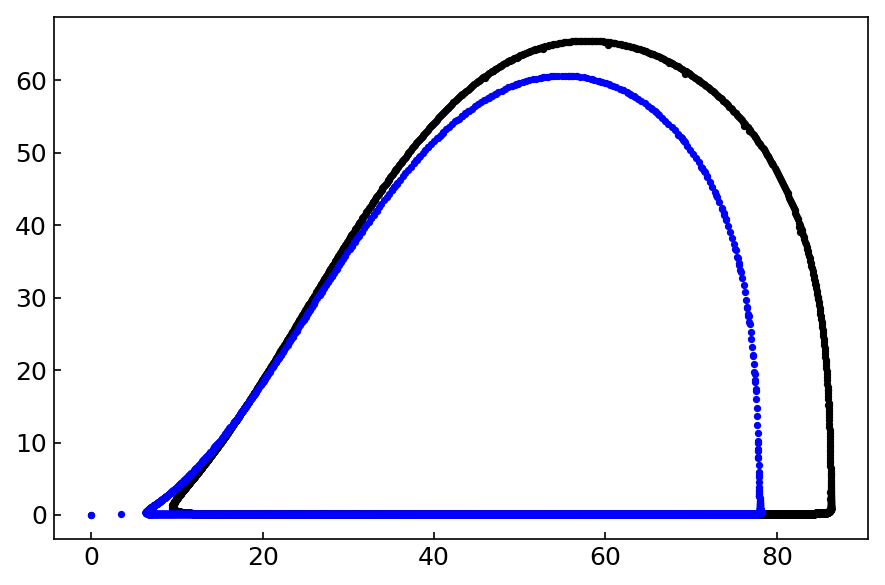

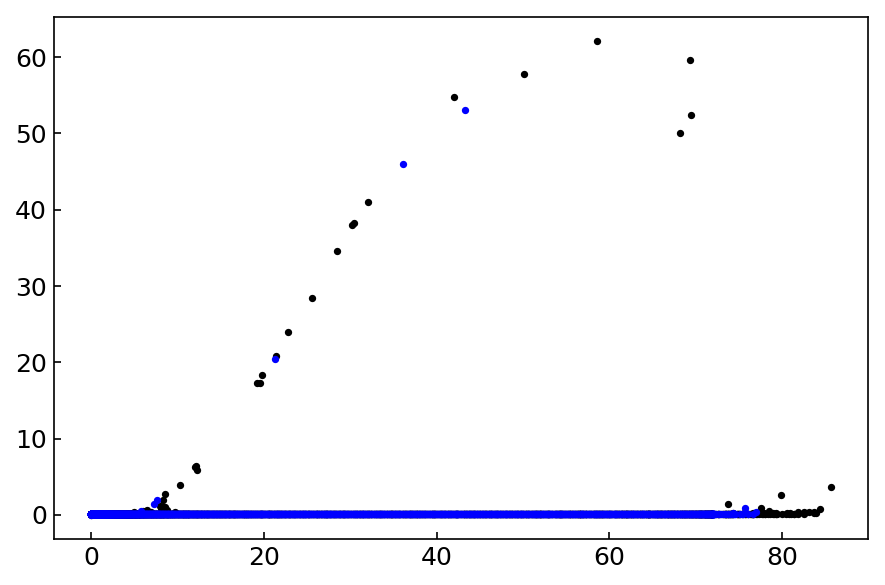

In [33]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(data10[2],data10[3],'bo',alpha=1,label='10 uM')
plt.plot(data_storage_Gprot['1000woCD39'],data_storage_DAG['1000woCD39'],'k',marker='.',markersize=5,lw=0,alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['100woCD39'],data_storage_DAG['100woCD39'],'blue',marker='.',markersize=5,lw=0,alpha=1,label='100 uM - CD39 KO')
#plt.plot(data_storage_Gprot['100wCD39'],data_storage_DAG['100wCD39'],'grey',marker='s',lw=0,alpha=1,label='100 uM - Ctrl')
#plt.plot(data_storage_Gprot['1000wCD39'],data_storage_DAG['1000wCD39'],'ks',alpha=1,label='1 mM - Ctrl')
#plt.xlabel(r"Active $G_{\alpha q}$ (a.u.)",fontsize=12)
#plt.ylabel("$IP_3$ & DAG (a.u.)",fontsize=12)
#plt.legend(loc=0,fontsize=10)
plt.tight_layout()
#plt.savefig('GprotvsDATwithandwithoutCD39.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(data10[2],data10[3],'bo',alpha=1,label='10 uM')
#plt.plot(data_storage_Gprot['100woCD39'],data_storage_DAG['100woCD39'],'skyblue',marker='o',lw=0,alpha=1,label='100 uM - CD39 KO')
#plt.plot(data_storage_Gprot['1000woCD39'],data_storage_DAG['1000woCD39'],'bo',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['1000wCD39'],data_storage_DAG['1000wCD39'],'k',marker='.',markersize=5,lw=0,alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['100wCD39'],data_storage_DAG['100wCD39'],'blue',marker='.',markersize=5,lw=0,alpha=1,label='100 uM - CD39 KO')
#plt.xlabel(r"Active $G_{\alpha q}$ (a.u.)",fontsize=12)
#plt.ylabel("$IP_3$ & DAG (a.u.)",fontsize=12)
#plt.legend(loc=0,fontsize=10)
plt.tight_layout()
#plt.savefig('GprotvsDATwithandwithoutCD39.png')

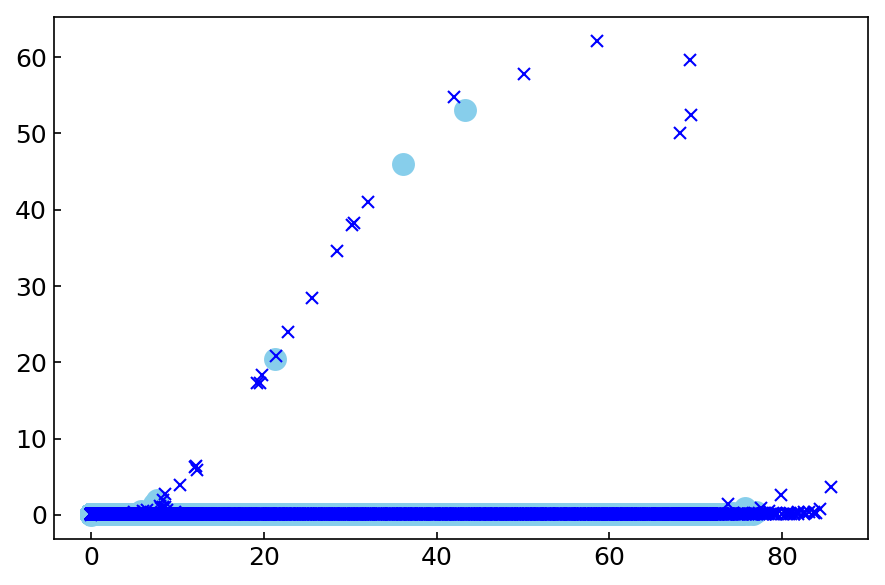

In [14]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(data10[2],data10[3],'bo',alpha=1,label='10 uM')
#plt.plot(data_storage_Gprot['100woCD39'],data_storage_DAG['100woCD39'],'skyblue',marker='o',lw=0,alpha=1,label='100 uM - CD39 KO')
#plt.plot(data_storage_Gprot['1000woCD39'],data_storage_DAG['1000woCD39'],'bo',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['100wCD39'],data_storage_DAG['100wCD39'],'skyblue',marker='o',markersize=10,lw=0,alpha=1,label='100 uM - Ctrl')
plt.plot(data_storage_Gprot['1000wCD39'],data_storage_DAG['1000wCD39'],'bx',alpha=1,label='1 mM - Ctrl')
#plt.xlabel(r"Active $G_{\alpha q}$ (a.u.)",fontsize=12)
#plt.ylabel("$IP_3$ & DAG (a.u.)",fontsize=12)
#plt.legend(loc=0,fontsize=10)
plt.tight_layout()
#plt.savefig('GprotvsDATwithandwithoutCD39.png')

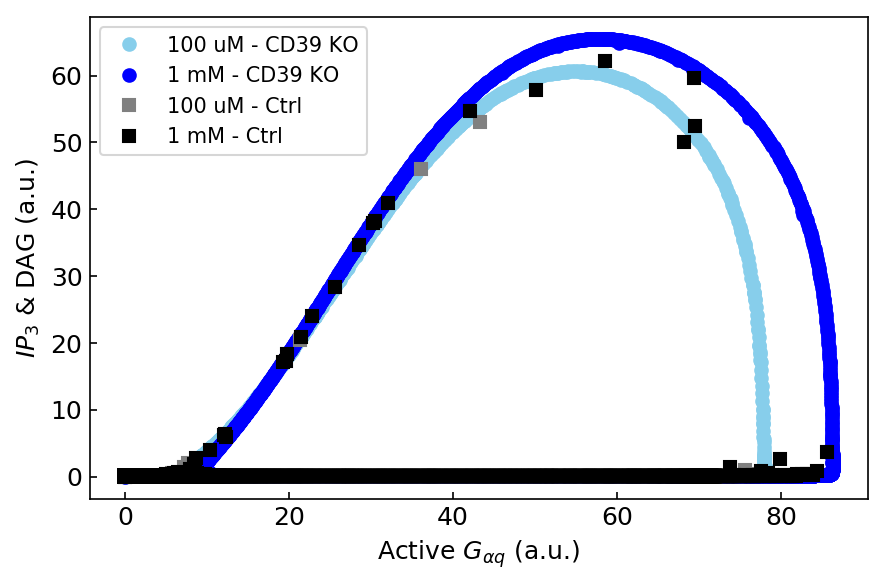

In [17]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(data10[2],data10[3],'bo',alpha=1,label='10 uM')
plt.plot(data_storage_Gprot['100woCD39'],data_storage_DAG['100woCD39'],'skyblue',marker='o',lw=0,alpha=1,label='100 uM - CD39 KO')
plt.plot(data_storage_Gprot['1000woCD39'],data_storage_DAG['1000woCD39'],'bo',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['100wCD39'],data_storage_DAG['100wCD39'],'grey',marker='s',lw=0,alpha=1,label='100 uM - Ctrl')
plt.plot(data_storage_Gprot['1000wCD39'],data_storage_DAG['1000wCD39'],'ks',alpha=1,label='1 mM - Ctrl')
plt.xlabel(r"Active $G_{\alpha q}$ (a.u.)",fontsize=12)
plt.ylabel("$IP_3$ & DAG (a.u.)",fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()
plt.savefig('GprotvsDATwithandwithoutCD39.png')

#### Ca transients

In [4]:
noP2X7 = np.array([100.00,104.00,168.80,128.53,121.60,118.93,123.20,116.27,108.80,109.87,107.73,110.67,
                   105.33,109.07,102.93,101.33,105.60,104.00,106.13,104.00,113.87,105.33,104.53,103.20,
                   109.33,106.67,103.20,102.67,104.27,102.40]) 
time1 =  np.array([0.00,0.42,0.61,0.98,1.10,1.33,1.44,1.86,2.05,2.08,2.35,2.54,2.73,2.92,3.33,3.64,3.79,3.98,4.09,4.17,
                   4.58,4.89,5.15,5.42,5.68,5.95,6.14,6.52,6.63,6.86])

lowATP = np.array([100.00,100.53,136.80,178.93,174.93,130.13,107.47,100.53,100.27,100.80,100.27,
                   101.60,101.87,100.53,100.80,100.80,101.33,100.53,102.93])
time2  = np.array([0.00,0.38,0.49,1.02,1.21,1.67,2.16,2.77,3.11,4.24,4.32,4.66,4.89,5.08,5.30,5.49,5.91,6.10,6.40])

All    = np.array([100.00,100.00,175.73,166.13,156.27,161.60,153.60,162.93,155.47,164.53,162.40,163.47,154.40,160.27,
                   151.73,161.60,136.27,157.33,137.07,131.73,134.13,134.13,157.87,131.73,146.93,128.80,129.60,129.07,
                   131.47,151.73,125.87,133.33,125.87,149.60,126.40])
time3  = np.array([0.00,0.42,0.61,0.72,1.06,1.17,1.33,1.48,1.93,2.01,
                   2.16,2.20,2.42,2.50,2.69,2.80,3.18,3.41,3.60,3.83,
                   3.94,4.09,4.28,4.70,5.27,5.80,5.91,6.10,6.29,6.52,
                   7.08,7.50,7.92,8.26,8.79])

In [3]:
duration = 600
ATP = 1000
        
data1  = SR.gotranMicroglia(sim_time      = duration,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2x4       = 1,
                            rhop2x7       = 0,
                            rhop2yc       = 0,
                            data_name2    = 'CaER',
                            data_name3    = 'Cap2y',
                            EleSwitch     = 0,
                            DegSwitch     = 1,
                            removePickle  = 1)
    
data2  = SR.gotranMicroglia(sim_time      = 600,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2x4       = 0,
                            rhop2x7       = 1,
                            rhop2yc       = 0,
                            data_name2    = 'CaER',
                            data_name3    = 'Cap2y',
                            EleSwitch     = 0,
                            DegSwitch     = 1,
                            removePickle  = 1)
    
data3  = SR.gotranMicroglia(sim_time      = 600,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2x4       = 0,
                            rhop2x7       = 0,
                            rhop2yc       = 1,
                            data_name2    = 'CaER',
                            data_name3    = 'Cap2y',
                            EleSwitch     = 0,
                            DegSwitch     = 1,
                            removePickle  = 1)

 -------------- 4.776561260223389 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.8093955516815186 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.013288497924805 seconds --------------
 ------------ End of Simulation -----------


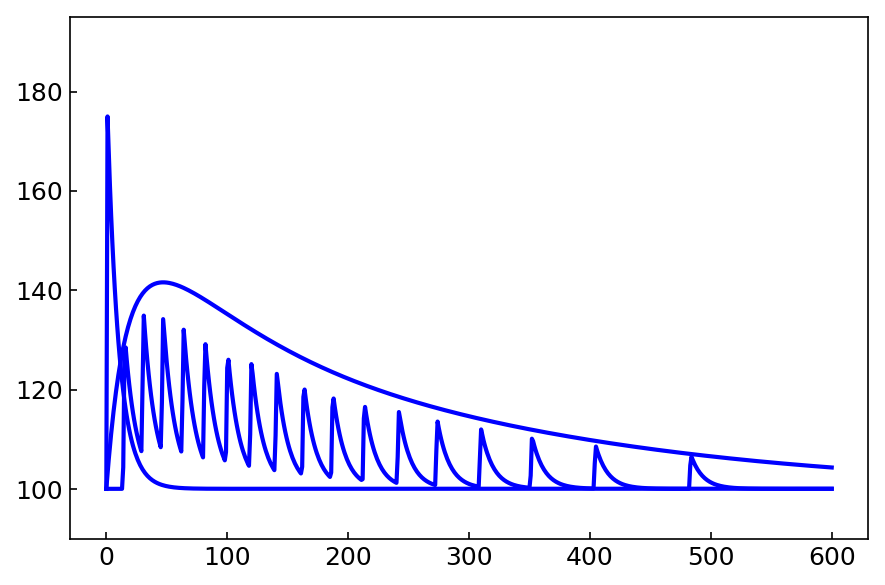

In [15]:

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data1[0],data1[1],'b-',lw=2,label='Sim. Data')
plt.plot(data1[0],data2[1],'b-',lw=2,label='Sim. Data')
plt.plot(data1[0],data3[1],'b-',lw=2,label='Sim. Data')
plt.ylim([90,195])
plt.tight_layout()

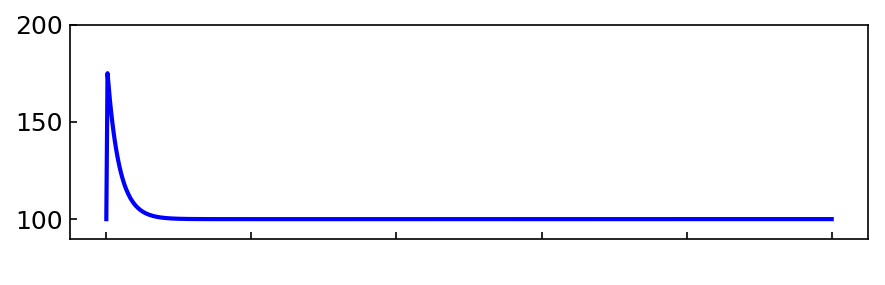

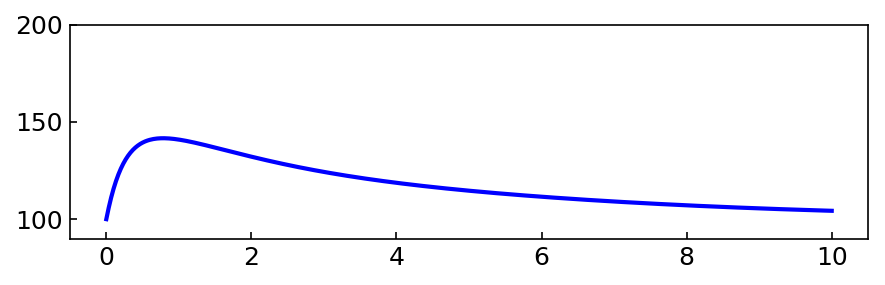

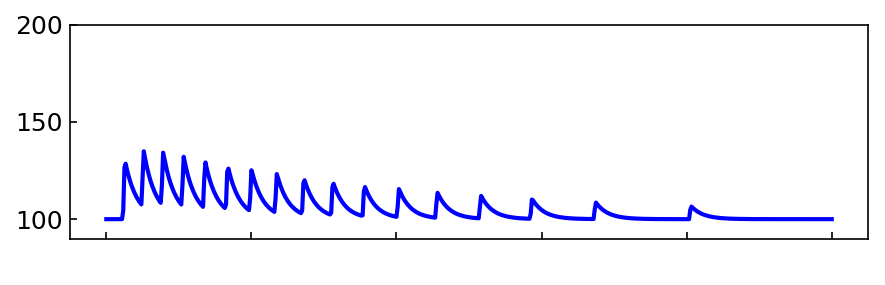

In [4]:
plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data1[0]/60,data1[1],'b-',lw=2,label='Sim. Data')
plt.ylim([90,200])
plt.xticks([0,2,4,6,8,10]," ")
plt.tight_layout()

plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data1[0]/60,data2[1],'b-',lw=2,label='Sim. Data')
plt.ylim([90,200])

plt.tight_layout()


plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data1[0]/60,data3[1],'b-',lw=2,label='Sim. Data')
plt.ylim([90,200])
plt.xticks([0,2,4,6,8,10]," ")
plt.tight_layout()



In [5]:
duration = 600
CellType = ['WT','P7KO','LowATP']
data_wCD39 = {}
data_woCD39 = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT':
        ATP = 1000
        p2x7 = 1
        p2y = 1
    elif CellType[i] == 'P7KO':
        ATP = 1000
        p2x7 = 0
        p2y =1
    elif CellType[i] == 'LowATP':
        ATP = 1000
        p2x7 = 1
        p2y = 0
        
    data1  = SR.gotranMicroglia(sim_time      = duration,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = p2y,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 1,
                                removePickle  = 1)
    
    data2  = SR.gotranMicroglia(sim_time      = 600,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 0,
                                removePickle  = 1)
    
    data_wCD39[CellType[i]] = data1[1]
    data_woCD39[CellType[i]] = data2[1]
    dura = data1[0]
    
CaAll = data_wCD39['WT']
CaNoP7 = data_wCD39['P7KO']
CaAllno = data_woCD39['WT']
CaNoP7no = data_woCD39['P7KO']
CalowATP = data_wCD39['LowATP']
CalowATPno = data_woCD39['LowATP']

 -------------- 5.860883951187134 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.239941596984863 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.332082748413086 seconds --------------
 ------------ End of Simulation -----------
 -------------- 8.006576776504517 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.892346143722534 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.535361289978027 seconds --------------
 ------------ End of Simulation -----------


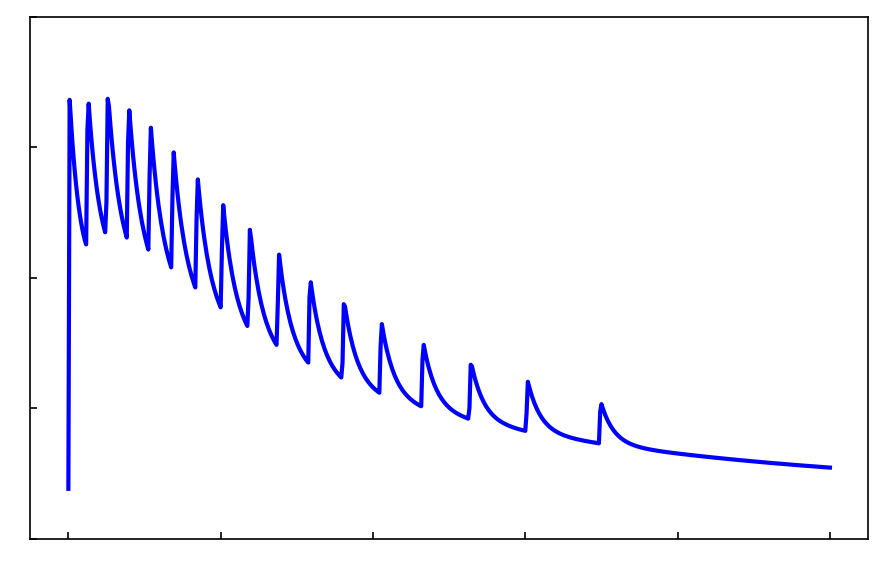

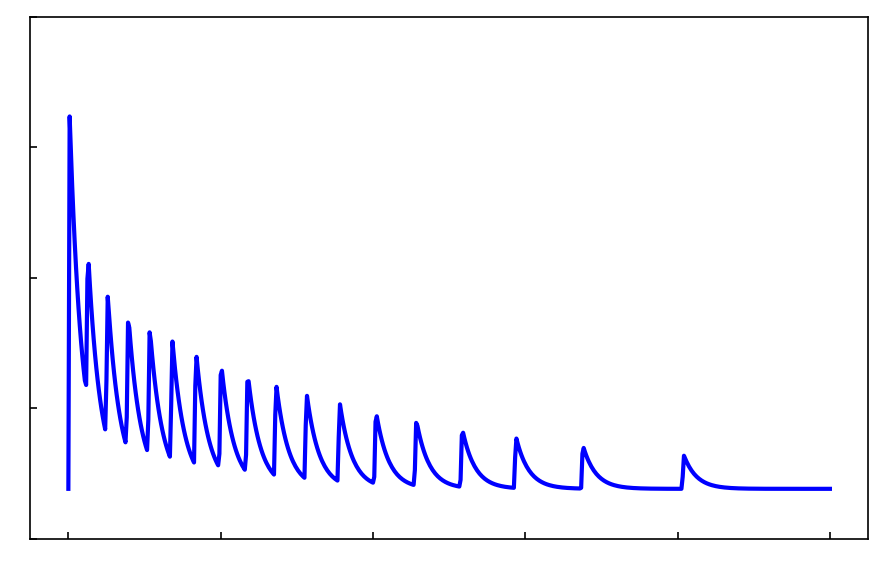

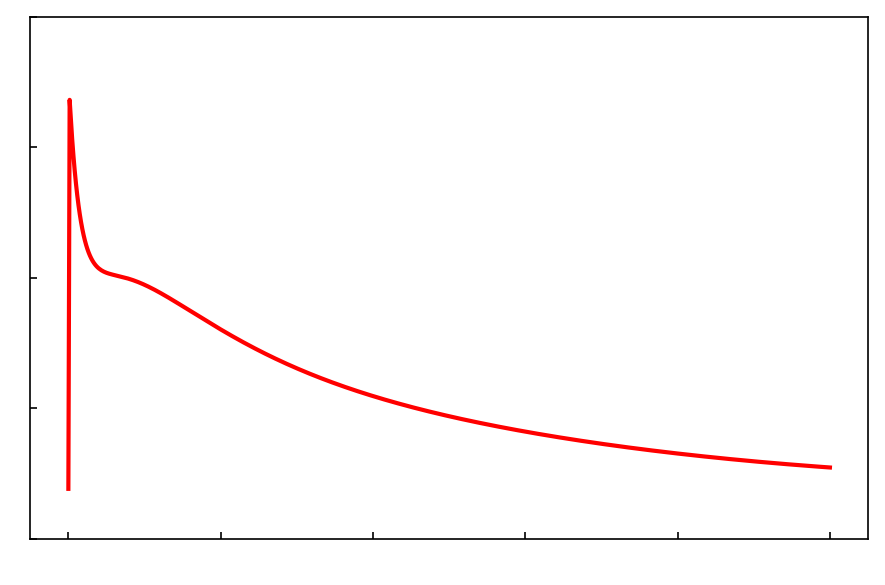

In [6]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
plt.ylim([90,195])
plt.yticks(np.linspace(90,195,5)," ")
plt.xticks([0,2,4,6,8,10]," ")
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
plt.ylim([90,195])
plt.yticks(np.linspace(90,195,5)," ")
plt.xticks([0,2,4,6,8,10]," ")
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CalowATP,'r-',lw=2,label='Sim. Data')
plt.ylim([90,195])
plt.yticks(np.linspace(90,195,5)," ")
plt.xticks([0,2,4,6,8,10]," ")
plt.tight_layout()


In [37]:
duration = 600
CellType = ['WT','P7KO','LowATP']
data_wCD39 = {}
data_woCD39 = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT':
        ATP = 1000
        p2x7 = 1 
    elif CellType[i] == 'P7KO':
        ATP = 1000
        p2x7 = 0
    elif CellType[i] == 'LowATP':
        ATP = 100
        p2x7 = 1
        
    data1  = SR.gotranMicroglia(sim_time      = duration,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 1,
                                removePickle  = 1)
    
    data2  = SR.gotranMicroglia(sim_time      = 600,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 0,
                                removePickle  = 1)
    
    data_wCD39[CellType[i]] = data1[1]
    data_woCD39[CellType[i]] = data2[1]
    dura = data1[0]
    
CaAll = data_wCD39['WT']
CaNoP7 = data_wCD39['P7KO']
CaAllno = data_woCD39['WT']
CaNoP7no = data_woCD39['P7KO']
CalowATP = data_wCD39['LowATP']
CalowATPno = data_woCD39['LowATP']

 -------------- 5.968573093414307 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.838311672210693 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.754055500030518 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.686873912811279 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.790019750595093 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.153512716293335 seconds --------------
 ------------ End of Simulation -----------


In [1]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
#plt.plot(dura/60,CaAllno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
#plt.plot(dura/60,CaNoP7no,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'b-',lw=2,label='Sim. Data')
#plt.plot(dura/60,CalowATPno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('WT100uMCaTrans.png')

#--------------------------------------------------------------------------
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('WT, [ATP] = 1 mM',fontsize=12)
#plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'b-',lw=2,alpha=1,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
#plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'b-',lw=2,alpha=1,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
#plt.plot(dura/60,CalowATP,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'b-',lw=2,alpha=1,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=2,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
#plt.savefig('WT100uMCaTrans.png')

NameError: name 'plt' is not defined

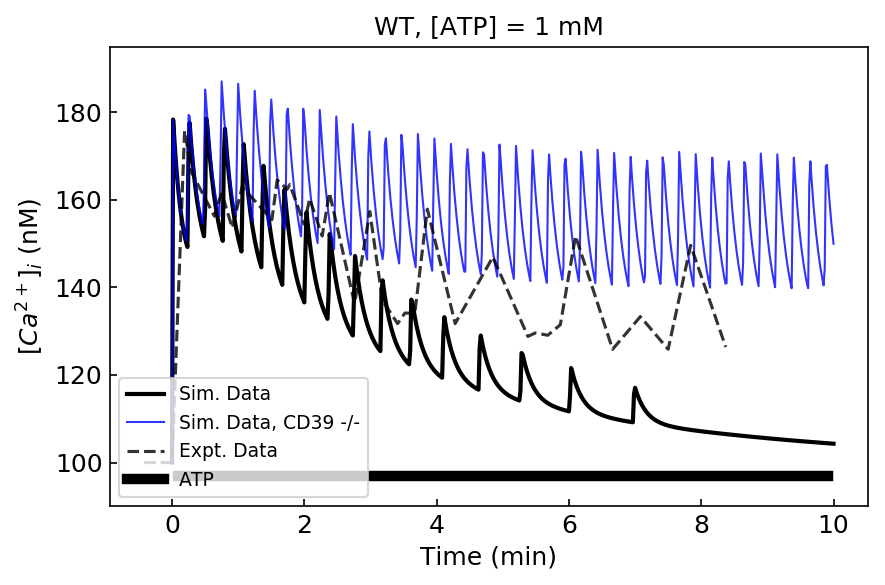

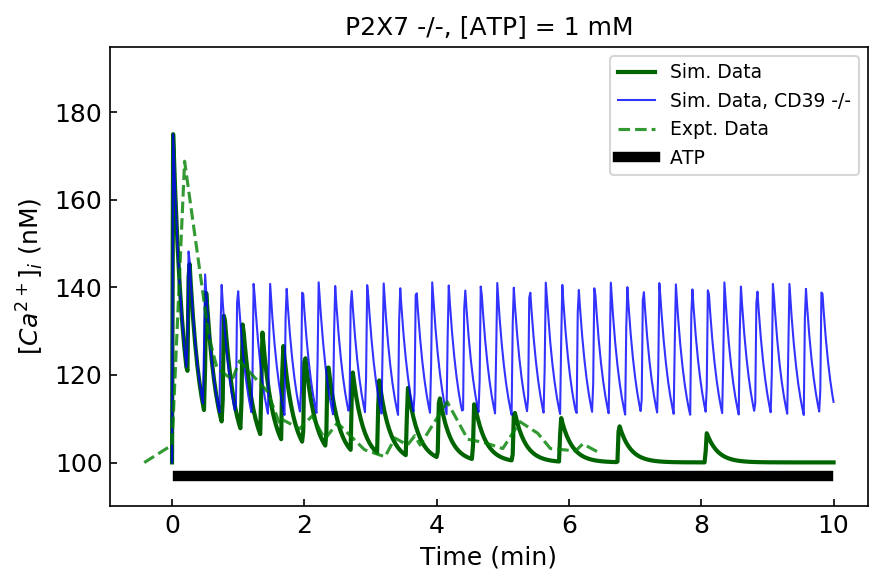

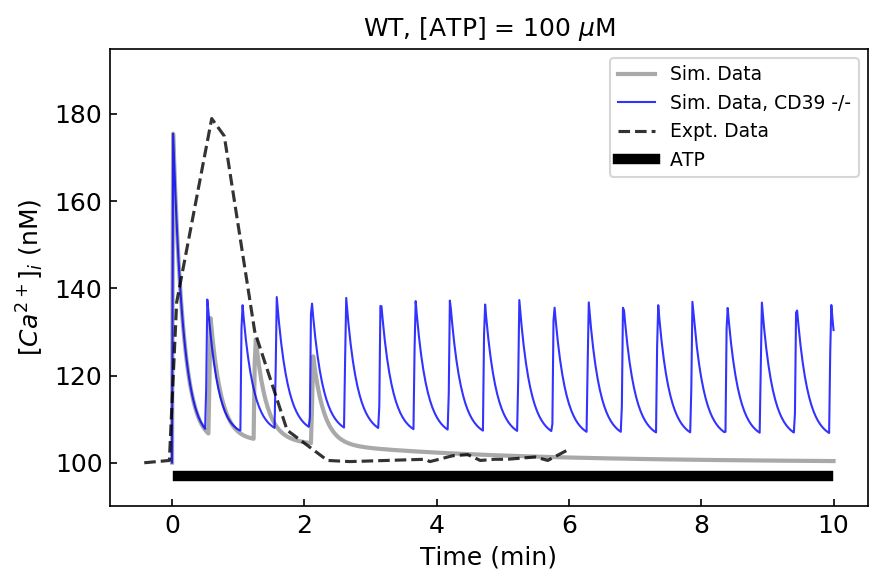

In [27]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT100uMCaTrans.png')

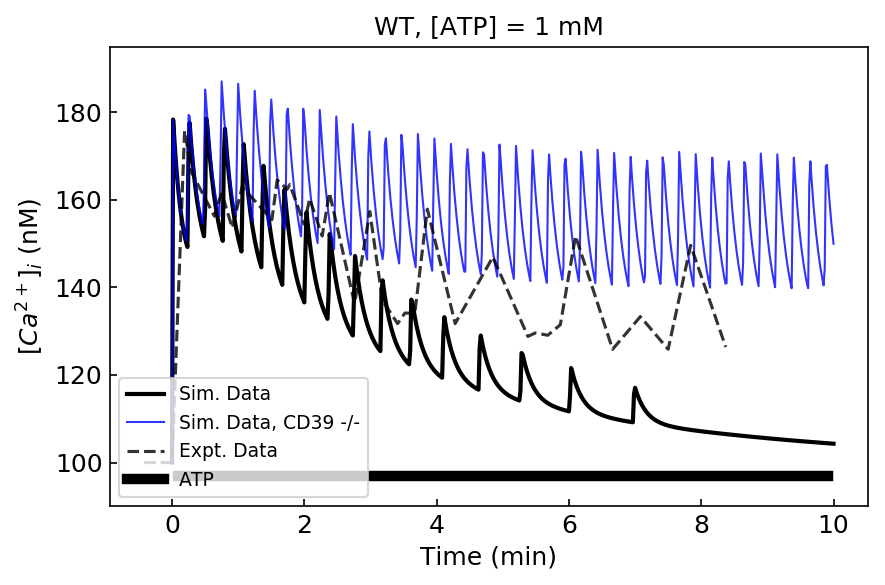

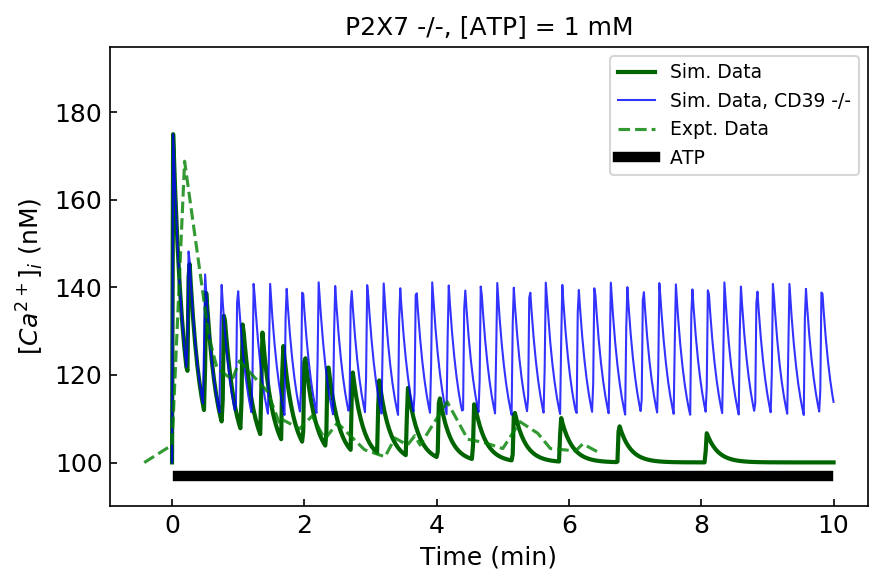

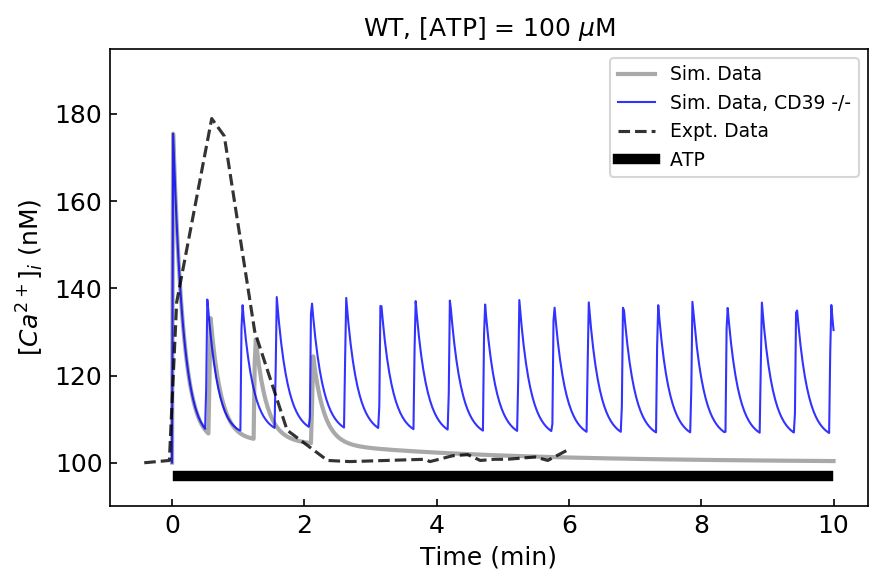

In [27]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT100uMCaTrans.png')

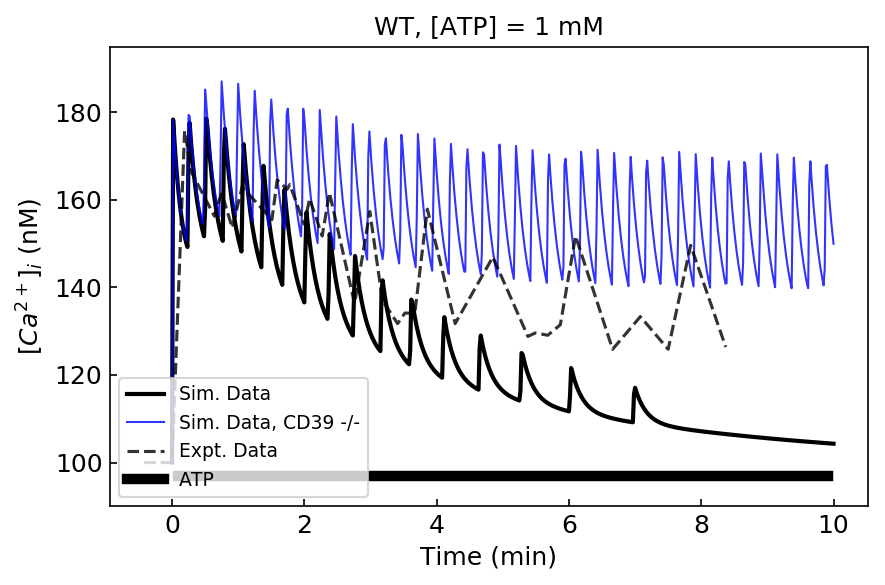

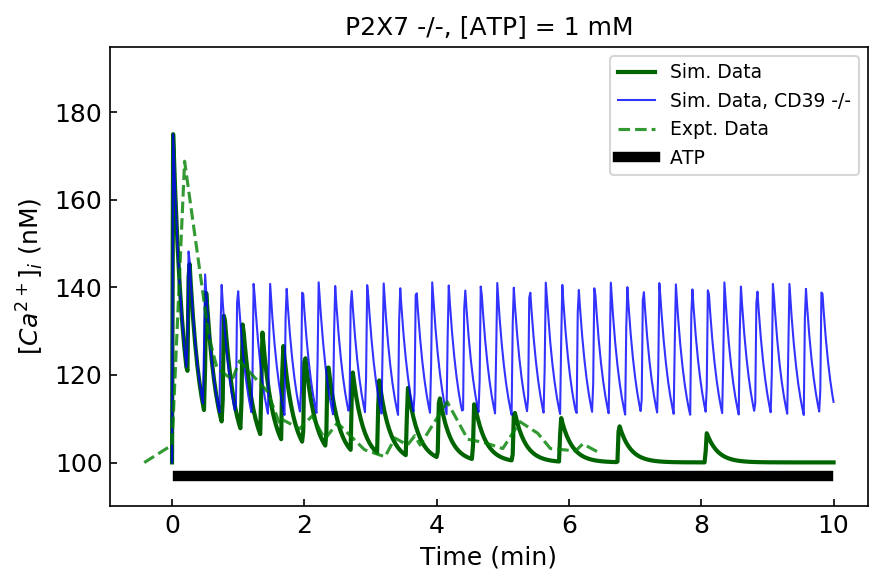

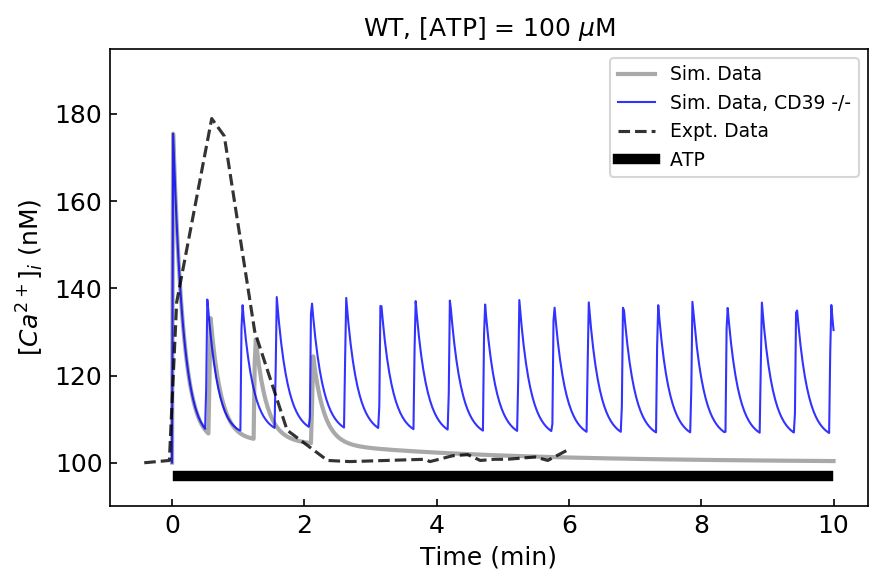

In [27]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'b-',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'b-',lw=1,alpha=0.5,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=1.5,alpha=0.5,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT100uMCaTrans.png')

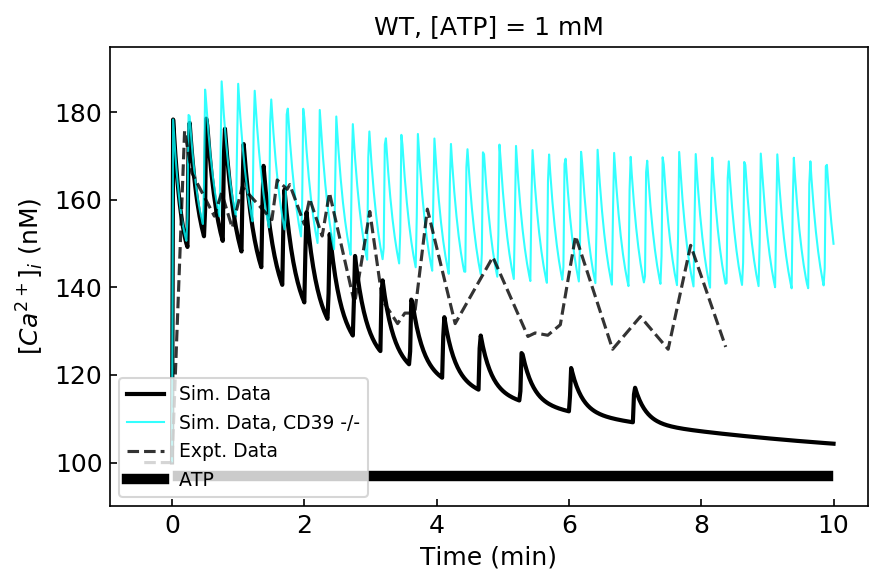

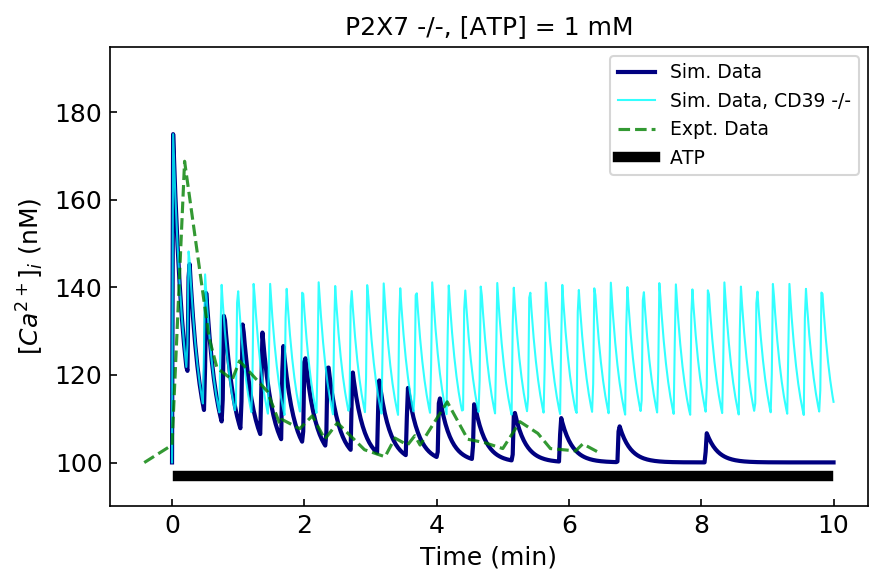

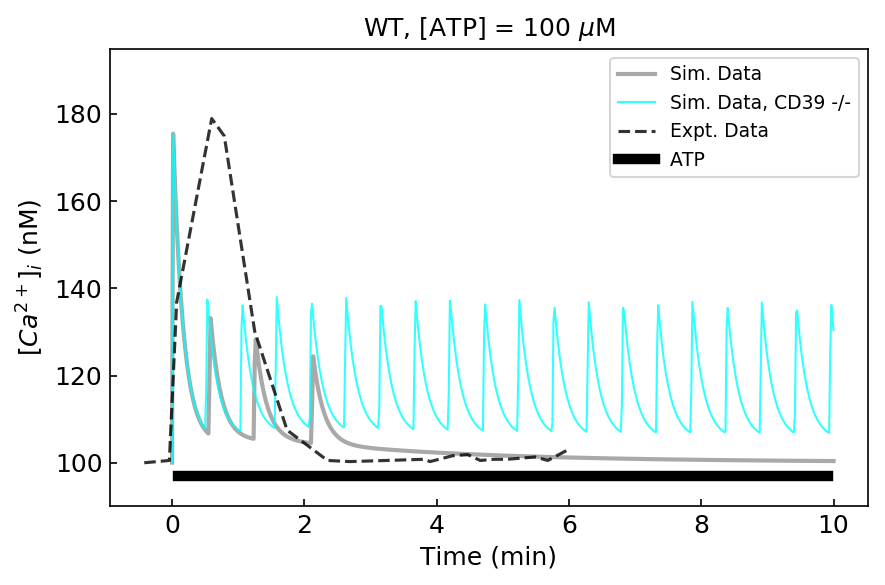

In [38]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'k',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'navy',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'g--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('P7KO1mMCaTrans.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'darkgray',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()
plt.savefig('WT100uMCaTrans.png')

In [29]:
data = {'P2X7 KO': [100.00,104.00,168.80,128.53,121.60,118.93,123.20,116.27,108.80,109.87,107.73,110.67,105.33,109.07,102.93,101.33,105.60,104.00,106.13,104.00,113.87,105.33,104.53,103.20,109.33,106.67,103.20,102.67,104.27,102.40],
        'time1': [0.00,0.42,0.61,0.98,1.10,1.33,1.44,1.86,2.05,2.08,2.35,2.54,2.73,2.92,3.33,3.64,3.79,3.98,4.09,4.17,4.58,4.89,5.15,5.42,5.68,5.95,6.14,6.52,6.63,6.86],
        'Low ATP': [100.00,100.53,136.80,178.93,174.93,130.13,107.47,100.53,100.27,100.80,100.27,101.60,101.87,100.53,100.80,100.80,101.33,100.53,102.93],
        'time2': [0.00,0.38,0.49,1.02,1.21,1.67,2.16,2.77,3.11,4.24,4.32,4.66,4.89,5.08,5.30,5.49,5.91,6.10,6.40],
        'WT': [100.00,100.00,175.73,166.13,156.27,161.60,153.60,162.93,155.47,164.53,162.40,163.47,154.40,160.27,
                   151.73,161.60,136.27,157.33,137.07,131.73,134.13,134.13,157.87,131.73,146.93,128.80,129.60,129.07,
                   131.47,151.73,125.87,133.33,125.87,149.60,126.40],
        'time3':[0.00,0.42,0.61,0.72,1.06,1.17,1.33,1.48,1.93,2.01,
                   2.16,2.20,2.42,2.50,2.69,2.80,3.18,3.41,3.60,3.83,
                   3.94,4.09,4.28,4.70,5.27,5.80,5.91,6.10,6.29,6.52,
                   7.08,7.50,7.92,8.26,8.79]
        }

df = pd.DataFrame(data, columns = ['P2X7 KO', 'time1'])

df = pd.DataFrame(data, columns = ['Low ATP','time2'])

df = pd.DataFrame(data, columns = ['WT','time3'])


In [30]:
tailp2x7exp = (104+113.87+105.33+104.53)/4
taillowexp = (100.27+101.60+101.87+100.53+100.80)/5
tailallexp = (157.87+131.73+146.93+128.80)/4

In [31]:
tailp2x7comp = np.average(CaNoP7[230:330])
tailp2x7nocomp = np.average(CaNoP7no[230:330])
taillowcomp = np.average(CalowATP[230:330])
taillownocomp = np.average(CalowATPno[230:330])
tailallcomp = np.average(CaAll[230:330])
tailallnocomp = np.average(CaAllno[230:330])

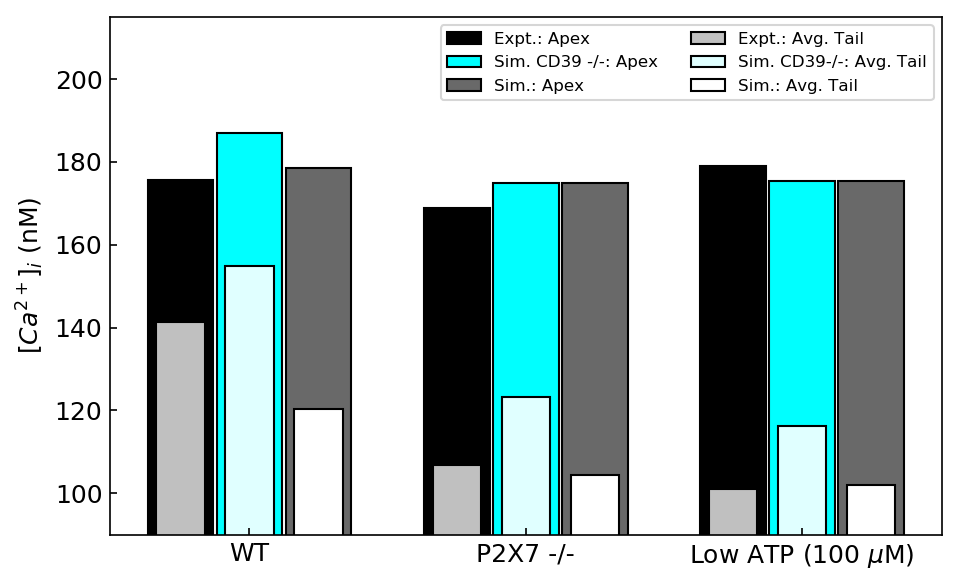

In [36]:
maxexpWT = max(All)
maxexpnop2x7 = max(noP2X7)
maxexplow = max(lowATP)

maxcomWT = max(CaAll)
maxcomnop2x7 = max(CaNoP7)
maxcomlow = max(CalowATP)

maxcomWTnoCD = max(CaAllno)
maxcomNoP7CD = max(CaNoP7no)
maxcomplowCD = max(CalowATPno)

bar_width = 0.25
space = bar_width/2

objects = ('WT','P2X7 -/-','Low ATP (100 $\mu$M)')
y_pos = np.arange(len(objects))

exphigh = [maxexpWT, maxexpnop2x7, maxexplow]
compwCDhigh = [maxcomWT, maxcomnop2x7, maxcomlow]
compNoCDhigh = [maxcomWTnoCD, maxcomNoP7CD, maxcomplowCD]

exptail = [tailallexp, tailp2x7exp, taillowexp]
compwCDtail = [tailallcomp, tailp2x7comp, taillowcomp]
compNoCDtail = [tailallnocomp, tailp2x7nocomp, taillownocomp]

plt.figure(figsize=(18,4),dpi=150)
ax = plt.subplot(1,3,1)
plt.bar(y_pos-space*2, exphigh, bar_width*0.95, align='center', color='black', alpha=1, edgecolor='black', label='Expt.: Apex')
plt.bar(y_pos-space*0, compNoCDhigh, bar_width*0.95, align='center', color='cyan', alpha=1, edgecolor='black', label='Sim. CD39 -/-: Apex')
plt.bar(y_pos-space*(-2), compwCDhigh, bar_width*0.95, align='center', color='dimgray', alpha=1, edgecolor='black', label='Sim.: Apex')

plt.bar(y_pos-space*2, exptail, bar_width*0.7, align='center', color='silver', alpha=1, edgecolor='black', label='Expt.: Avg. Tail')
plt.bar(y_pos-space*0, compNoCDtail, bar_width*0.7, align='center', color='lightcyan', alpha=1, edgecolor='black', label='Sim. CD39-/-: Avg. Tail')
plt.bar(y_pos-space*(-2), compwCDtail, bar_width*0.7, align='center', color='white', alpha=1, edgecolor='black', label='Sim.: Avg. Tail')
plt.ylim([90,215])

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.xlabel('',fontsize=12)
plt.legend(loc=0,fontsize=8,ncol=2)
plt.tight_layout()
plt.savefig('CaTransPeakandTail.png')

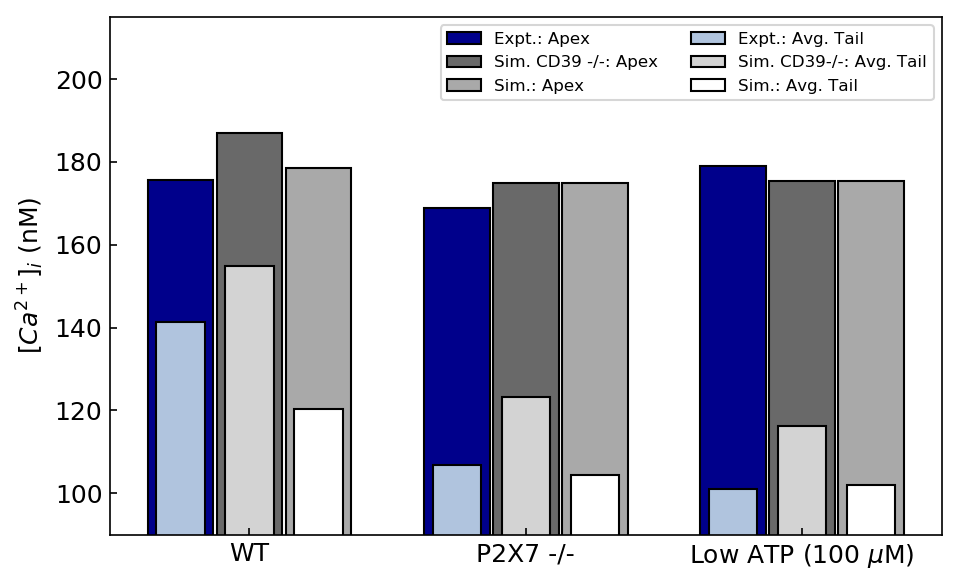

In [27]:
maxexpWT = max(All)
maxexpnop2x7 = max(noP2X7)
maxexplow = max(lowATP)

maxcomWT = max(CaAll)
maxcomnop2x7 = max(CaNoP7)
maxcomlow = max(CalowATP)

maxcomWTnoCD = max(CaAllno)
maxcomNoP7CD = max(CaNoP7no)
maxcomplowCD = max(CalowATPno)

bar_width = 0.25
space = bar_width/2

objects = ('WT','P2X7 -/-','Low ATP (100 $\mu$M)')
y_pos = np.arange(len(objects))

exphigh = [maxexpWT, maxexpnop2x7, maxexplow]
compwCDhigh = [maxcomWT, maxcomnop2x7, maxcomlow]
compNoCDhigh = [maxcomWTnoCD, maxcomNoP7CD, maxcomplowCD]

exptail = [tailallexp, tailp2x7exp, taillowexp]
compwCDtail = [tailallcomp, tailp2x7comp, taillowcomp]
compNoCDtail = [tailallnocomp, tailp2x7nocomp, taillownocomp]

plt.figure(figsize=(18,4),dpi=150)
ax = plt.subplot(1,3,1)
plt.bar(y_pos-space*2, exphigh, bar_width*0.95, align='center', color='black', alpha=1, edgecolor='black', label='Expt.: Apex')
plt.bar(y_pos-space*0, compNoCDhigh, bar_width*0.95, align='center', color='skyblue', alpha=1, edgecolor='black', label='Sim. CD39 -/-: Apex')
plt.bar(y_pos-space*(-2), compwCDhigh, bar_width*0.95, align='center', color='gray', alpha=1, edgecolor='black', label='Sim.: Apex')

plt.bar(y_pos-space*2, exptail, bar_width*0.7, align='center', color='darkgray', alpha=1, edgecolor='black', label='Expt.: Avg. Tail')
plt.bar(y_pos-space*0, compNoCDtail, bar_width*0.7, align='center', color='lightblue', alpha=1, edgecolor='black', label='Sim. CD39-/-: Avg. Tail')
plt.bar(y_pos-space*(-2), compwCDtail, bar_width*0.7, align='center', color='dimgray', alpha=1, edgecolor='black', label='Sim.: Avg. Tail')
plt.ylim([90,215])

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.xlabel('',fontsize=12)
plt.legend(loc=0,fontsize=8,ncol=2)
plt.tight_layout()
plt.savefig('CaTransPeakandTail.png')

#### Ca transients - ER

In [28]:
duration = 600
CellType = ['WT-low','KO-low','WT','KO']
data_Ca_Cy = {}
data_Ca_ER = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT-low':
        ATP = 100
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO-low':
        ATP = 100
        p2x4 = 0
        p2x7 = 0        
    elif CellType[i] == 'WT':
        ATP = 1000
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO':
        ATP = 1000
        p2x4 = 0
        p2x7 = 0

    data   =  SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = p2x4,
                                 rhop2x7       = p2x7,
                                 rhop2yc       = 1,
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_Ca_Cy[CellType[i]] = data[1]
    data_Ca_ER[CellType[i]] = data[2]
    dura = data[0]
    
Ca2 = data_Ca_Cy['KO-low']
Ca3 = data_Ca_Cy['KO']
Ca4 = data_Ca_Cy['WT-low']
Ca5 = data_Ca_Cy['WT']
caer2 = data_Ca_ER['KO-low']
caer3 = data_Ca_ER['KO']
caer4 = data_Ca_ER['WT-low']
caer5 = data_Ca_ER['WT']
    

 -------------- 4.99679708480835 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.77825927734375 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.766091346740723 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.868300199508667 seconds --------------
 ------------ End of Simulation -----------


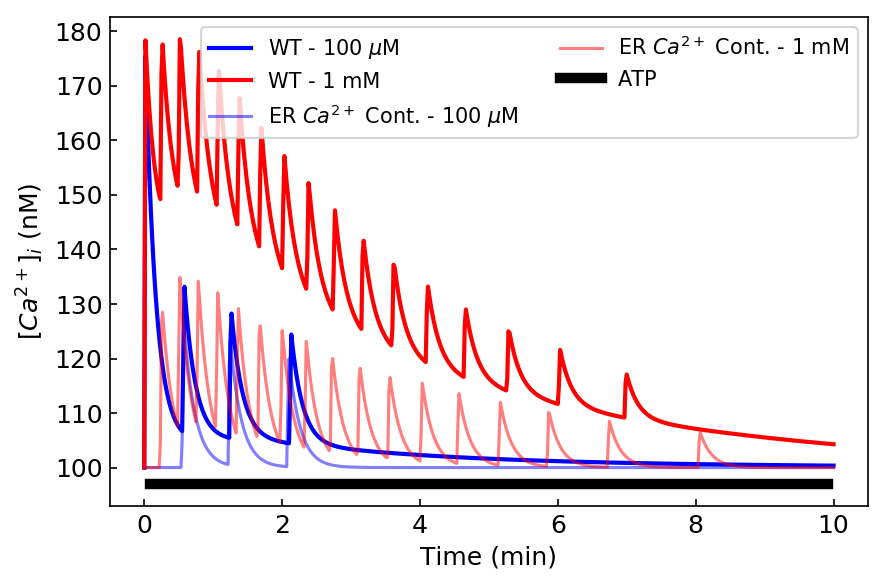

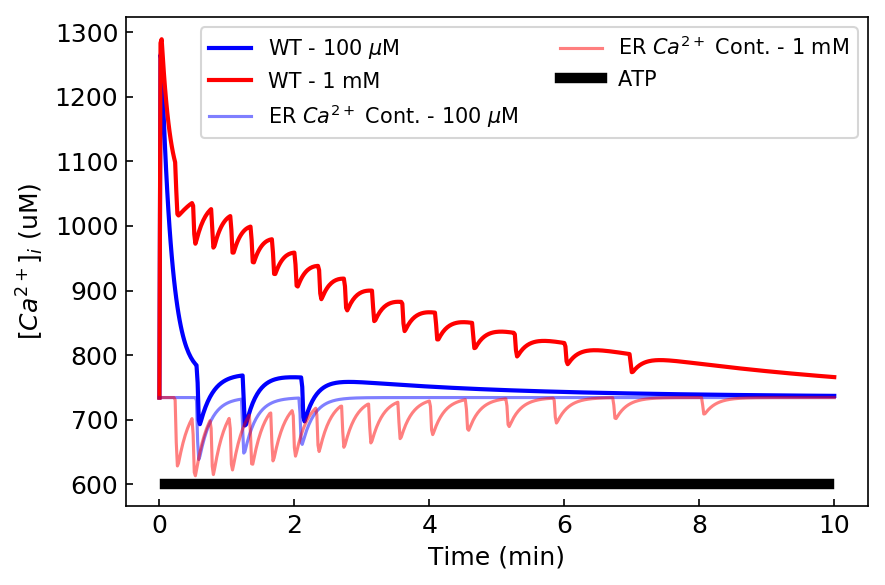

In [30]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,Ca4,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
plt.plot(dura/60,Ca5,'r-',lw=2,alpha=1,label='WT - 1 mM')
plt.plot(dura/60,Ca2,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
plt.plot(dura/60,Ca3,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=2)
plt.tight_layout()
plt.savefig('CaCytocompERrelease1.png')

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,caer4/1000,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
plt.plot(dura/60,caer5/1000,'r-',lw=2,alpha=1,label='WT - 1 mM')
plt.plot(dura/60,caer2/1000,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
plt.plot(dura/60,caer3/1000,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
plt.plot([5/60,595/60],[600,600],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (uM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=2)
plt.tight_layout()
plt.savefig('CaCytocompERrelease1.png')

#### BV2 Model vs. Experiment

In [4]:
duration = 600

exprP2  = {'acute':1/11.1,'prime':1,'bv':1}
exprP4  = {'acute':1/2.95,'prime':1,'bv':0.187}
exprP7  = {'acute':2.65,'prime':1,'bv':0.65}
ATP = [0,50,100,500,1000]
data_prime = {}
data_bv = {}
data_acute = {}

for i in np.arange(len(ATP)):
    data1   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['prime'],
                                 rhop2x7       = exprP7['prime'],
                                 rhop2yc       = exprP2['prime'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data2   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['bv'],
                                 rhop2x7       = exprP7['bv'],
                                 rhop2yc       = exprP2['bv'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data3   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['acute'],
                                 rhop2x7       = exprP7['acute'],
                                 rhop2yc       = exprP2['acute'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_prime[str(ATP[i])] = data1[1]
    data_bv[str(ATP[i])] = data2[1]
    data_acute[str(ATP[i])] = data3[1]
    


dura=data1[0]
data =[data_bv['0'],data_bv['50'],data_bv['100'],data_bv['500'],data_bv['1000']]
datap =[data_prime['0'],data_prime['50'],data_prime['100'],data_prime['500'],data_prime['1000']]
dataac =[data_acute['0'],data_acute['50'],data_acute['100'],data_acute['500'],data_acute['1000']]

 -------------- 10.918882608413696 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.88437294960022 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.679441928863525 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.9791100025177 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.843053340911865 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.845931053161621 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.186095952987671 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.153711795806885 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.908424139022827 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.551839113235474 seconds --------------
 ------------ End of Simulation ----

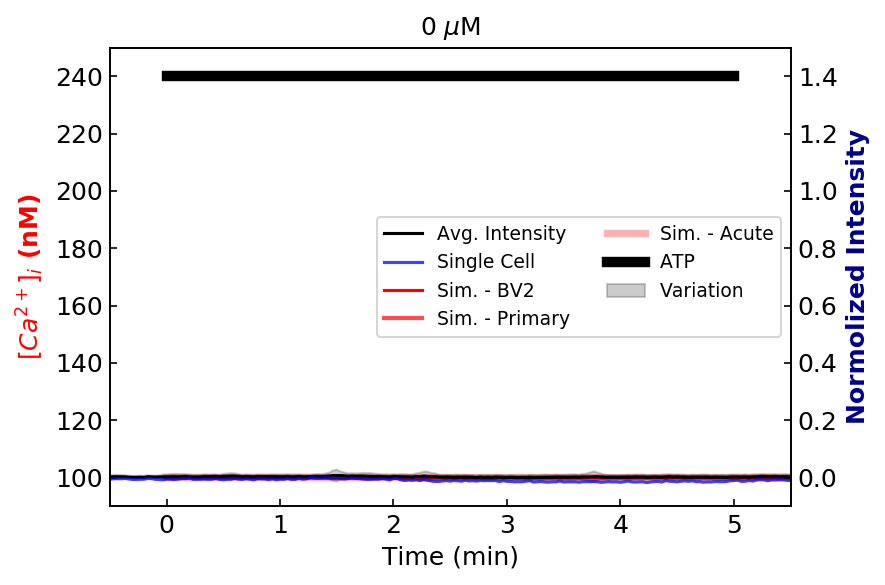

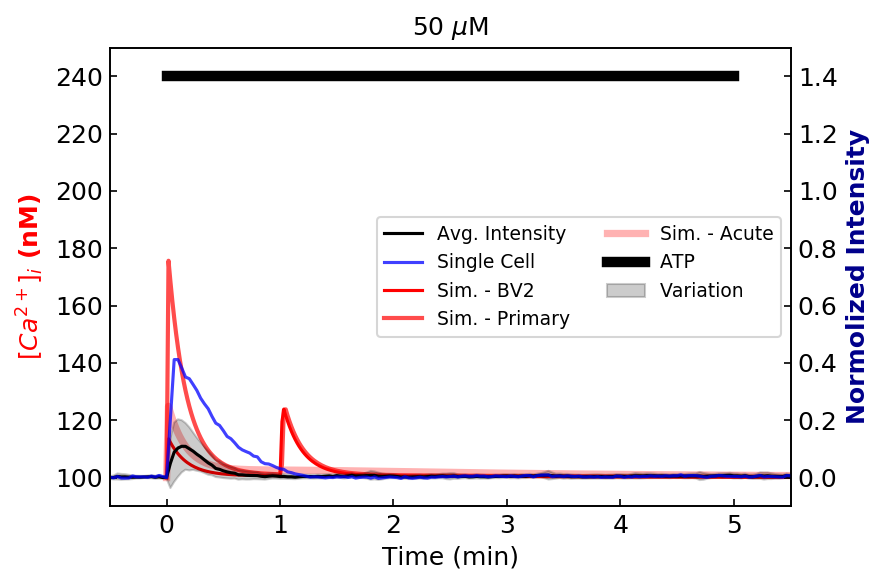

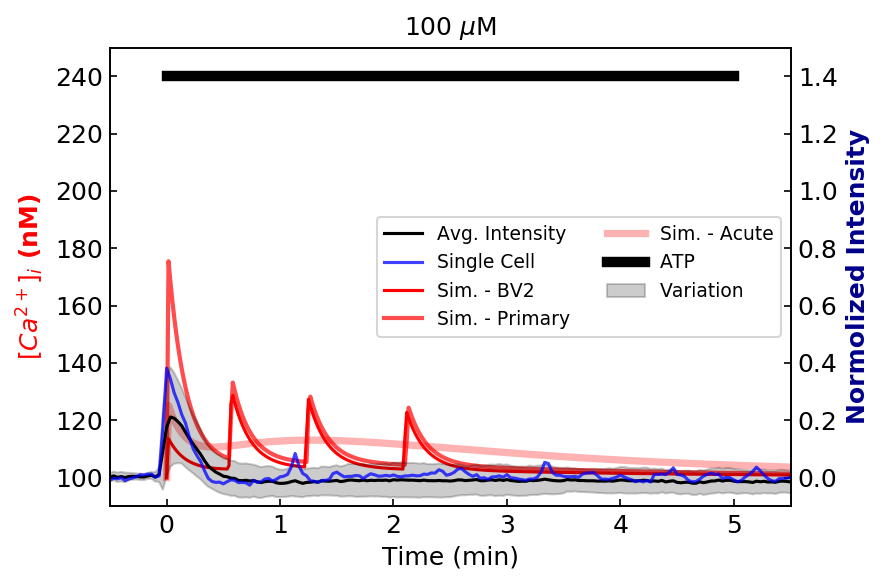

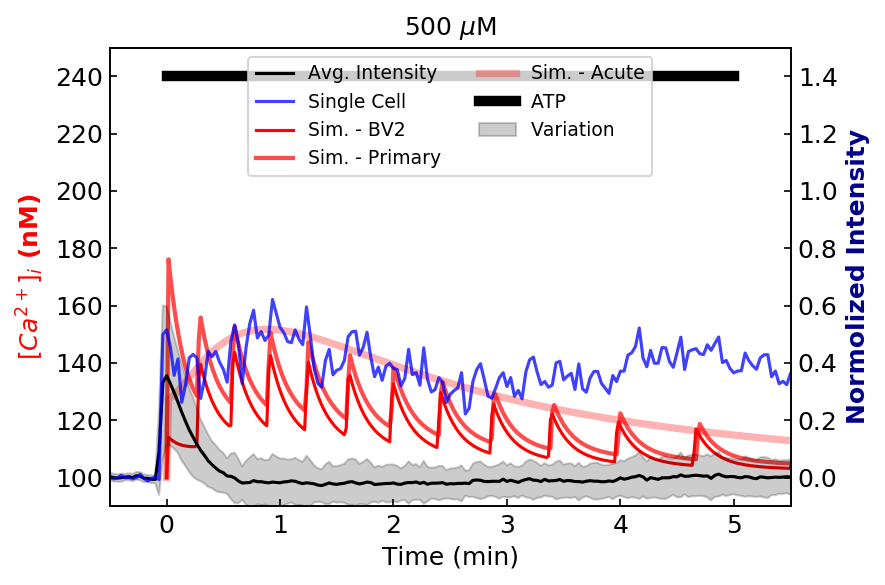

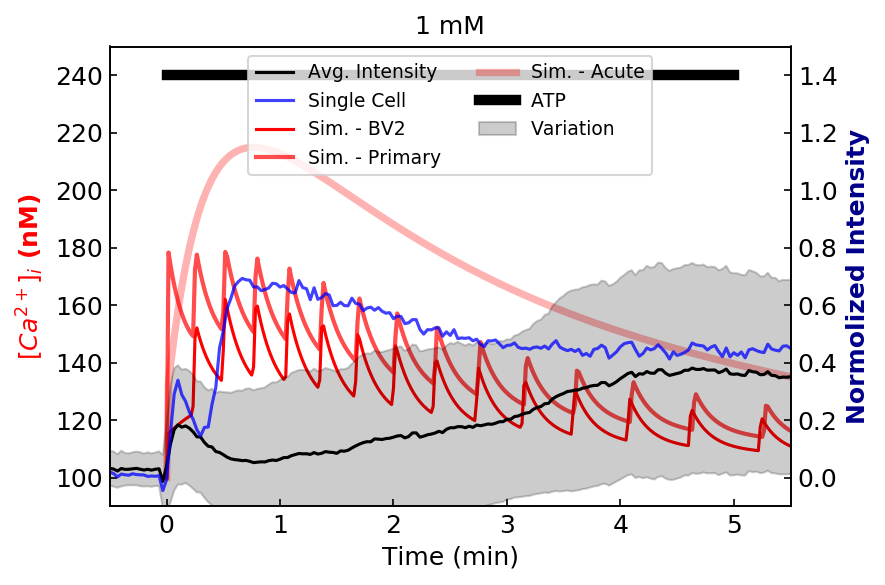

In [5]:
case=["0uM","50uM","100uM","500uM","1mM"]

#read in the traces
with open('../expt/all_traces_BV0629','rb') as f:
    all_traces = pickle.load(f)
with open('../expt/Normolized_traces_BV0629','rb') as f:
    normalize_traces = pickle.load(f)

    
# calculate the average trace of each case and plot the std as shaded area
# first, for each case, stack the traces vertically, please search np.vstack to understand this step
stacked_traces = dict()
for i in case:
    temp = normalize_traces[i][0]
    for j in np.arange(1,len(normalize_traces[i])):
        temp = np.vstack((temp,normalize_traces[i][j]))
    stacked_traces[i] = temp
    
    
# get the mean and std for each case
meanTrace = dict()
std = dict()
for i in case:
    meanTrace[i] = np.mean(stacked_traces[i],axis=0)
    std[i] = np.std(stacked_traces[i],axis=0)
    
data1a = normalize_traces["0uM"][1]
data2a = normalize_traces["50uM"][19]
data3a = normalize_traces["100uM"][22]
data4a = normalize_traces["500uM"][31]
data5a = normalize_traces["1mM"][38]
dataa = [data1a, data2a, data3a, data4a, data5a]  

#plt.figure(figsize=(12,12),dpi=150)
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']
for i,j in enumerate(case):
    color1 = 'red'
    color2 = 'darkblue'
    plt.figure(figsize=(6,4),dpi=150)
    ax1 = plt.subplot()
    #ax1 = plt.subplot(3,2,i+1)
    ax1.tick_params(labelsize=12,direction='in')
    ax1.plot(dura/60,data[i],'r',lw=1.5)
    ax1.plot(dura/60,datap[i],'r',lw=2,alpha=0.7)
    ax1.plot(dura/60,dataac[i],'r',lw=3.5,alpha=0.3)
    ax1.set_ylim([90,250])
    ax1.set_xlim([-0.5,5.5])
    ax1.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12,color=color1,alpha=1,fontweight='bold')
        
    ax2 = ax1.twinx()
    ax2.tick_params(labelsize=12,direction='in')
    x = np.arange(len(meanTrace[j]))
    y = meanTrace[j]/10000
    ax2.plot(x*2/60-10,y,'k-',lw=1.5,label='Avg. Intensity')
    ax2.plot(x*2/60-10,dataa[i]/10000,'b-',lw=1.5,alpha=0.75,label='Single Cell')
    ax2.fill_between(x*2/60-10, y-std[j]/10000, y+std[j]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    ax2.plot([100],[100],'r',lw=1.5,label='Sim. - BV2')
    ax2.plot([100],[100],'r',lw=2,alpha=0.7,label='Sim. - Primary')
    ax2.plot([100],[100],'r',lw=3.5,alpha=0.3,label='Sim. - Acute')
    ax2.set_ylim([-0.1,1.5])
    ax2.set_xlim([-0.5,5.5])
    ax2.plot([0,5],[1.4,1.4],'k-',lw=5,label='ATP')
    ax2.set_ylabel("Normolized Intensity",fontsize=12,color=color2,alpha=1,fontweight='bold')
        
    ax1.set_xlabel('Time (min)',fontsize=12)
    plt.legend(loc='best',fontsize=9,ncol=2)
    plt.title(Case2[i],fontsize=12)
    plt.tight_layout()
    plt.savefig(Case[i]+'modelandexpt.png')

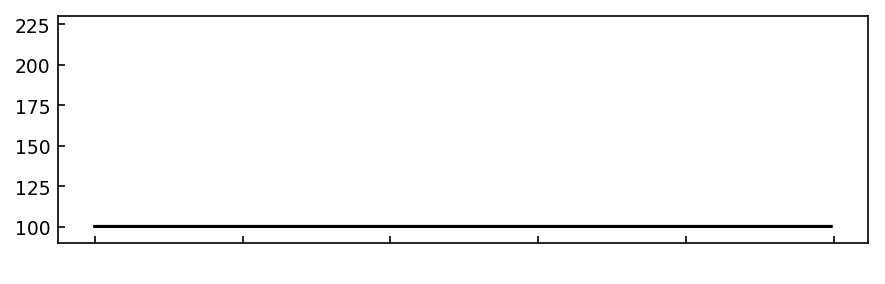

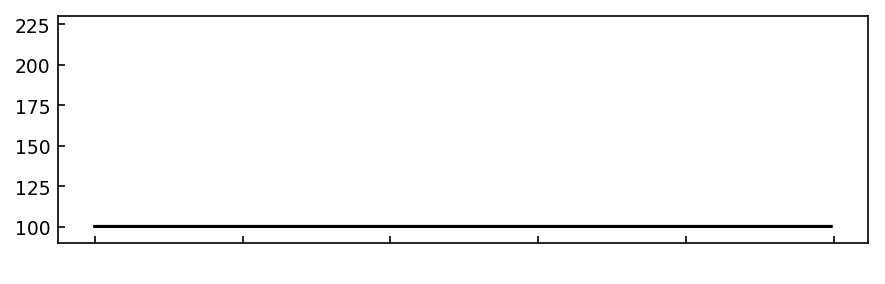

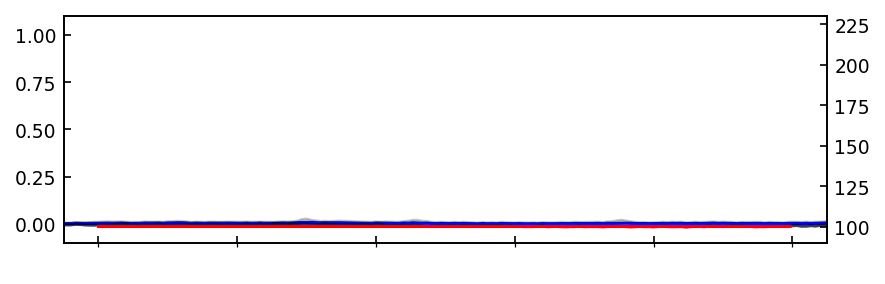

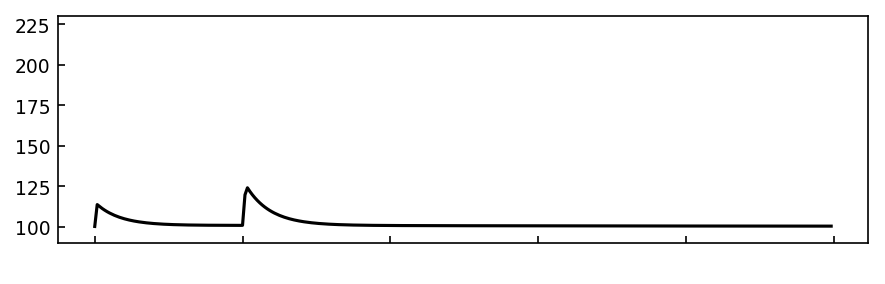

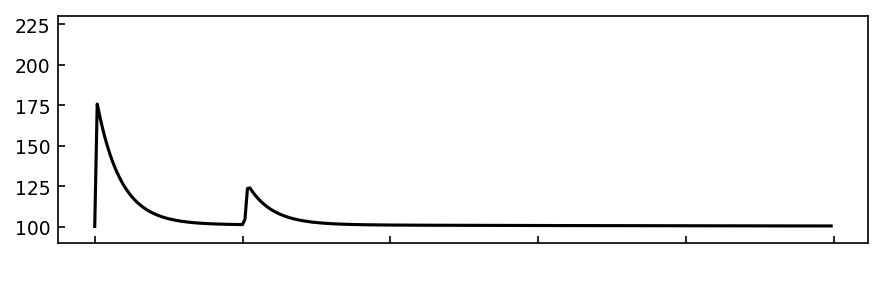

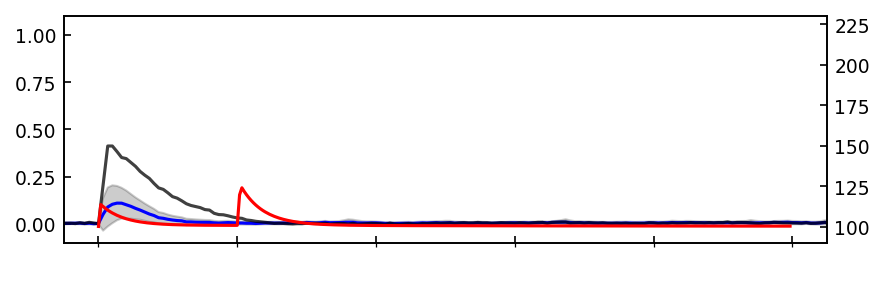

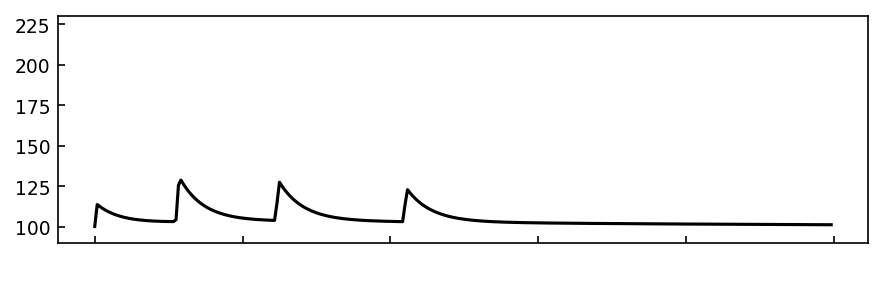

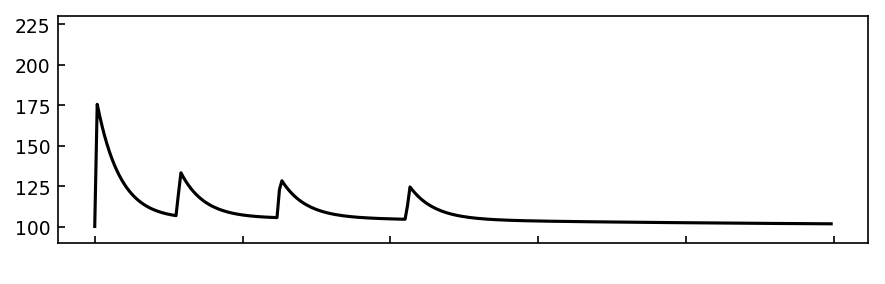

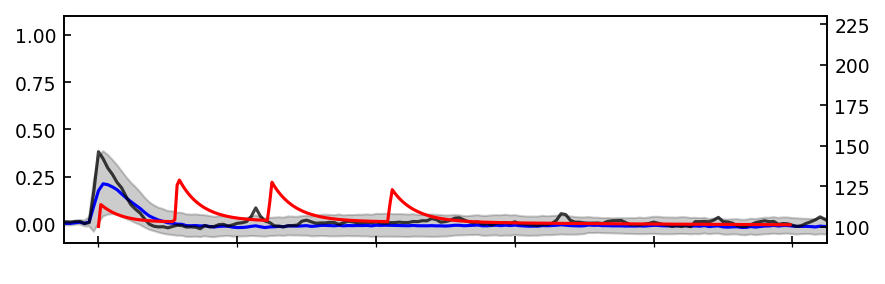

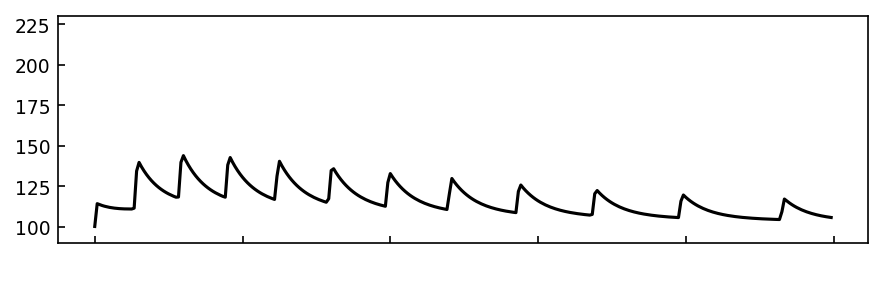

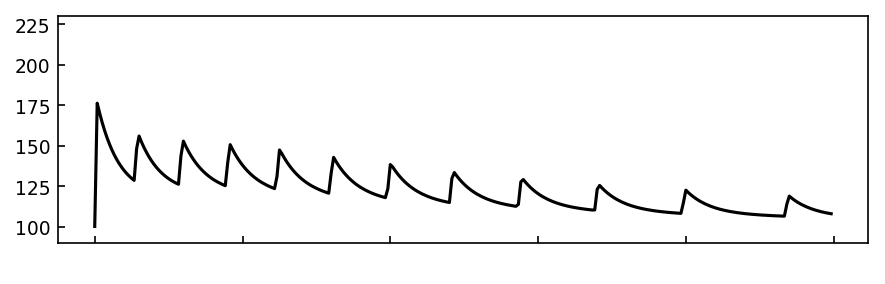

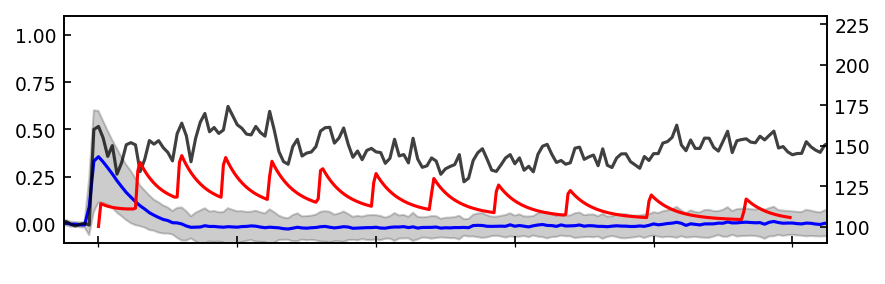

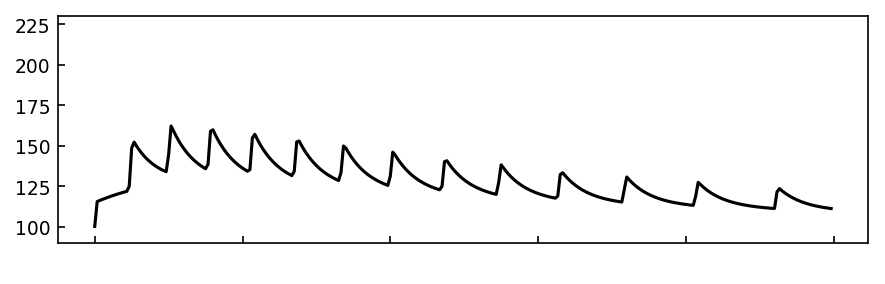

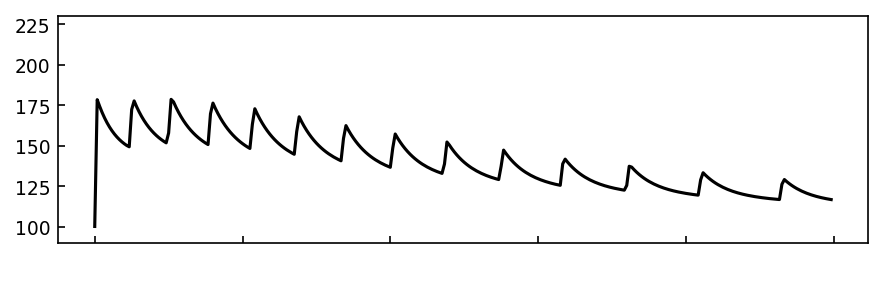

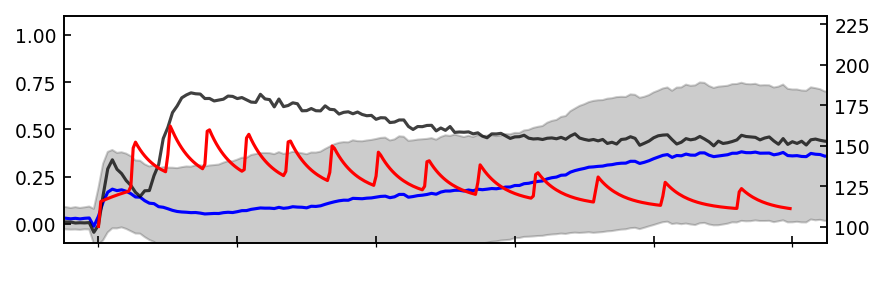

In [16]:
#plt.figure(figsize=(12,12),dpi=150)
case=["0uM","50uM","100uM","500uM","1mM"]
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']


color1 = 'red'
color2 = 'darkblue'
for i,j in enumerate(case):
    plt.figure(figsize=(6,2),dpi=150)
    plt.tick_params(labelsize=9,direction='in')
    plt.plot(dura[0:300]/60,data[i][0:300],'k',lw=1.5,label='Sim - BV2')
    #plt.subplots_adjust(hspace = 0.01)
    plt.ylim([90,230])
    plt.xticks([0,1,2,3,4,5]," ")
    #ax.legend(loc=0,fontsize=7)
    #ax.xaxis.set_ticklabels([])
    #plt.title(Case2[i],fontsize=10)
    plt.tight_layout()#(pad=0.01)


    plt.figure(figsize=(6,2),dpi=150)
    #ax = plt.subplots()
    plt.tick_params(labelsize=9,direction='in')
    plt.plot(dura[0:300]/60,datap[i][0:300],'k',lw=1.5,label='Sim - Primary')
    #plt.subplots_adjust(hspace = 0.01)
    plt.ylim([90,230])
    plt.xticks([0,1,2,3,4,5]," ")
    #ax.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=9)
    #ax.legend(loc=0,fontsize=7)
    #ax.xaxis.set_ticklabels([])
    #plt.tight_layout(pad=0.01)

    #ax = plt.subplot(413)
    #ax.tick_params(labelsize=9,direction='in')
    #ax.plot(dura/60,dataac[i],'k',lw=1.5,label='Sim - Acute')
    #plt.subplots_adjust(hspace = 0.1)
    #ax.set_ylim([90,230])
    #ax.legend(loc=0,fontsize=7)
    #ax.xaxis.set_ticklabels([])
    plt.tight_layout()#(pad=0.01)

    plt.figure(figsize=(6,2),dpi=150)
    x = np.arange(len(meanTrace[case[i]]))
    y = meanTrace[case[i]]/10000
    ax1 = plt.subplot()
    ax1.tick_params(labelsize=9,direction='in')
    ax2 = ax1.twinx()
    ax2.tick_params(labelsize=9,direction='in')
    ax2.plot(dura[0:300]/60,data[i][0:300],'r',lw=1.5,label='Sim - BV2')
    ax1.plot(x*2/60-10,y,'b-',lw=1.5,label='Avg. Intensity (Expt.)')
    ax1.plot(x*2/60-10,dataa[i]/10000,'k-',lw=1.5,alpha=0.75,label='Single Cell')
    ax1.fill_between(x*2/60-10, y-std[case[i]]/10000, y+std[case[i]]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    ax1.set_ylim([-0.1,1.1])
    ax1.set_xlim([-0.25,5.25])
    ax1.set_xticks([0,1,2,3,4,5]," ")
    ax2.set_ylim([90,230])
    plt.xticks([0,1,2,3,4,5]," ")
    #plt.ylabel("Normolized\n Intensity ",fontsize=7,color=color2,alpha=1,fontweight='bold')
    #plt.xlabel('Time (min)',fontsize=9)
    #plt.title('Experiment',fontsize=9)
    #plt.legend(loc=0,fontsize=7,ncol=3)
    plt.tight_layout()#pad=0.01)



#ax1 = plt.subplot(411)
#ax1.tick_params(labelsize=12,direction='in')
#ax1.plot(dura/60,data[0],'r',lw=1.5)
#ax1.plot(dura/60,datap[0],'r',lw=2,alpha=0.7)
#ax1.plot(dura/60,dataac[0],'r',lw=3.5,alpha=0.3)
#ax1.set_ylim([90,250])
#ax1.set_xlim([-0.5,5.5])
#ax1.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12,color=color1,alpha=1,fontweight='bold')
        
#ax2 = ax1.twinx()
#ax2.tick_params(labelsize=12,direction='in')
#x = np.arange(len(meanTrace[case[0]]))
#y = meanTrace[case[0]]/10000
#ax2.plot(x*2/60-10,y,'k-',lw=1.5,label='Avg. Intensity')
#ax2.plot(x*2/60-10,dataa[0]/10000,'b-',lw=1.5,alpha=0.75,label='Single Cell')
#ax2.fill_between(x*2/60-10, y-std[case[0]]/10000, y+std[case[0]]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
#ax2.plot([100],[100],'r',lw=1.5,label='Sim. - BV2')
#ax2.plot([100],[100],'r',lw=2,alpha=0.7,label='Sim. - Primary')
#ax2.plot([100],[100],'r',lw=3.5,alpha=0.3,label='Sim. - Acute')
#ax2.set_ylim([-0.1,1.5])
#ax2.set_xlim([-0.5,5.5])
#ax2.plot([0,5],[1.4,1.4],'k-',lw=5,label='ATP')
#ax2.set_ylabel("Normolized Intensity",fontsize=12,color=color2,alpha=1,fontweight='bold')
        
#ax1.set_xlabel('Time (min)',fontsize=12)
#plt.legend(loc='best',fontsize=9,ncol=2)
#plt.title(Case2[0],fontsize=12)


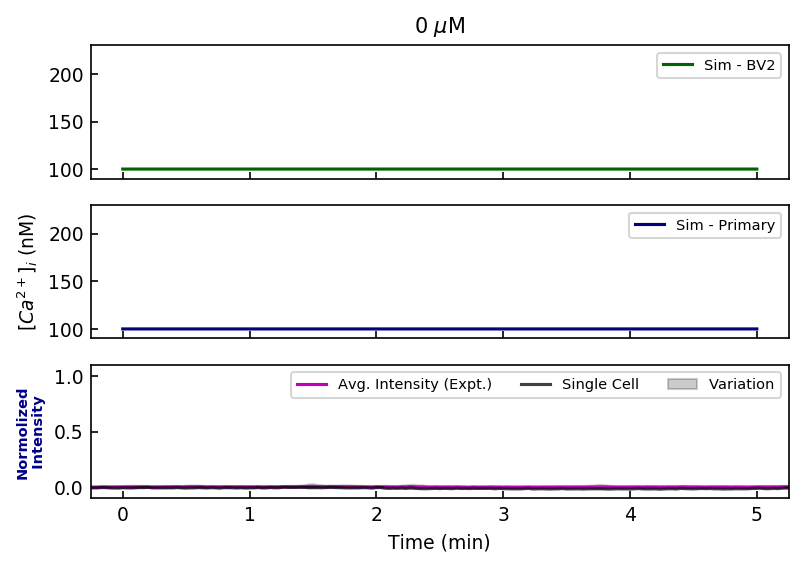

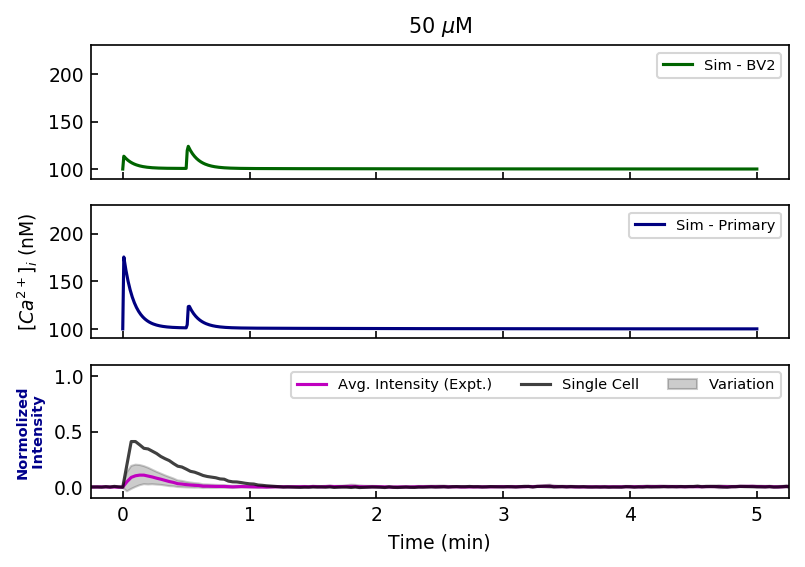

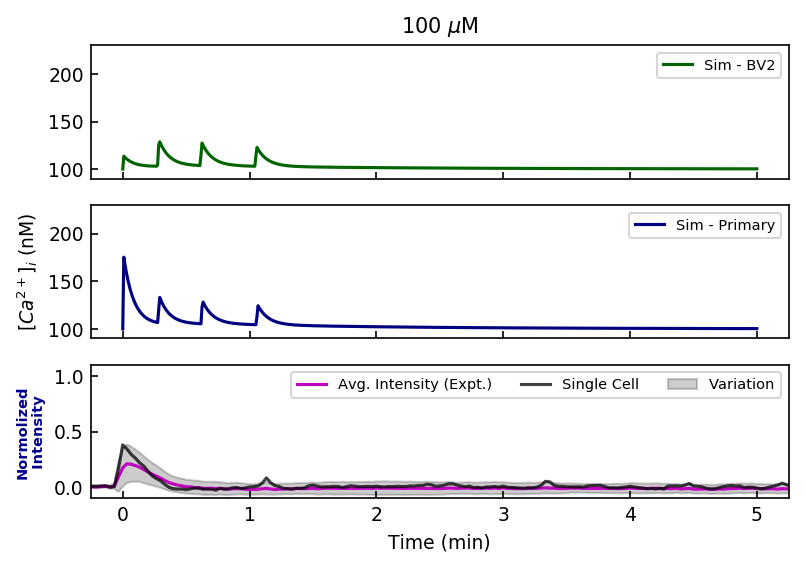

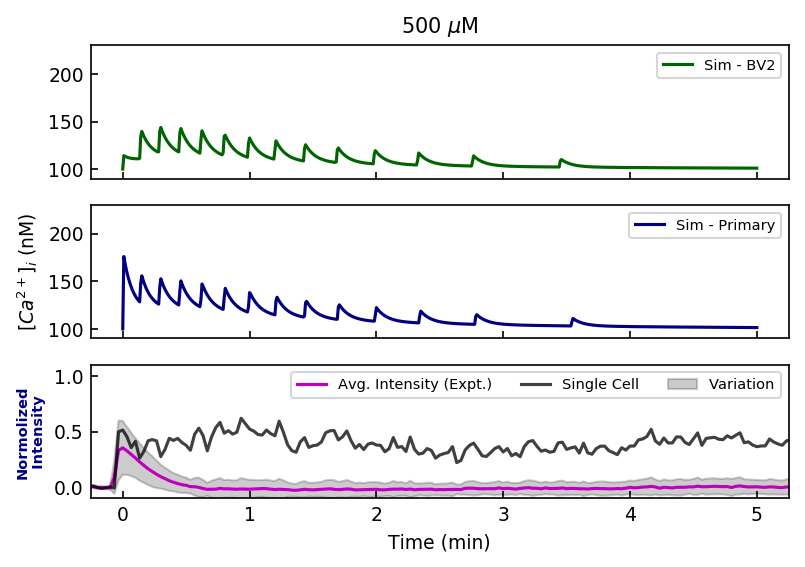

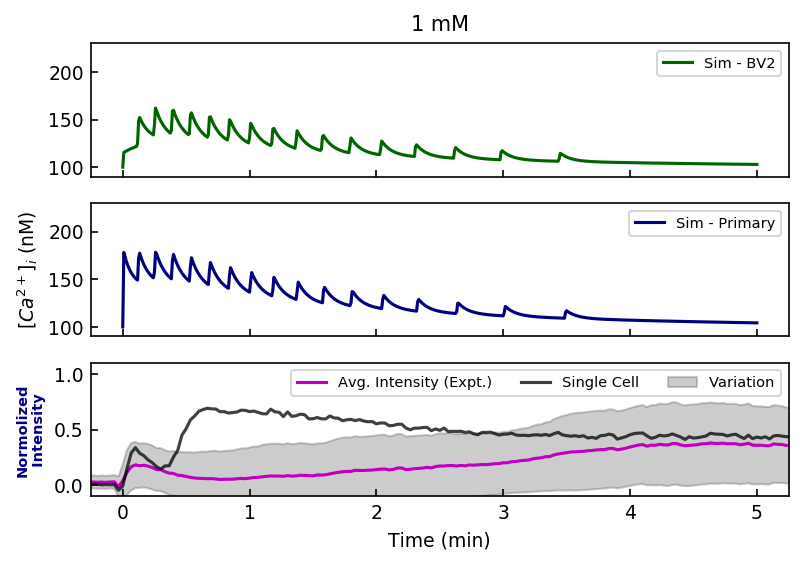

In [47]:
#plt.figure(figsize=(12,12),dpi=150)
case=["0uM","50uM","100uM","500uM","1mM"]
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']


color1 = 'red'
color2 = 'darkblue'
for i,j in enumerate(case):
    plt.figure(figsize=(6,4),dpi=150)
    ax = plt.subplot(311)
    ax.tick_params(labelsize=9,direction='in')
    ax.plot(dura/60,data[i],'darkgreen',lw=1.5,label='Sim - BV2')
    #plt.subplots_adjust(hspace = 0.01)
    ax.set_ylim([90,230])
    ax.legend(loc=0,fontsize=7)
    ax.xaxis.set_ticklabels([])
    plt.title(Case2[i],fontsize=10)
    #plt.tight_layout(pad=0.01)


    ax = plt.subplot(312)
    ax.tick_params(labelsize=9,direction='in')
    ax.plot(dura/60,datap[i],'navy',lw=1.5,label='Sim - Primary')
    #plt.subplots_adjust(hspace = 0.01)
    ax.set_ylim([90,230])
    ax.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=9)
    ax.legend(loc=0,fontsize=7)
    ax.xaxis.set_ticklabels([])
    #plt.tight_layout(pad=0.01)

    #ax = plt.subplot(413)
    #ax.tick_params(labelsize=9,direction='in')
    #ax.plot(dura/60,dataac[i],'k',lw=1.5,label='Sim - Acute')
    #plt.subplots_adjust(hspace = 0.1)
    #ax.set_ylim([90,230])
    #ax.legend(loc=0,fontsize=7)
    #ax.xaxis.set_ticklabels([])
    #plt.tight_layout(pad=0.01)

    plt.subplot(313)
    plt.tick_params(labelsize=9,direction='in')
    x = np.arange(len(meanTrace[case[i]]))
    y = meanTrace[case[i]]/10000
    plt.plot(x*2/60-10,y,'m-',lw=1.5,label='Avg. Intensity (Expt.)')
    plt.plot(x*2/60-10,dataa[i]/10000,'k-',lw=1.5,alpha=0.75,label='Single Cell')
    plt.fill_between(x*2/60-10, y-std[case[i]]/10000, y+std[case[i]]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.25,5.25])
    plt.ylabel("Normolized\n Intensity ",fontsize=7,color=color2,alpha=1,fontweight='bold')
    plt.xlabel('Time (min)',fontsize=9)
    #plt.title('Experiment',fontsize=9)
    plt.legend(loc=0,fontsize=7,ncol=3)
    #plt.tight_layout()#pad=0.01)



#ax1 = plt.subplot(411)
#ax1.tick_params(labelsize=12,direction='in')
#ax1.plot(dura/60,data[0],'r',lw=1.5)
#ax1.plot(dura/60,datap[0],'r',lw=2,alpha=0.7)
#ax1.plot(dura/60,dataac[0],'r',lw=3.5,alpha=0.3)
#ax1.set_ylim([90,250])
#ax1.set_xlim([-0.5,5.5])
#ax1.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12,color=color1,alpha=1,fontweight='bold')
        
#ax2 = ax1.twinx()
#ax2.tick_params(labelsize=12,direction='in')
#x = np.arange(len(meanTrace[case[0]]))
#y = meanTrace[case[0]]/10000
#ax2.plot(x*2/60-10,y,'k-',lw=1.5,label='Avg. Intensity')
#ax2.plot(x*2/60-10,dataa[0]/10000,'b-',lw=1.5,alpha=0.75,label='Single Cell')
#ax2.fill_between(x*2/60-10, y-std[case[0]]/10000, y+std[case[0]]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
#ax2.plot([100],[100],'r',lw=1.5,label='Sim. - BV2')
#ax2.plot([100],[100],'r',lw=2,alpha=0.7,label='Sim. - Primary')
#ax2.plot([100],[100],'r',lw=3.5,alpha=0.3,label='Sim. - Acute')
#ax2.set_ylim([-0.1,1.5])
#ax2.set_xlim([-0.5,5.5])
#ax2.plot([0,5],[1.4,1.4],'k-',lw=5,label='ATP')
#ax2.set_ylabel("Normolized Intensity",fontsize=12,color=color2,alpha=1,fontweight='bold')
        
#ax1.set_xlabel('Time (min)',fontsize=12)
#plt.legend(loc='best',fontsize=9,ncol=2)
#plt.title(Case2[0],fontsize=12)


In [19]:
for i,j in enumerate(case):
    print(i)
    print(j)

0
0uM
1
50uM
2
100uM
3
500uM
4
1mM


#### TNFa validation

In [41]:
duration = 10800
ATP = [10,100,300,1000,3000]
###### No ATP ####################################
dtime     = SR.gotranMicroglia(sim_time      = duration,
                               ATP           = ATP[4],
                               output_name   = 'test1',
                               ode_file_name = 'p2xp2yMigration32',
                               rhop2yc       = 0,
                               data_name2    = 'DNA_TNF',
                               data_name3    = 'DNATNF',
                               data_name4    = 'mRNA_TNF',
                               data_name5    = 'TNFae',
                               DegSwitch     = 0,
                               removePickle  = 1)

data_tnfa = {}
for i in np.arange(4):
    data  =  SR.gotranMicroglia(sim_time      = duration,
                                ATP           = ATP[i],
                                output_name   = 'test1',
                                ode_file_name = 'p2xp2yMigration32',
                                rhop2yc       = 0,
                                data_name2    = 'DNA_TNF',
                                data_name3    = 'DNATNF',
                                data_name4    = 'mRNA_TNF',
                                data_name5    = 'TNFae',
                                DegSwitch     = 0,
                                removePickle  = 1)
    data_tnfa[str(ATP[i])] = data[4]



 -------------- 54.29714918136597 seconds --------------
 ------------ End of Simulation -----------
 -------------- 54.730499029159546 seconds --------------
 ------------ End of Simulation -----------
 -------------- 53.583258867263794 seconds --------------
 ------------ End of Simulation -----------
 -------------- 54.76249933242798 seconds --------------
 ------------ End of Simulation -----------
 -------------- 54.885573387145996 seconds --------------
 ------------ End of Simulation -----------


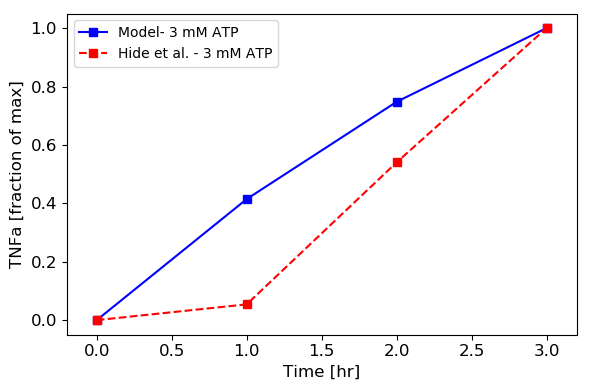

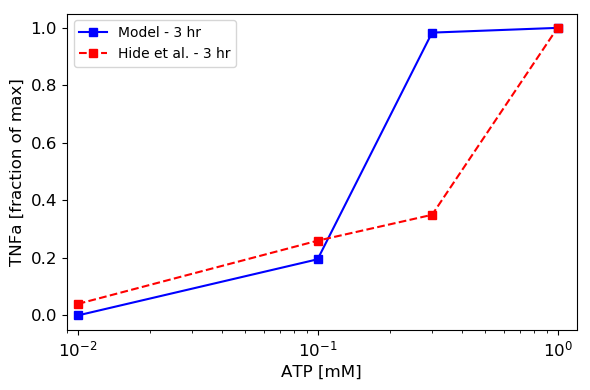

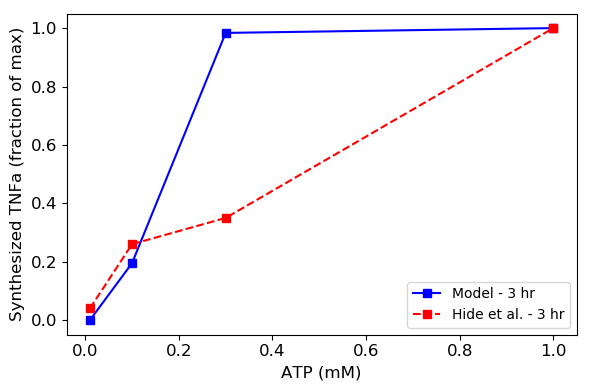

In [42]:
hrs = np.array([0,1,2,3])
Hide = np.array([0,0.054,0.54,1])

calctnfamrna0 = np.array([dtime[4][0],dtime[4][3599],dtime[4][7199],dtime[4][10799]])-dtime[4][0]
calctnfamrna1 = (calctnfamrna0)/max(calctnfamrna0)

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.plot(hrs,calctnfamrna1,'b-s',label="Model- 3 mM ATP")
plt.plot(hrs,Hide,'r--s',label="Hide et al. - 3 mM ATP")
plt.xlim(-0.2,3.2)
plt.ylim(-0.05,1.05)
plt.legend(loc=0,fontsize=10)
plt.xlabel("Time [hr]",fontsize=12)
plt.ylabel("TNFa [fraction of max]",fontsize=12)
plt.tight_layout()
plt.savefig('tnfatimedepd.png')


calctnfamrna2 = np.array([data_tnfa['10'][-1],data_tnfa['100'][-1],data_tnfa['300'][-1],data_tnfa['1000'][-1]])
calctnfamran3 = (calctnfamrna2-min(calctnfamrna2))/max(calctnfamrna2-min(calctnfamrna2))

ATP1 = np.array([0.01,0.1,0.3,1])
ATP2 = np.array([0.01,0.1,0.3,1])
Hide2 = np.array([0.04,0.26,0.35,1])

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.semilogx(ATP2,calctnfamran3,'b-s',label="Model - 3 hr")
plt.semilogx(ATP1,Hide2,'r--s',label="Hide et al. - 3 hr")

plt.xlim(0.009,1.2)
plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP [mM]",fontsize=12)
plt.ylabel("TNFa [fraction of max]",fontsize=12)
plt.tight_layout()
plt.savefig('tnfaATPdepd1.png')

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.plot(ATP2,calctnfamran3,'b-s',label="Model - 3 hr")
plt.plot(ATP1,Hide2,'r--s',label="Hide et al. - 3 hr")

plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP (mM)",fontsize=12)
plt.ylabel("Synthesized TNFa (fraction of max)",fontsize=12)
plt.tight_layout()
plt.savefig('tnfaATPdepd2.png')


#### Comparison between current and previous model 

In [43]:
duration = 300
ATP = 1000
###### No ATP ####################################
d1     = SR.gotranMicroglia(sim_time      = duration,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2yc       = 0,
                            data_name2    = 'DNA_TNF',
                            data_name3    = 'DNATNF',
                            data_name4    = 'mRNA_TNF',
                            data_name5    = 'TNFae',
                            DegSwitch     = 0,
                            removePickle  = 1)

d2     = SR.gotranMicroglia(sim_time      = duration,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2yc       = 1,
                            data_name2    = 'DNA_TNF',
                            data_name3    = 'DNATNF',
                            data_name4    = 'mRNA_TNF',
                            data_name5    = 'TNFae',
                            DegSwitch     = 1,
                            removePickle  = 1)

d3     = SR.gotranMicroglia(sim_time      = duration,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2yc       = 0,
                            data_name2    = 'DNA_TNF',
                            data_name3    = 'DNATNF',
                            data_name4    = 'mRNA_TNF',
                            data_name5    = 'TNFae',
                            DegSwitch     = 1,
                            removePickle  = 1)

d4     = SR.gotranMicroglia(sim_time      = duration,
                            ATP           = ATP,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2yc       = 1,
                            data_name2    = 'DNA_TNF',
                            data_name3    = 'DNATNF',
                            data_name4    = 'mRNA_TNF',
                            data_name5    = 'TNFae',
                            DegSwitch     = 0,
                            removePickle  = 1)

mrna5 = d2[4]-d2[4][0]
mrna2 = (mrna5)/max(mrna5)

mrna0 = d1[4]-d1[4][0]
mrna1 = (mrna0)/max(mrna5)

mrna6 = d3[4]-d3[4][0]
mrna3 = (mrna6)/max(mrna5)

mrna7 = d4[4]-d4[4][0]
mrna4 = (mrna7)/max(mrna5)

 -------------- 3.092174768447876 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.776719570159912 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0644829273223877 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.144440174102783 seconds --------------
 ------------ End of Simulation -----------


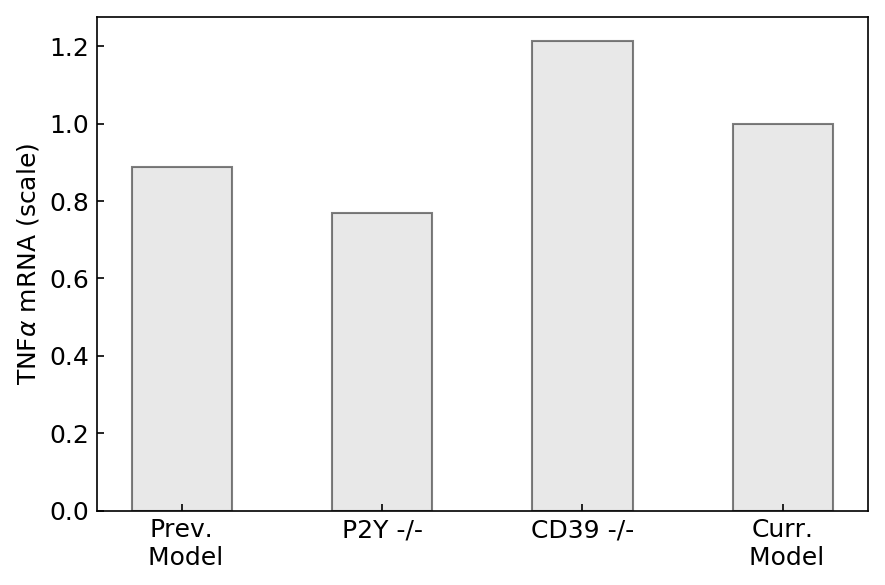

In [44]:
bar_width = 0.5
space = bar_width/2

objects = ('Prev.\n Model','P2Y -/-','CD39 -/-','Curr.\n Model')
y_pos = np.arange(len(objects))
mrna = [mrna1[-1], mrna3[-1], mrna4[-1], mrna2[-1]]
plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos, mrna, bar_width, align='center', color='lightgray', alpha=0.5, edgecolor='black')

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.tight_layout()
plt.savefig('CurrentvsPrevious.png')

#### TNFa estimation via interporating from the experiment by Hide et al. 

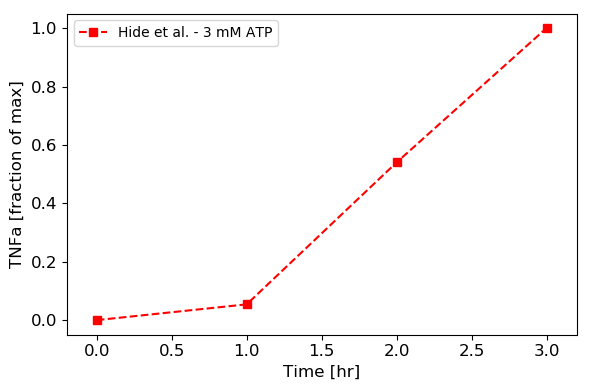

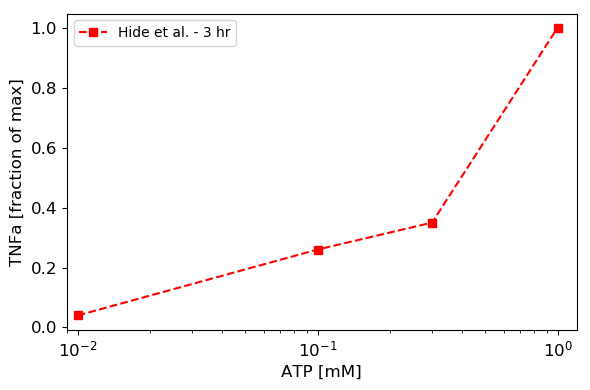

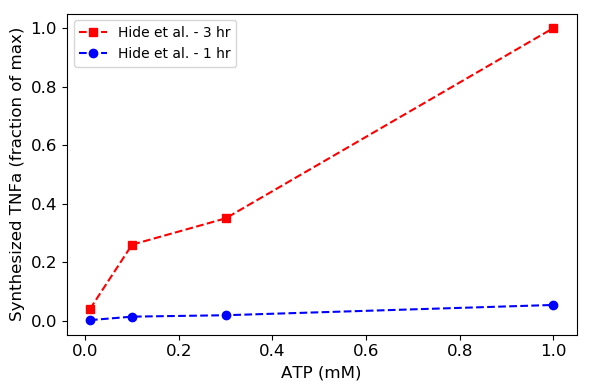

In [46]:
hrs = np.array([0,1,2,3])
Hide = np.array([0,0.054,0.54,1])

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.plot(hrs,Hide,'r--s',label="Hide et al. - 3 mM ATP")
plt.xlim(-0.2,3.2)
plt.ylim(-0.05,1.05)
plt.legend(loc=0,fontsize=10)
plt.xlabel("Time [hr]",fontsize=12)
plt.ylabel("TNFa [fraction of max]",fontsize=12)
plt.tight_layout()

ATP1 = np.array([0.01,0.1,0.3,1])
Hide2 = np.array([0.04,0.26,0.35,1])
Hide3 = np.array([0.04,0.26,0.35,1])*0.054

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.semilogx(ATP1,Hide2,'r--s',label="Hide et al. - 3 hr")

plt.xlim(0.009,1.2)
#plt.ylim(0,1.05)

plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP [mM]",fontsize=12)
plt.ylabel("TNFa [fraction of max]",fontsize=12)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(labelsize=12)
plt.plot(ATP1,Hide2,'r--s',label="Hide et al. - 3 hr")
plt.plot(ATP1,Hide3,'b--o',label="Hide et al. - 1 hr")

plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP (mM)",fontsize=12)
plt.ylabel("Synthesized TNFa (fraction of max)",fontsize=12)
plt.tight_layout()


[1.82236235e-02 2.00000000e+00 7.13243085e-23]


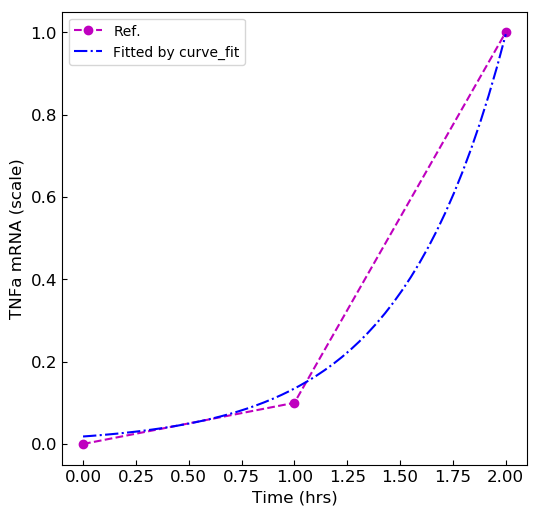

In [47]:
from scipy.optimize import curve_fit
from scipy.integrate import odeint

## This is the experiment data: "Reference" - 3 mM
hrs = np.array([0,1,2])
Hide = np.array([0,0.054,0.54])/0.54

### Writing Platform of function to generate outcomes that you target
def func(x, a, b, c):
    return a * np.exp(b * x) + c

##### INITIAL GUESS ######
guess = [1,1,0] ## Initial guess is important. If your guess is so wild, then fitting may fail.

##### Execution of Fitting Process #####
kfit,kcov = curve_fit(func,hrs,Hide,guess,bounds=(0,2),maxfev=100000)
print(kfit) ## This is the fitted parameters. This is being printed 

tfit = np.linspace(0,2)
fit = func(tfit,kfit[0],kfit[1],kfit[2])  ## applying newly fitted parameters 

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(hrs,Hide,'--om',label='Ref.')
plt.plot(tfit, fit, 'b-.', label='Fitted by curve_fit')
plt.xlabel('Time (hrs)',fontsize=12)
plt.ylabel('TNFa mRNA (scale)',fontsize=12)
plt.legend(loc='best',fontsize=10)

In [48]:
# scales were taken from difference between 3 mM and 1 mM or 10 uM or 100 uM 
expAt1mM5min = (1.82236235e-02*np.exp(2*(5/60))+7.13243085e-23)*1.6923
expAt10uM5min = (1.82236235e-02*np.exp(2*(5/60))+7.13243085e-23)*0.06769
expAt100uM5min = (1.82236235e-02*np.exp(2*(5/60))+7.13243085e-23)*0.44
print(expAt1mM5min)

0.03643296381033536


In [51]:
p2y = [0,1]
deg = [0,1]
atp = [10,100,1000]
counter = 0
duration = 300

for a in np.arange(len(atp)):
    for p in np.arange(len(p2y)):
        for d in np.arange(len(deg)):
            data     = SR.gotranMicroglia(sim_time      = duration,
                                          ATP           = atp[a],
                                          output_name   = 'test1',
                                          ode_file_name = odefilename,
                                          rhop2yc       = p2y[p],
                                          data_name2    = 'DNA_TNF',
                                          data_name3    = 'DNATNF',
                                          data_name4    = 'mRNA_TNF',
                                          data_name5    = 'TNFae',
                                          DegSwitch     = deg[d],
                                          removePickle  = 1)
            if counter == 0:
                dura    = data[0]
                mrna    = data[4]
                tnfa    = data[5]
            else:
                tnfa    = np.vstack([tnfa,data[5]])
                mrna    = np.vstack([mrna,data[4]])
                              
            counter = counter + 1



 -------------- 3.0583412647247314 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.14703631401062 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.137342691421509 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2211949825286865 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.058450698852539 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.137294054031372 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.55696439743042 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.383051872253418 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0781545639038086 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.12312650680542 seconds --------------
 ------------ End of Simulation --

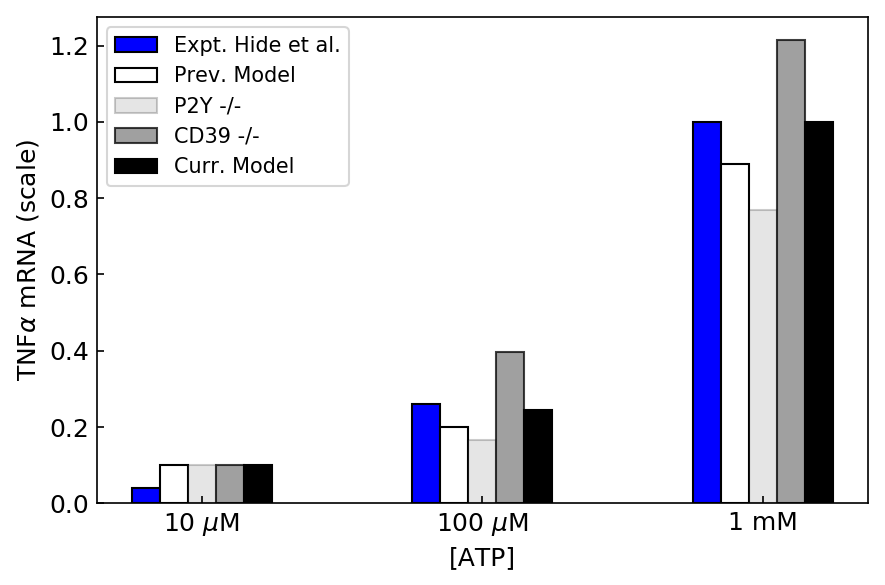

In [53]:
bar_width = 0.1
space = bar_width/2

prev = (np.array([mrna[0][-1], mrna[4][-1], mrna[8][-1]]) - mrna[0][0])/(mrna[11][-1]-mrna[1][0])
curr = (np.array([mrna[3][-1], mrna[7][-1], mrna[11][-1]]) - mrna[3][0])/(mrna[11][-1]-mrna[1][0])
nocd = (np.array([mrna[2][-1], mrna[6][-1], mrna[10][-1]]) - mrna[2][0])/(mrna[11][-1]-mrna[1][0])
nopy = (np.array([mrna[1][-1], mrna[5][-1], mrna[9][-1]]) - mrna[1][0])/(mrna[11][-1]-mrna[1][0])
exp = [expAt10uM5min, expAt100uM5min, expAt1mM5min]/expAt1mM5min

objects = ('10 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))

plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-space*4, exp,  bar_width, align='center', color='blue', alpha=1, edgecolor='black',label='Expt. Hide et al.')
plt.bar(y_pos-space*2, prev, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='Prev. Model')
plt.bar(y_pos-space*0, nopy, bar_width, align='center', color='gray', alpha=0.2, edgecolor='black',label='P2Y -/-')
plt.bar(y_pos+space*2, nocd, bar_width, align='center', color='gray', alpha=0.75, edgecolor='black',label='CD39 -/-')
plt.bar(y_pos+space*4, curr, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='Curr. Model')

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()
plt.savefig('tnfaValid.png')

#### Akt valdiation

In [6]:
ATP = np.array([10,50,100,1000])
time = 300
counter = 0
p2x4 = np.array([1])
p2x7 = np.array([1])
p2yc = np.array([1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                elif p2x4[j] == 0 and p2x7[k] == 0:
                    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = ATP[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename,
                                                rhop2x4       = p2x4[j],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[l],
                                                kf5_p2y12     = 0.001,
                                                data_name2    = 'pAkt',
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        pAkt    = data[2]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        py      = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        pAkt    = np.vstack([pAkt,data[2]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[l])
                              
                    counter = counter + 1
                
data   = SR.gotranMicroglia(sim_time      = time,
                            ATP           = 50,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            kf5_p2y12     = 0.001,
                            data_name2    = 'pAkt',
                            DegSwitch     = 0,
                            removePickle  = 1) 

pAkt = np.vstack([pAkt,data[2]])

 -------------- 3.0884666442871094 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2111523151397705 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.442079544067383 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.825007200241089 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.6558420658111572 seconds --------------
 ------------ End of Simulation -----------


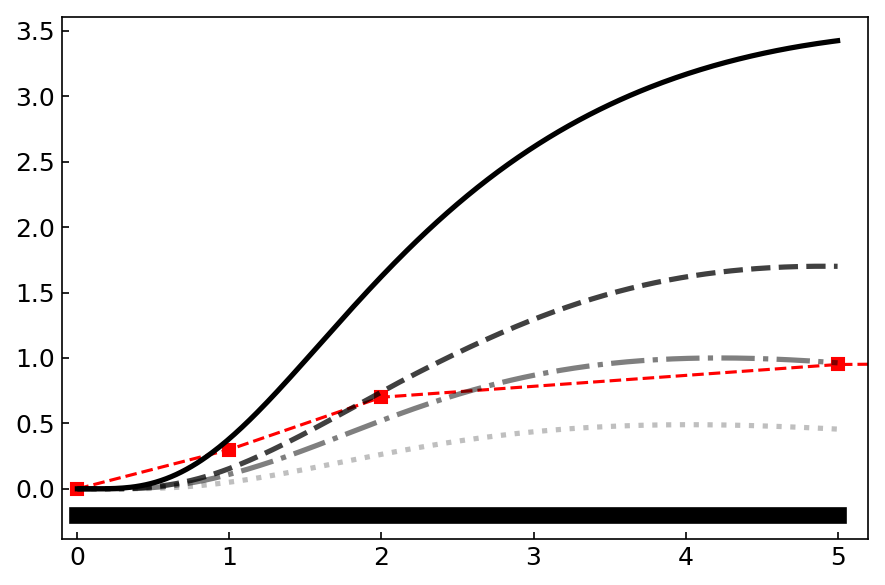

In [53]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,0.30,0.70,0.95,1],'r--s',linewidth=1.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[0]/max(pAkt[1]),'k:',linewidth=2.5,alpha=0.25,label="10 $\mu$M")
plt.plot(dura/60,pAkt[1]/max(pAkt[1]),'k-.',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[2]/max(pAkt[1]),'k--',linewidth=2.5,alpha=0.75,label="100 $\mu$M")
plt.plot(dura/60,pAkt[3]/max(pAkt[1]),'k-',linewidth=2.5,alpha=1,label="1 mM")
#plt.plot(dura/60,pAkt[4]/max(pAkt[1])*100,'cyan',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-0.2),'k-',lw=8,alpha=1,label='ATP')
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("Time (min)",fontsize=12)
#plt.ylabel("Akt Phosphorylation (relative %)",fontsize=12)
plt.xlim([-0.1,5.2])
plt.tight_layout()
#plt.subplots_adjust(wspace=0.25)
#plt.savefig('pAkt.png')

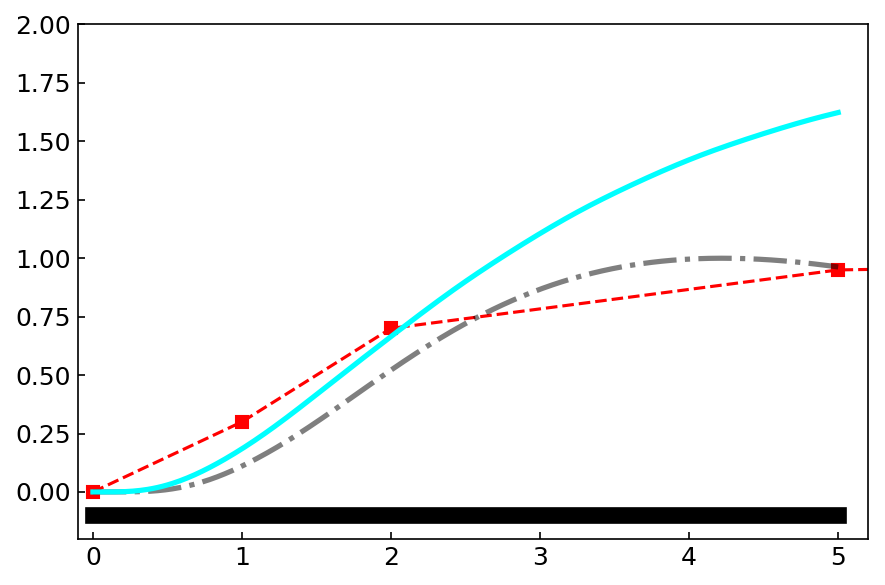

In [15]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,0.30,0.70,0.95,1],'r--s',linewidth=1.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[1]/max(pAkt[1]),'k-.',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[4]/max(pAkt[1]),'cyan',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-0.10),'k-',lw=8,alpha=1,label='ATP')
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("Time (min)",fontsize=12)
#plt.ylabel("Akt Phosphorylation (relative %)",fontsize=12)
plt.xlim([-0.1,5.2])
plt.ylim([-0.2,2])
plt.tight_layout()
#plt.subplots_adjust(wspace=0.25)
#plt.savefig('pAkt.png')

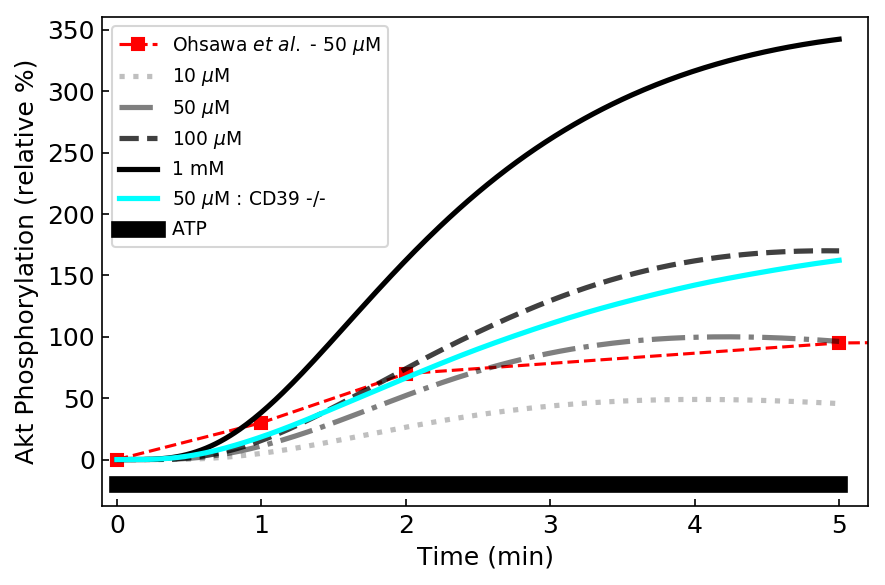

In [16]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,30,70,95,100],'r--s',linewidth=1.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[0]/max(pAkt[1])*100,'k:',linewidth=2.5,alpha=0.25,label="10 $\mu$M")
plt.plot(dura/60,pAkt[1]/max(pAkt[1])*100,'k-.',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[2]/max(pAkt[1])*100,'k--',linewidth=2.5,alpha=0.75,label="100 $\mu$M")
plt.plot(dura/60,pAkt[3]/max(pAkt[1])*100,'k-',linewidth=2.5,alpha=1,label="1 mM")
plt.plot(dura/60,pAkt[4]/max(pAkt[1])*100,'cyan',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-20),'k-',lw=8,alpha=1,label='ATP')
plt.legend(loc=0,fontsize=9)
plt.xlabel("Time (min)",fontsize=12)
plt.ylabel("Akt Phosphorylation (relative %)",fontsize=12)
plt.xlim([-0.1,5.2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.savefig('pAkt.png')

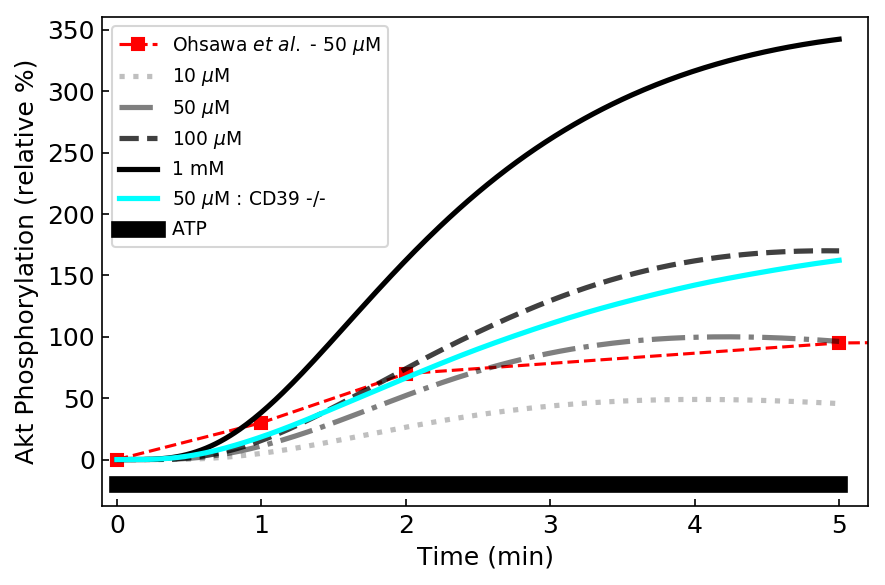

In [16]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,30,70,95,100],'r--s',linewidth=1.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[0]/max(pAkt[1])*100,'k:',linewidth=2.5,alpha=0.25,label="10 $\mu$M")
plt.plot(dura/60,pAkt[1]/max(pAkt[1])*100,'k-.',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[2]/max(pAkt[1])*100,'k--',linewidth=2.5,alpha=0.75,label="100 $\mu$M")
plt.plot(dura/60,pAkt[3]/max(pAkt[1])*100,'k-',linewidth=2.5,alpha=1,label="1 mM")
plt.plot(dura/60,pAkt[4]/max(pAkt[1])*100,'cyan',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-20),'k-',lw=8,alpha=1,label='ATP')
plt.legend(loc=0,fontsize=9)
plt.xlabel("Time (min)",fontsize=12)
plt.ylabel("Akt Phosphorylation (relative %)",fontsize=12)
plt.xlim([-0.1,5.2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.savefig('pAkt.png')

#### Migration validation against Ohsawa et al (2002)

In [16]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            kf5_p2y12     = 0.001,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 1,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        pakt    = data[5]
                        p2y12   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        pakt    = np.vstack([pakt,data[5]])
                        p2y12   = np.vstack([p2y12,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.1368191242218018 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2332851886749268 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.243690252304077 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.115924835205078 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.123370885848999 seconds --------------
 ------------ End of Simulation -----------


ATP in uM  P2X4  P2X7  P2Y12
0         50     0     0      1
1         50     0     1      1
2         50     1     0      1
3         50     1     1      0
4         50     1     1      1

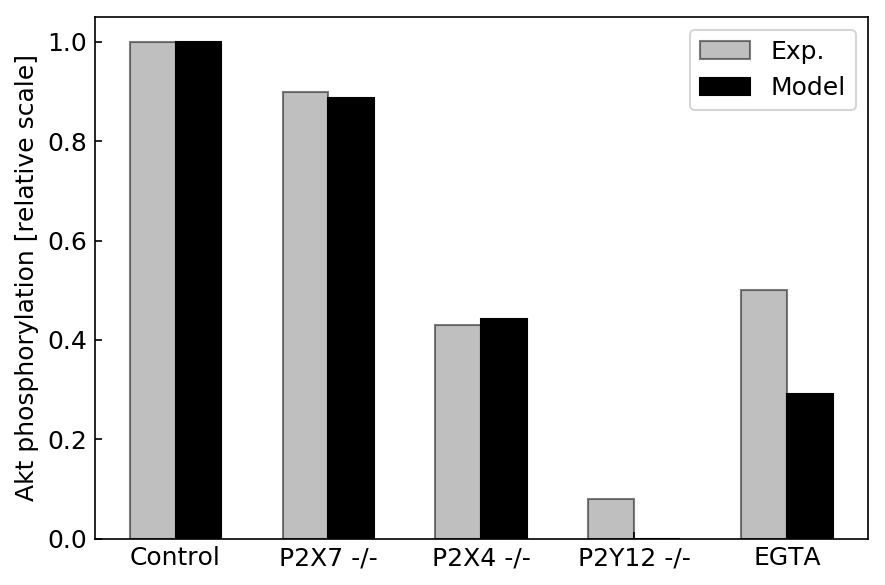

In [9]:
data = np.array([pakt[4][300],pakt[2][300],pakt[1][300],pakt[3][300],pakt[0][300]])
ratio = data/max(data)
expratio = np.array([100,90,43,8,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
ar_width = 0.3
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,1)
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, ratio, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Akt phosphorylation [relative scale]',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('KOdependentAkt.png')

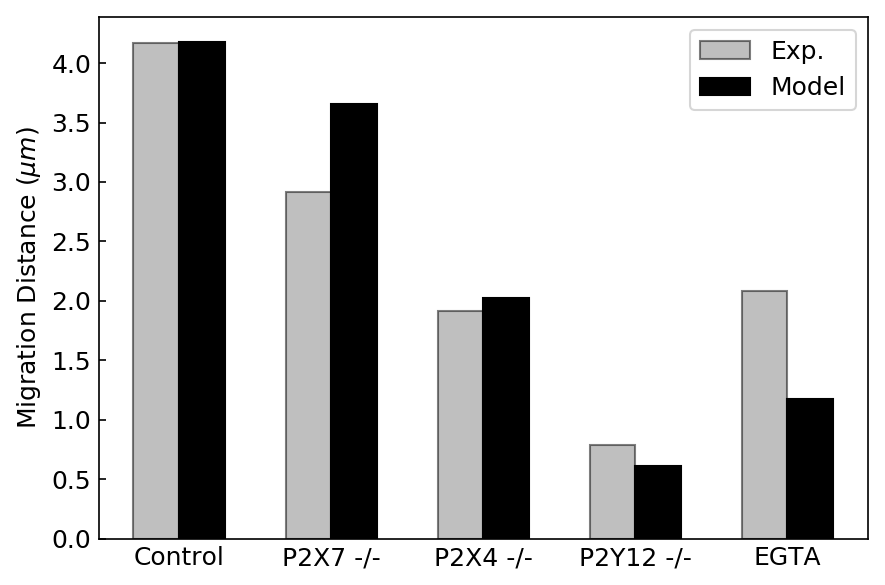

In [8]:
data2 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
ratio = data2/max(data2)
expratio = np.array([100,70,46,19,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio*50/12, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.ylim([0.5,2.85])
plt.xticks(y_pos, objects)
plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("pAktandMigration.png")

In [17]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            kf5_p2y12     = 0.001,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 0,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        paktn    = data[5]
                        p2y12n   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        paktn    = np.vstack([paktn,data[5]])
                        p2y12n   = np.vstack([p2y12n,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.4131858348846436 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.4046502113342285 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.4192492961883545 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.462111473083496 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.7019753456115723 seconds --------------
 ------------ End of Simulation -----------


ATP in uM  P2X4  P2X7  P2Y12
0         50     0     0      1
1         50     0     1      1
2         50     1     0      1
3         50     1     1      0
4         50     1     1      1

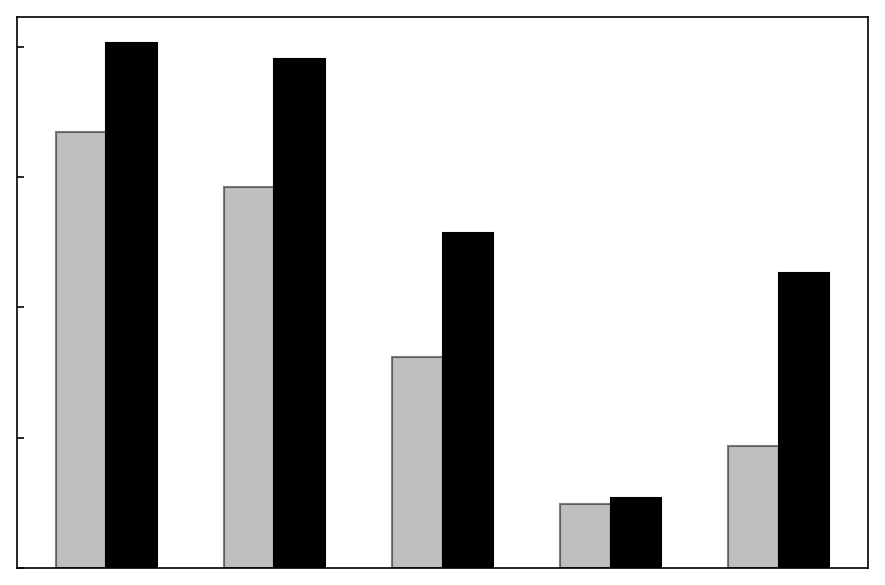

In [24]:
data1 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
data2 = np.array([p2y12n[4][300],p2y12n[2][300],p2y12n[1][300],p2y12n[3][300],p2y12n[0][300]])
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

bar_width = 0.3

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, data1, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, ['','','',''])
plt.yticks(np.linspace(0,5.0,5),"")

plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("pAktandMigration.png")

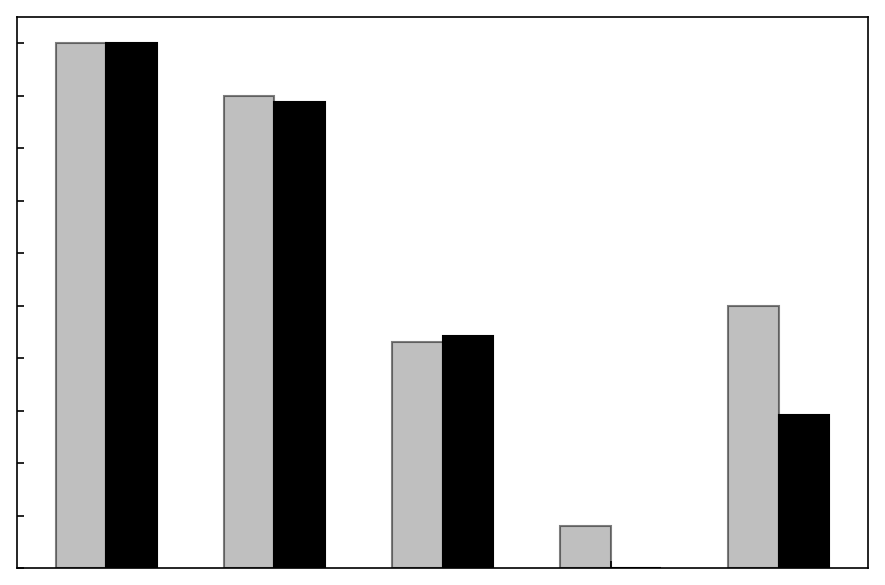

In [10]:
data = np.array([pakt[4][300],pakt[2][300],pakt[1][300],pakt[3][300],pakt[0][300]])
ratio = data/max(data)
expratio = np.array([100,90,43,8,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')
y_pos = np.arange(len(objects))


bar_width = 0.3
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,1)
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, ratio, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, ['','','',''])
#plt.ylabel('Akt phosphorylation [relative scale]',fontsize=12)
plt.yticks(np.linspace(0,1.0,11),"")
#plt.legend(loc=0,fontsize=12)
plt.tight_layout()
#plt.savefig('KOdependentAkt.png')

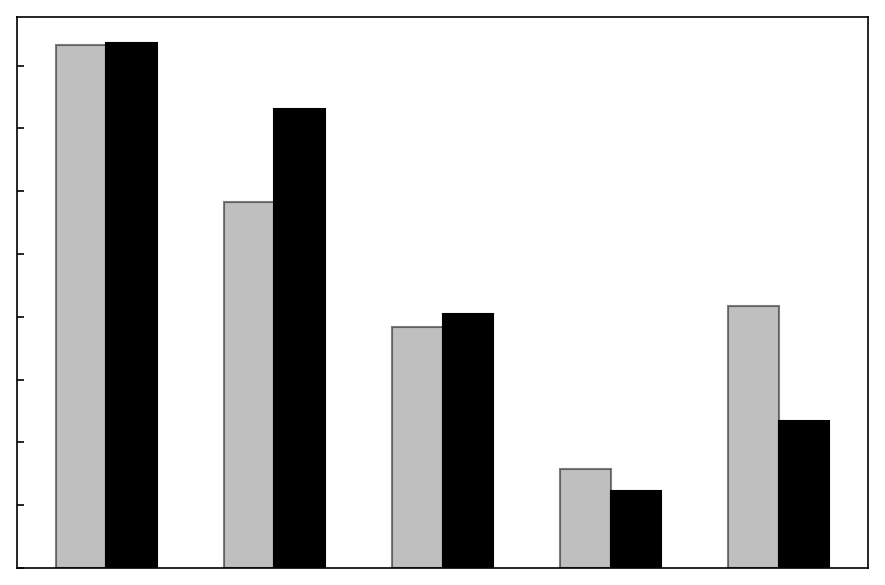

In [11]:
data2 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
ratio = data2/max(data2)
expratio = np.array([100,70,46,19,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio*50/12, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.ylim([0.5,2.85])
plt.xticks(y_pos,['','','',''])
plt.yticks(np.linspace(0,4,9),"")
#plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
#plt.legend(loc=0,fontsize=12)
plt.tight_layout()

#plt.subplots_adjust(wspace=0.25)
#plt.savefig("pAktandMigration.png")

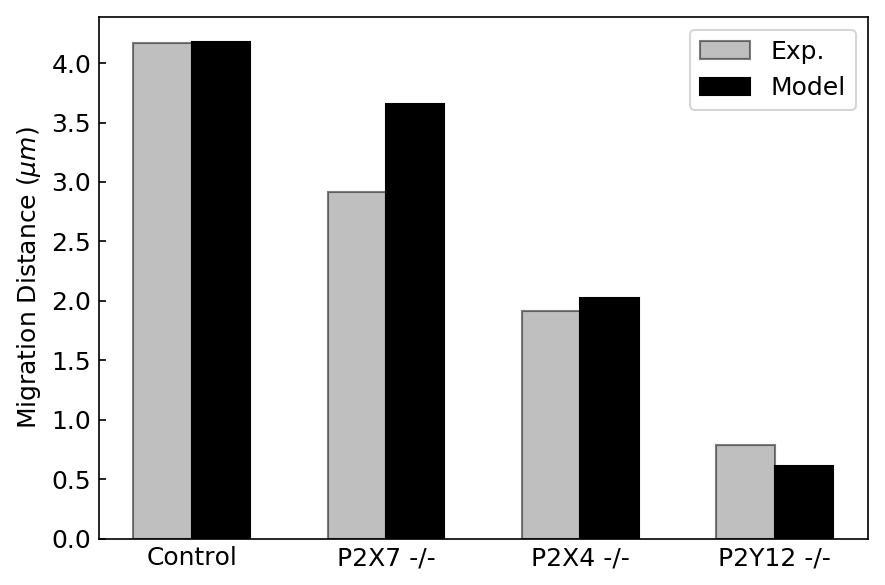

In [37]:
data2 = np.array([p2y12[3][300],p2y12[1][300],p2y12[0][300],p2y12[2][300]])
ratio = data2/max(data2)
expratio = np.array([100,70,46,19])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-')

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio*50/12, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.ylim([0.5,2.85])
plt.xticks(y_pos, objects)
plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("pAktandMigration.png")

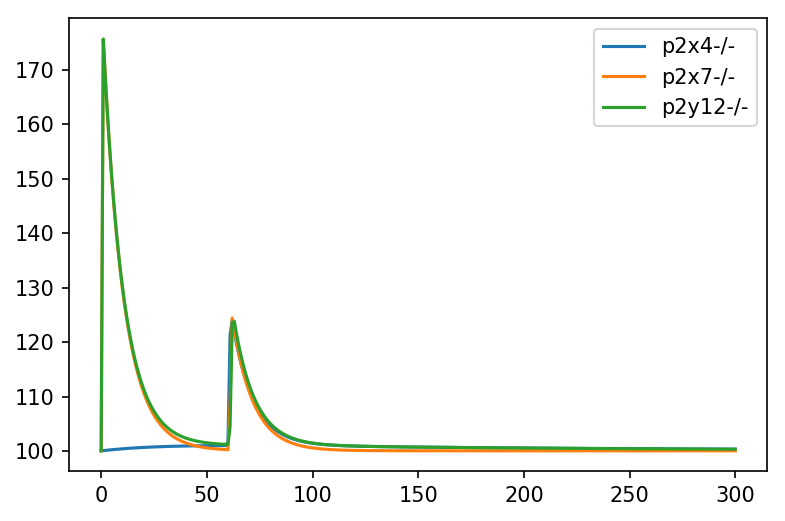

In [131]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(dura,Ca[0],label='p2x4-/-')
plt.plot(dura,Ca[1],label='p2x7-/-')
plt.plot(dura,Ca[2],label='p2y12-/-')
plt.legend(loc=0)

#### KO of purinergic receptor and migration/TNFa production 

In [160]:
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])
p2y12 = np.array([0,1])
A = np.array([0,10,50,100,1000])
time = 300
counter = 0

for i in np.arange(len(A)): # ATP
    for j in np.arange(len(p2yc)): # P2Yc
        for k in np.arange(len(p2x7)): # P2X7
            for l in np.arange(len(p2x4)): # P2X4
                for n in np.arange(len(p2y12)): #P2Y12
                    if p2yc[j] + p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2yc[j] + p2x7[k] + p2x4[l]  == 0:
                        continue
                    elif p2x4[l] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x7[k]  == 0:
                        continue
                    elif p2yc[j] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x4[l] == 0:
                        continue
                    elif p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l]== 0:
                        continue
                        
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = A[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename, ## it was 22 
                                                data_name2    = 'mRNA_TNF',
                                                data_name3    = 'PI3Ka',
                                                data_name4    = 'Ca4_CN',
                                                data_name5    = 'CaMCN',
                                                data_name6    = 'pAkt',
                                                data_name7    = 'Distance',
                                                data_name8    = 'VelMig',
                                                data_name9    = 'NFATNn',
                                                data_name10   = 'TNFae',
                                                rhop2x4       = p2x4[l],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[j],
                                                rhop2y12      = p2y12[n],
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        mRNATNF = data[2]
                        PI3K    = data[3]
                        actCN   = 0.1*data[4] + data[5]
                        pakt    = data[6]
                        dist    = data[7]
                        vel  = data[8]
                        nfatnn   = data[9]
                        TNFae    = data[10]
                        entry   = counter
                        atp     = A[i]
                        p4      = p2x4[l]
                        p7      = p2x7[k]
                        py      = p2yc[j]
                        p12     = p2y12[n]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        mRNATNF = np.vstack([mRNATNF,data[2]])
                        PI3K    = np.vstack([PI3K,data[3]])
                        actCN   = np.vstack([actCN,0.1*data[4] + data[5]])
                        pakt    = np.vstack([pakt,data[6]])
                        dist    = np.vstack([dist,data[7]])
                        vel  = np.vstack([vel,data[8]])
                        nfatnn   = np.vstack([nfatnn,data[9]])
                        TNFae    = np.vstack([TNFae,data[10]])
                        entry   = np.append(entry,counter)
                        atp     = np.append(atp,A[i])
                        p4      = np.append(p4,p2x4[l])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[j])
                        p12     = np.append(p12,p2y12[n])
                              
                    counter = counter + 1
                    
                    
import pandas as pd 

data = {
    'Entry': entry,
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Yc': py,
    'P2Y12': p12,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 4.9732091426849365 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.044285297393799 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.087080955505371 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0832178592681885 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.076293706893921 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0644662380218506 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2015902996063232 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.051846504211426 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.078883647918701 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0838191509246826 seconds --------------
 ------------ End of Simulati

Entry  ATP in uM  P2X4  P2X7  P2Yc  P2Y12
0       0          0     1     1     0      1
1       1          0     1     0     1      1
2       2          0     0     1     1      1
3       3          0     1     1     1      0
4       4          0     1     1     1      1
5       5         10     1     1     0      1
6       6         10     1     0     1      1
7       7         10     0     1     1      1
8       8         10     1     1     1      0
9       9         10     1     1     1      1
10     10         50     1     1     0      1
11     11         50     1     0     1      1
12     12         50     0     1     1      1
13     13         50     1     1     1      0
14     14         50     1     1     1      1
15     15        100     1     1     0      1
16     16        100     1     0     1      1
17     17        100     0     1     1      1
18     18        100     1     1     1      0
19     19        100     1     1     1      1
20     20       1000     1     1     0      1
21     21       1000     1     0     1      1
22     22       1000     0     1     1      1
23     23       1000     1     1     1      0
24     24       1000     1     1     1      1

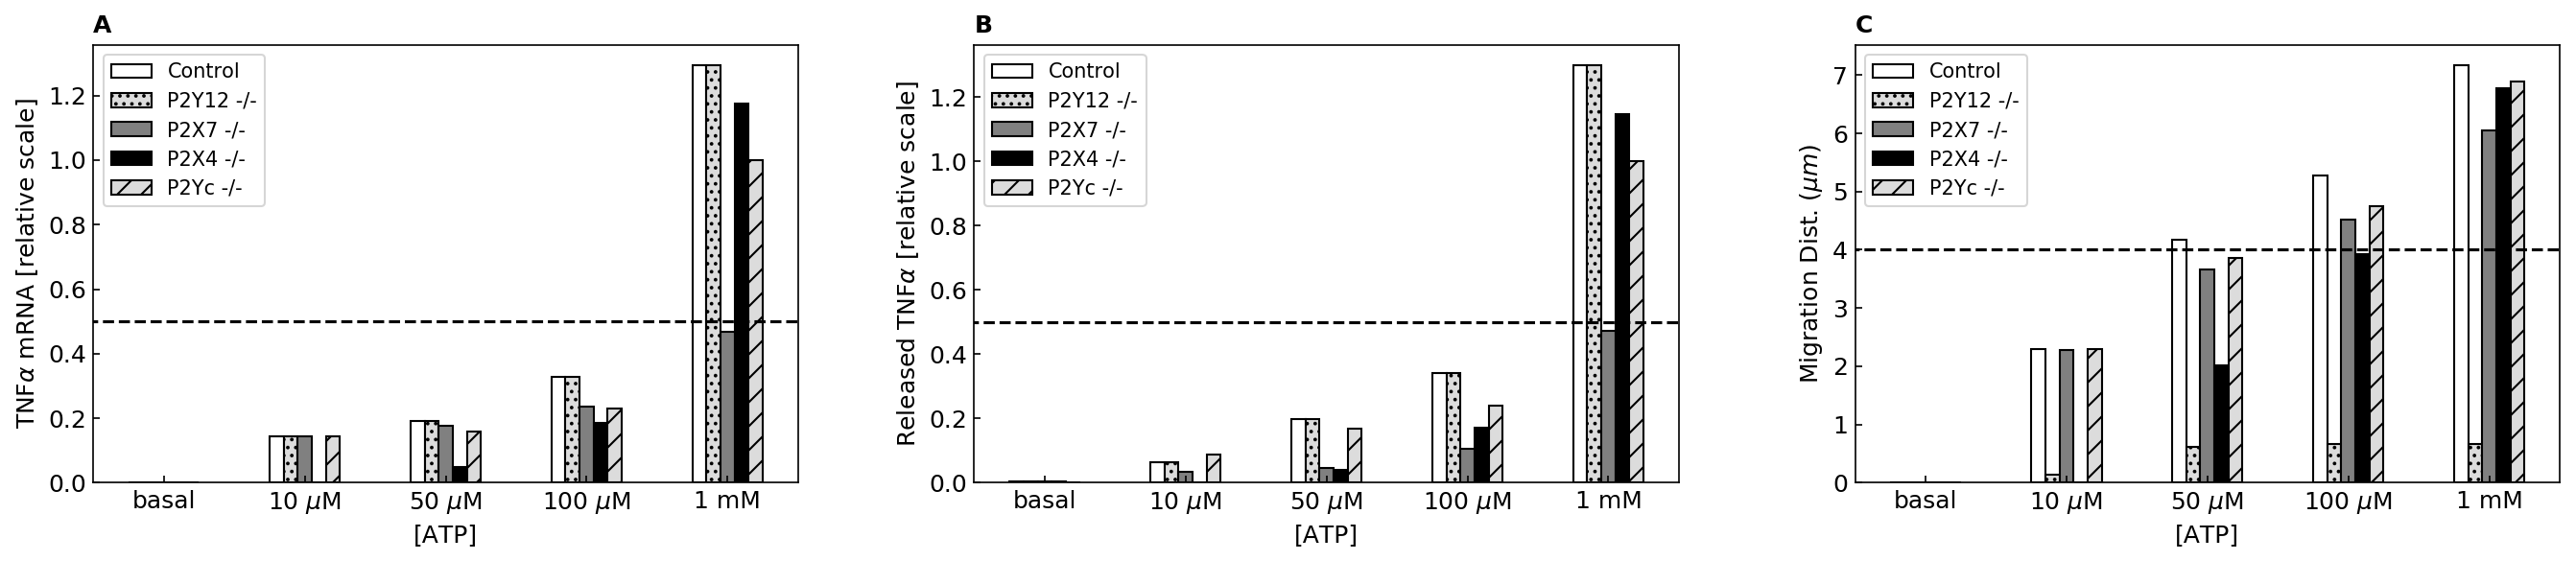

In [161]:
objects = ('basal','10 $\mu$M','50 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))
x = 4 # control
y = 3  # P2Y12 -/-
z = 1  # P2X7 -/-
w = 2  # P2X4 -/-
t = 0  # P2Yc -/-
r = 5
data = np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1],
                 mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1],
                 mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1],
                 mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1],
                 mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]])

control = (np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2y12 = (np.array([mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x7 = (np.array([mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x4 = (np.array([mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2yc = (np.array([mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))


bar_width = 0.1
space = bar_width/2

plt.figure(figsize=(18,4),dpi=150)
ax = plt.subplot(1,3,1)
plt.title('A',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1],
                 TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1],
                 TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1],
                 TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1],
                 TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]])
control = (np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2y12 = (np.array([TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x7 = (np.array([TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x4 = (np.array([TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2yc = (np.array([TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))

ax = plt.subplot(1,3,2)
plt.title('B',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'Released TNF$\alpha$ [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1],
                 dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1],
                 dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1],
                 dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1],
                 dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])


control = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2y12   = np.array([dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x7    = np.array([dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x4    = np.array([dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2yc    = np.array([dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]


ax = plt.subplot(1,3,3)
plt.title('C',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[4,4],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration Dist. ($\mu m$)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("mRNAvsTNFvsMig.png")

#### Phenotype 

In [3]:
p2  = {'acute':1/11.1,'prime':1,'bv':1}
p4  = {'acute':1/2.95,'prime':1,'bv':0.187}
p7  = {'acute':2.65,'prime':1,'bv':0.65}
p12 = {'acute':100,'prime':1,'bv':0.03}
CellType = ['acute','prime','bv']
ATP = [0,50,100,1000]
duration = [300,600,900]
data_storage = {}

for celltype in CellType:
    for a in ATP:
        for t in duration:
            data = SR.gotranMicroglia(sim_time      = t,
                                      ATP           = a,
                                      rhop2yc       = p2[celltype],
                                      rhop2y12      = p12[celltype],
                                      rhop2x4       = p4[celltype],
                                      rhop2x7       = p7[celltype],
                                      output_name   = 'test1',
                                      ode_file_name = odefilename,
                                      data_name2    = 'pAkt',
                                      data_name3    = 'Distance',
                                      data_name4    = 'TNFae',
                                      data_name5    = 'VelMig',
                                      data_name6    = 'mRNA_TNF',
                                      removePickle  = 1,
                                      timePrint     = 0)
            T = int(t/60)
            data_storage[celltype+str(a)+'uM'+str(T)+'minVel'] = data[5]
            data_storage[celltype+str(a)+'uM'+str(T)+'minTNF'] = data[4]
            data_storage[celltype+str(a)+'uM'+str(T)+'minCa'] = data[1]
            
            if t == 300:
                dura = data[0]
            


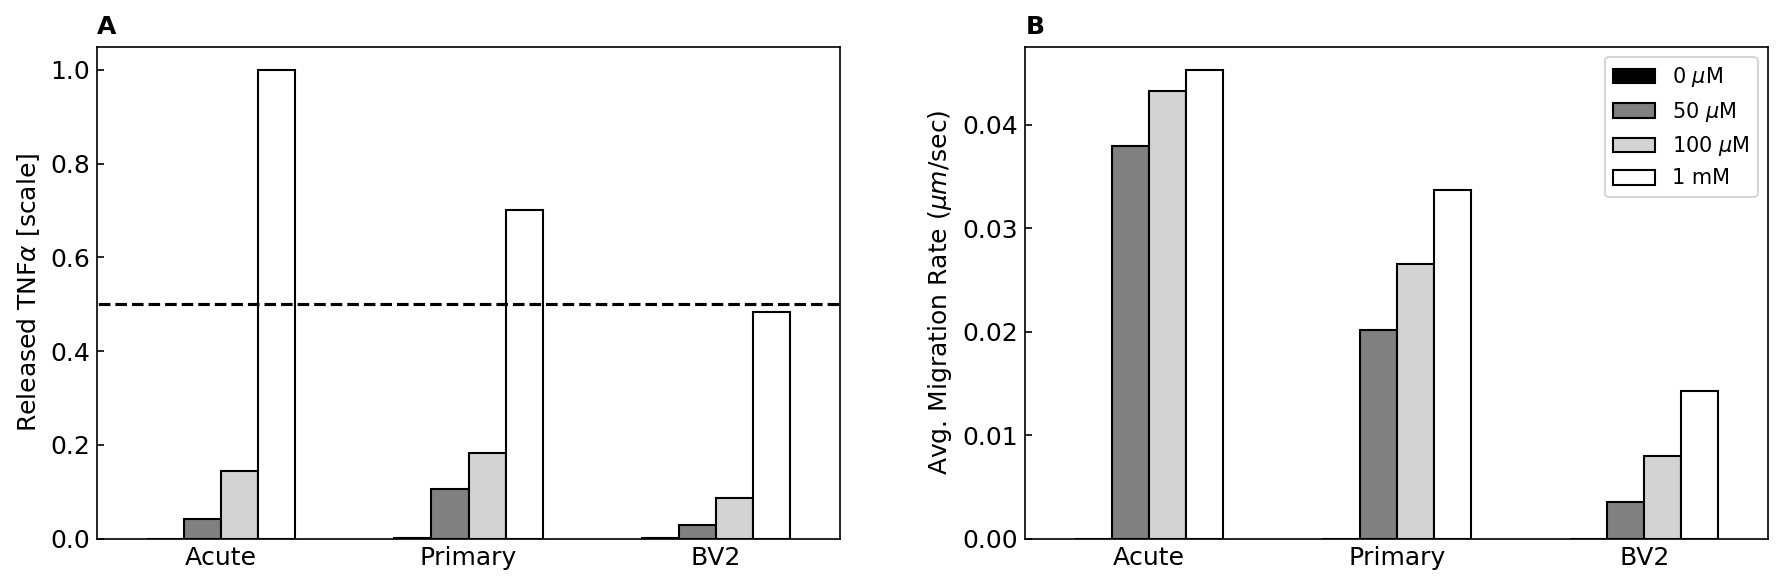

In [15]:
migr0 = np.array([np.average(data_storage['acute0uM5minVel'][240:299]),np.average(data_storage['prime0uM5minVel'][240:299]),np.average(data_storage['bv0uM5minVel'][240:299])])
migr50 = np.array([np.average(data_storage['acute50uM5minVel'][240:299]),np.average(data_storage['prime50uM5minVel'][240:299]),np.average(data_storage['bv50uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]
migr100 = np.array([np.average(data_storage['acute100uM5minVel'][240:299]),np.average(data_storage['prime100uM5minVel'][240:299]),np.average(data_storage['bv100uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]
migr1000 = np.array([np.average(data_storage['acute1000uM5minVel'][240:299]),np.average(data_storage['prime1000uM5minVel'][240:299]),np.average(data_storage['bv1000uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]

init = min(data_storage['acute0uM5minTNF'])
init2 = min(data_storage['acute0uM5minTNF'])
final = data_storage['acute1000uM5minTNF'][-1]
diff = final - init2
tnfa0 = (np.array([data_storage['acute0uM5minTNF'][-1],data_storage['prime0uM5minTNF'][-1],data_storage['bv0uM5minTNF'][-1]])-init)/diff
tnfa50 = (np.array([data_storage['acute50uM5minTNF'][-1],data_storage['prime50uM5minTNF'][-1],data_storage['bv50uM5minTNF'][-1]])-init)/diff
tnfa100 = (np.array([data_storage['acute100uM5minTNF'][-1],data_storage['prime100uM5minTNF'][-1],data_storage['bv100uM5minTNF'][-1]])-init)/diff
tnfa1000 = (np.array([data_storage['acute1000uM5minTNF'][-1],data_storage['prime1000uM5minTNF'][-1],data_storage['bv1000uM5minTNF'][-1]])-init)/diff


objects = ('Acute','Primary','BV2')
y_pos = np.arange(len(objects))

bar_width = 0.15
plt.figure(figsize=(12,4),dpi=150)
ax = plt.subplot(1,2,1)
plt.title('A',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-0.225, tnfa0, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='0 $\mu$M')
plt.bar(y_pos-0.075, tnfa50, bar_width, align='center', color='gray', alpha=1, edgecolor='black',label='50 $\mu$M')
plt.bar(y_pos+0.075,      tnfa100, bar_width, align='center', color='lightgray', alpha=1, edgecolor='black',label='100 $\mu$M')
plt.bar(y_pos+0.225, tnfa1000, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='1 mM')
plt.tick_params(labelsize=12,direction='in')
plt.plot([-1,4],[0.5,0.5],'k--')
plt.xlim([-0.5,2.5])
plt.xticks(y_pos, objects)
plt.ylabel(r'Released TNF$\alpha$ [scale]',fontsize=12)
#plt.legend(loc=0,fontsize=10)
plt.tight_layout()

ax = plt.subplot(1,2,2)
plt.title('B',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-0.225, migr0, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='0 $\mu$M')
plt.bar(y_pos-0.075, migr50, bar_width, align='center', color='gray', alpha=1, edgecolor='black',label='50 $\mu$M')
plt.bar(y_pos+0.075,      migr100, bar_width, align='center', color='lightgray', alpha=1, edgecolor='black',label='100 $\mu$M')
plt.bar(y_pos+0.225, migr1000, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='1 mM')
plt.tick_params(labelsize=12,direction='in')
#plt.plot([-1,4],[4,4],'k--')
plt.xlim([-0.5,2.5])
plt.xticks(y_pos, objects)
plt.ylabel('Avg. Migration Rate ($\mu m$/sec)',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()


plt.subplots_adjust(wspace=0.25)
plt.savefig("RestvsPrime.png")

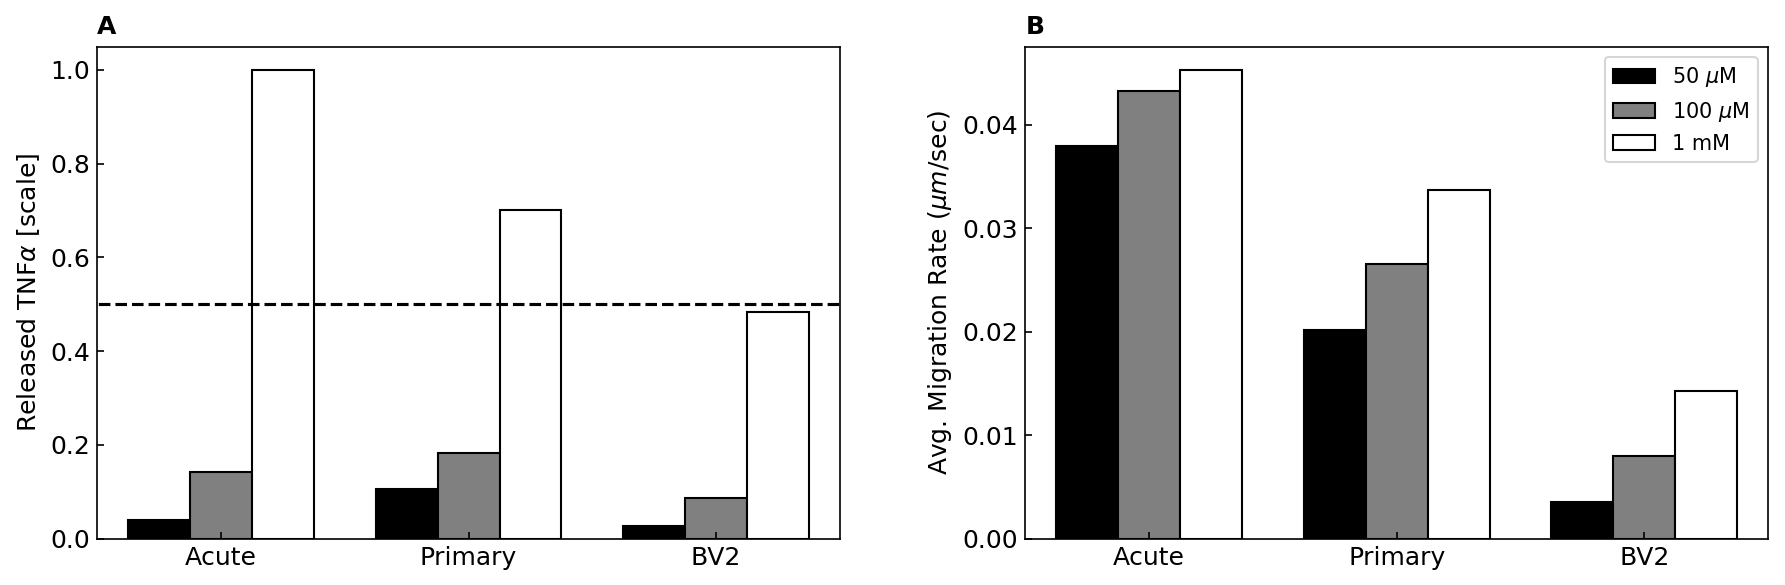

In [163]:
migr0 = np.array([np.average(data_storage['acute0uM5minVel'][240:299]),np.average(data_storage['prime0uM5minVel'][240:299]),np.average(data_storage['bv0uM5minVel'][240:299])])
migr50 = np.array([np.average(data_storage['acute50uM5minVel'][240:299]),np.average(data_storage['prime50uM5minVel'][240:299]),np.average(data_storage['bv50uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]
migr100 = np.array([np.average(data_storage['acute100uM5minVel'][240:299]),np.average(data_storage['prime100uM5minVel'][240:299]),np.average(data_storage['bv100uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]
migr1000 = np.array([np.average(data_storage['acute1000uM5minVel'][240:299]),np.average(data_storage['prime1000uM5minVel'][240:299]),np.average(data_storage['bv1000uM5minVel'][240:299])])#/max(distSet[3])*50 #dataRest1000[3][-1]

init = min(data_storage['acute50uM5minTNF'])
init2 = min(data_storage['acute50uM5minTNF'])
final = data_storage['acute1000uM5minTNF'][-1]
diff = final - init2
tnfa50 = (np.array([data_storage['acute50uM5minTNF'][-1],data_storage['prime50uM5minTNF'][-1],data_storage['bv50uM5minTNF'][-1]])-init)/diff
tnfa100 = (np.array([data_storage['acute100uM5minTNF'][-1],data_storage['prime100uM5minTNF'][-1],data_storage['bv100uM5minTNF'][-1]])-init)/diff
tnfa1000 = (np.array([data_storage['acute1000uM5minTNF'][-1],data_storage['prime1000uM5minTNF'][-1],data_storage['bv1000uM5minTNF'][-1]])-init)/diff


objects = ('Acute','Primary','BV2')
y_pos = np.arange(len(objects))

bar_width = 0.25
plt.figure(figsize=(12,4),dpi=150)
ax = plt.subplot(1,2,1)
plt.title('A',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-0.25, tnfa50, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='50 $\mu$M')
plt.bar(y_pos,      tnfa100, bar_width, align='center', color='gray', alpha=1, edgecolor='black',label='100 $\mu$M')
plt.bar(y_pos+0.25, tnfa1000, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='1 mM')
plt.tick_params(labelsize=12,direction='in')
plt.plot([-1,4],[0.5,0.5],'k--')
plt.xlim([-0.5,2.5])
plt.xticks(y_pos, objects)
plt.ylabel(r'Released TNF$\alpha$ [scale]',fontsize=12)
#plt.legend(loc=0,fontsize=10)
plt.tight_layout()

ax = plt.subplot(1,2,2)
plt.title('B',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-0.25, migr50, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='50 $\mu$M')
plt.bar(y_pos,      migr100, bar_width, align='center', color='gray', alpha=1, edgecolor='black',label='100 $\mu$M')
plt.bar(y_pos+0.25, migr1000, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='1 mM')
plt.tick_params(labelsize=12,direction='in')
#plt.plot([-1,4],[4,4],'k--')
plt.xlim([-0.5,2.5])
plt.xticks(y_pos, objects)
plt.ylabel('Avg. Migration Rate ($\mu m$/sec)',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()


plt.subplots_adjust(wspace=0.25)
plt.savefig("RestvsPrime.png")

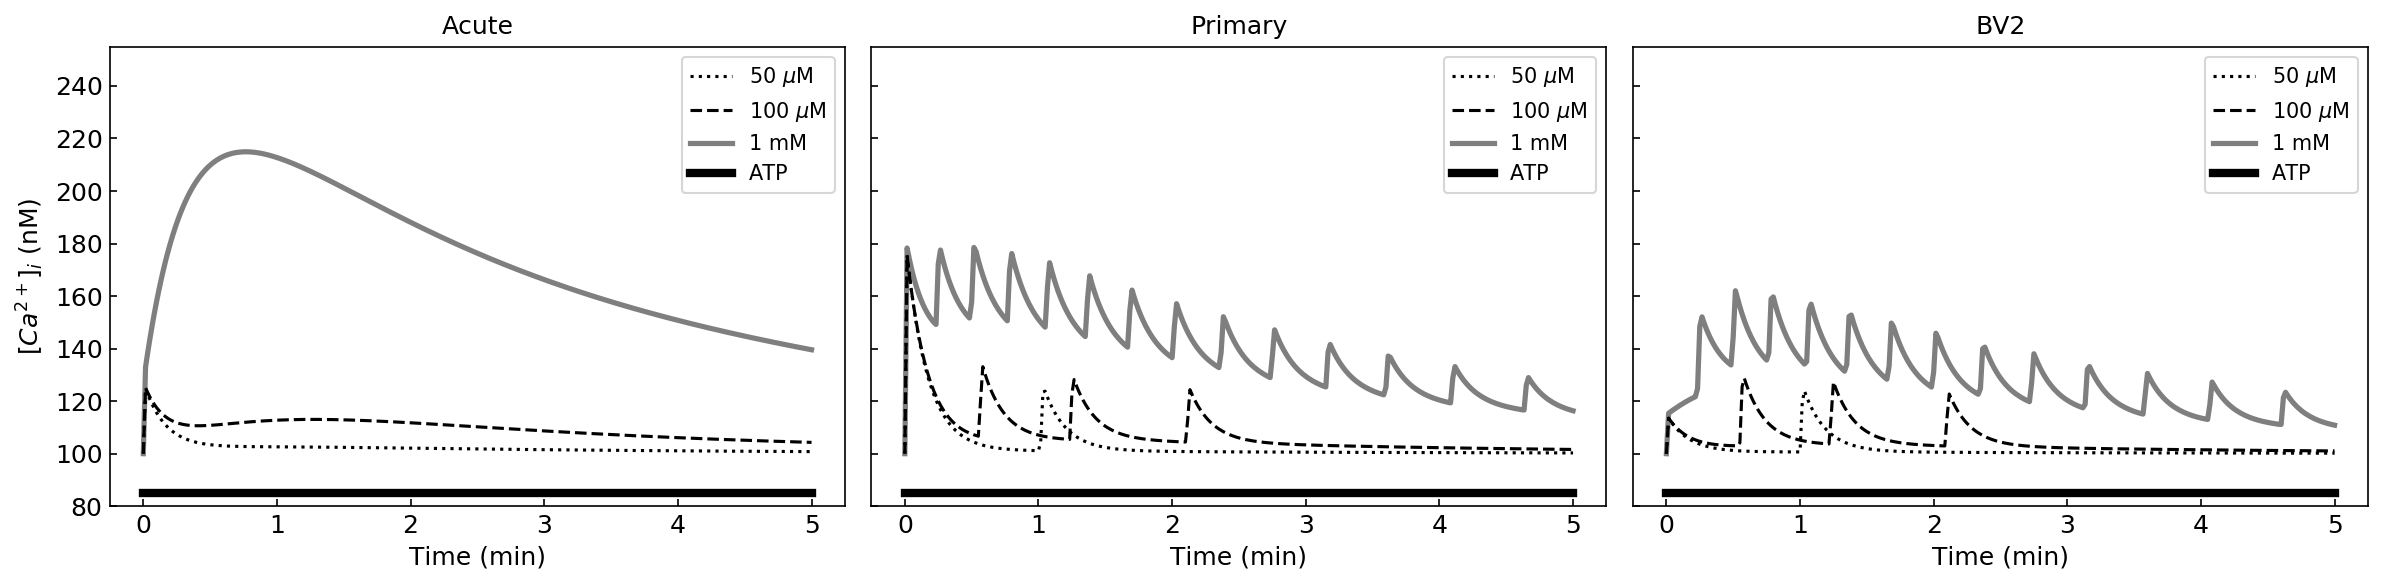

In [164]:

plt.figure(figsize=(16,4),dpi=150)
plt.subplot(131)
plt.title('Acute',fontsize=12)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,data_storage['acute50uM5minCa'],'k:',label="50 $\mu$M")
plt.plot(dura/60,data_storage['acute100uM5minCa'],'k--',label="100 $\mu$M")
plt.plot(dura/60,data_storage['acute1000uM5minCa'],'k',alpha=0.5,lw=2.5,label="1 mM")
plt.plot([0,5],[85,85],'k',lw=4,label='ATP')
plt.xlabel("Time (min)",fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.ylim([80,255])
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

ax = plt.subplot(132)
plt.title("Primary",fontsize=12)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,data_storage['prime50uM5minCa'],'k:',label="50 $\mu$M")
plt.plot(dura/60,data_storage['prime100uM5minCa'],'k--',label="100 $\mu$M")
plt.plot(dura/60,data_storage['prime1000uM5minCa'],'k',alpha=0.5,lw=2.5,label="1 mM")
plt.plot([0,5],[85,85],'k',lw=4,label='ATP')
plt.legend(loc=0,fontsize=10)
plt.xlabel("Time (min)",fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
ax.set_yticklabels([])
plt.ylim([80,255])
plt.tight_layout()

ax = plt.subplot(133)
plt.title("BV2",fontsize=12)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,data_storage['bv50uM5minCa'],'k:',label="50 $\mu$M")
plt.plot(dura/60,data_storage['bv100uM5minCa'],'k--',label="100 $\mu$M")
plt.plot(dura/60,data_storage['bv1000uM5minCa'],'k',alpha=0.5,lw=2.5,label="1 mM")
plt.plot([0,5],[85,85],'k',lw=4,label='ATP')
plt.legend(loc=0,fontsize=10)
plt.xlabel("Time (min)",fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
ax.set_yticklabels([])
plt.ylim([80,255])
plt.tight_layout()
plt.savefig('celltypeCaTrans.png')

#### Extension of model prediction by extrapolation

#### 5 mins duration 

In [3]:
p2  = {'acute':1/11.1,'prime':1,'bv':1}
p4  = {'acute':1/2.95,'prime':1,'bv':0.187}
p7  = {'acute':2.65,'prime':1,'bv':0.65}
p12 = {'acute':100,'prime':1,'bv':0.03}
CellType = ['acute','prime','bv']
ATP = [50,100,200,500]
duration = [300,600,900]
data_storage = {}

for celltype in CellType:
    for a in ATP:
        for t in duration:
            data = SR.gotranMicroglia(sim_time      = t,
                                      ATP           = a,
                                      rhop2yc       = p2[celltype],
                                      rhop2y12      = p12[celltype],
                                      rhop2x4       = p4[celltype],
                                      rhop2x7       = p7[celltype],
                                      output_name   = 'test1',
                                      ode_file_name = odefilename,
                                      data_name2    = 'pAkt',
                                      data_name3    = 'Distance',
                                      data_name4    = 'TNFae',
                                      data_name5    = 'VelMig',
                                      data_name6    = 'mRNA_TNF',
                                      removePickle  = 1,
                                      timePrint     = 0)
            T = int(t/60)
            data_storage[celltype+str(a)+'uM'+str(T)+'minVel'] = data[5]
            data_storage[celltype+str(a)+'uM'+str(T)+'minTNF'] = data[4]
            data_storage[celltype+str(a)+'uM'+str(T)+'minCa'] = data[1]
            data_storage[celltype+str(a)+'uM'+str(T)+'minDist'] = data[3]
            
            if t == 900:
                dura = data[0]

In [4]:
acute50 = [0,data_storage['acute50uM5minDist'][-1],data_storage['acute50uM10minDist'][-1],data_storage['acute50uM15minDist'][-1]]
acute100 = [0,data_storage['acute100uM5minDist'][-1],data_storage['acute100uM10minDist'][-1],data_storage['acute100uM15minDist'][-1]]
acute500 = [0,data_storage['acute500uM5minDist'][-1],data_storage['acute500uM10minDist'][-1],data_storage['acute500uM15minDist'][-1]]

prime50 = [0,data_storage['prime50uM5minDist'][-1],data_storage['prime50uM10minDist'][-1],data_storage['prime50uM15minDist'][-1]]
prime100 = [0,data_storage['prime100uM5minDist'][-1],data_storage['prime100uM10minDist'][-1],data_storage['prime100uM15minDist'][-1]]
prime500 = [0,data_storage['prime500uM5minDist'][-1],data_storage['prime500uM10minDist'][-1],data_storage['prime500uM15minDist'][-1]]

bv50 = [0,data_storage['bv50uM5minDist'][-1],data_storage['bv50uM10minDist'][-1],data_storage['bv50uM15minDist'][-1]]
bv100 = [0,data_storage['bv100uM5minDist'][-1],data_storage['bv100uM10minDist'][-1],data_storage['bv100uM15minDist'][-1]]
bv500 = [0,data_storage['bv500uM5minDist'][-1],data_storage['bv500uM10minDist'][-1],data_storage['bv500uM15minDist'][-1]]

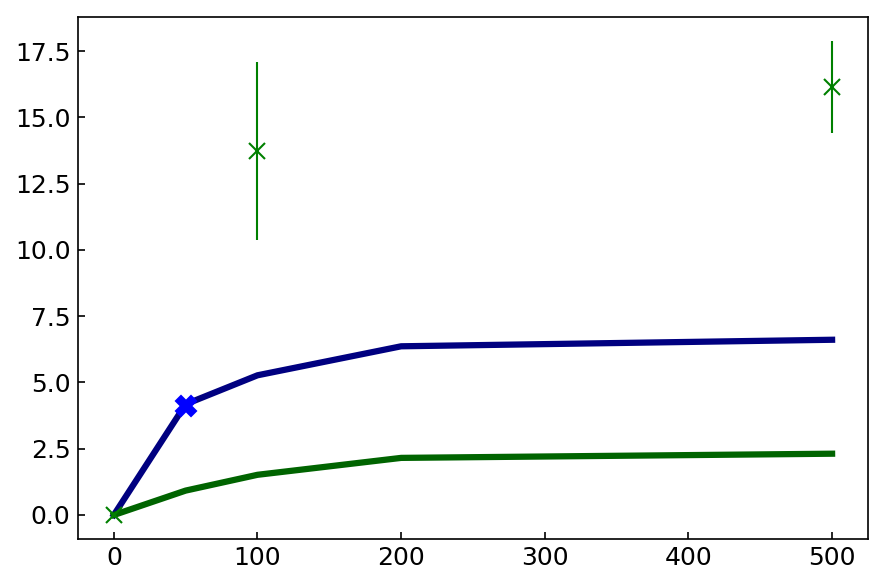

In [6]:
ATP = np.array([0,50,100,200,500])
acute = [0,data_storage['acute50uM5minDist'][-1],data_storage['acute100uM5minDist'][-1],data_storage['acute200uM5minDist'][-1],data_storage['acute500uM5minDist'][-1]]
prime = [0,data_storage['prime50uM5minDist'][-1],data_storage['prime100uM5minDist'][-1],data_storage['prime200uM5minDist'][-1],data_storage['prime500uM5minDist'][-1]]
bv2 = [0,data_storage['bv50uM5minDist'][-1],data_storage['bv100uM5minDist'][-1],data_storage['bv200uM5minDist'][-1],data_storage['bv500uM5minDist'][-1]]
exptATP = [0,100,500]
exptData = np.array([0, 13.726,16.1536])
ATPnew = np.linspace(ATP.min(), ATP.max(), ATP.max())  
def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(ATP,acute,'k--',lw=2,alpha=1,label='Acute')
plt.plot(ATP,prime,'navy',lw=3,alpha=1,label='Primary Culture')
plt.plot(ATP,bv2,'darkgreen',lw=3,alpha=1,label='BV2')
#plt.plot(ATPnew,func(ATPnew,2.7,120,2),'g:',lw=3,alpha=1,label='Expt. - BV2 (placeholder)')
plt.plot(exptATP,exptData,'g',marker='x',markersize=8,lw=0,alpha=1,label='Expt. - BV2 (placeholder)')
plt.errorbar(exptATP,exptData, yerr=[0,3.37,1.736],fmt='none',color='green',lw=1, capthick=3)
plt.plot(50,4.1,'b',marker='X',markersize=10,lw=0,alpha=1,label='Expt. - BV2 (placeholder)')
#plt.ylabel('Migration ($\mu m$)',fontsize=10)
#plt.xlabel('ATP ($\mu M$)',fontsize=12)
#plt.legend(loc=0,fontsize=9)
plt.tight_layout()
#plt.savefig('migATPinterpolation.png')

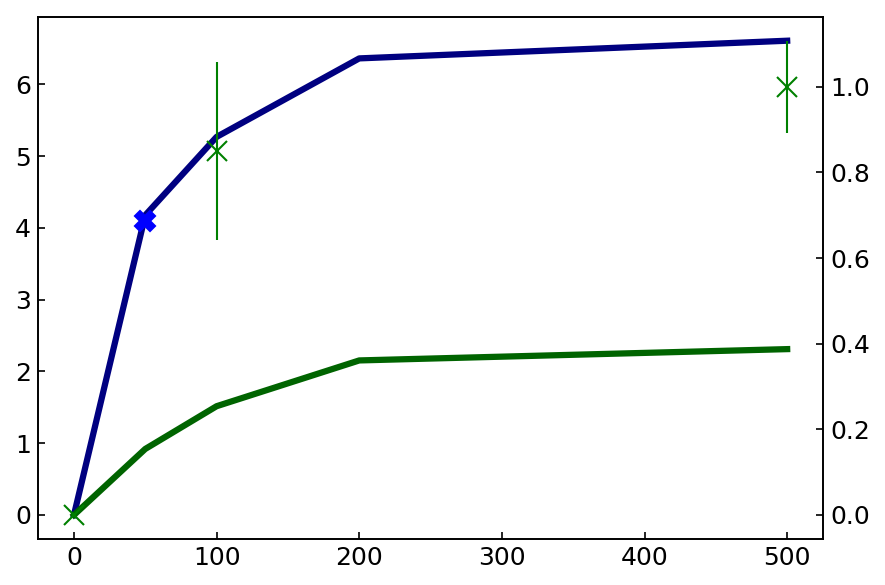

In [23]:
color1 = 'red'
color2 = 'darkblue'
plt.figure(figsize=(6,4),dpi=150)
ax1 = plt.subplot()
ax1.tick_params(labelsize=12,direction='in')
ax1.plot(ATP,prime,'navy',lw=3,alpha=1)
ax1.plot(ATP,bv2,'darkgreen',lw=3,alpha=1)
ax1.plot(50,4.1,'b',marker='X',markersize=10,lw=0,alpha=1)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=12,direction='in')
ax2.plot(exptATP,exptData/16.1536,'g',marker='x',markersize=10,lw=0,alpha=1)
ax2.errorbar(exptATP,exptData/16.1536, yerr=[0,3.37/16.1536,1.736/16.1536],fmt='none',color='green',lw=1, capthick=3)
plt.tight_layout()


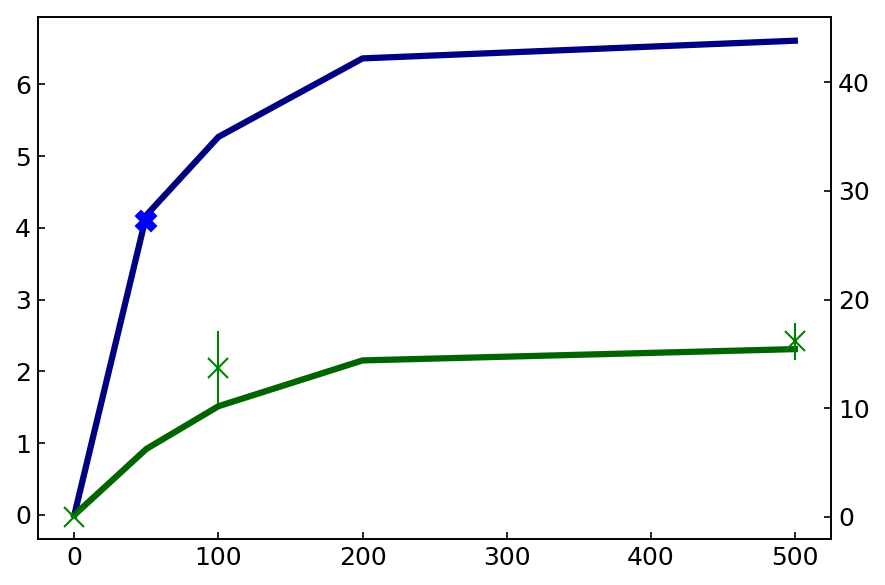

In [13]:
color1 = 'red'
color2 = 'darkblue'
plt.figure(figsize=(6,4),dpi=150)
ax1 = plt.subplot()
ax1.tick_params(labelsize=12,direction='in')
ax1.plot(ATP,prime,'navy',lw=3,alpha=1)
ax1.plot(ATP,bv2,'darkgreen',lw=3,alpha=1)
ax1.plot(50,4.1,'b',marker='X',markersize=10,lw=0,alpha=1)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=12,direction='in')
ax2.plot(exptATP,exptData,'g',marker='x',markersize=10,lw=0,alpha=1)
ax2.errorbar(exptATP,exptData, yerr=[0,3.37,1.736],fmt='none',color='green',lw=1, capthick=3)
ax2.set_ylim([-2,46])
plt.tight_layout()


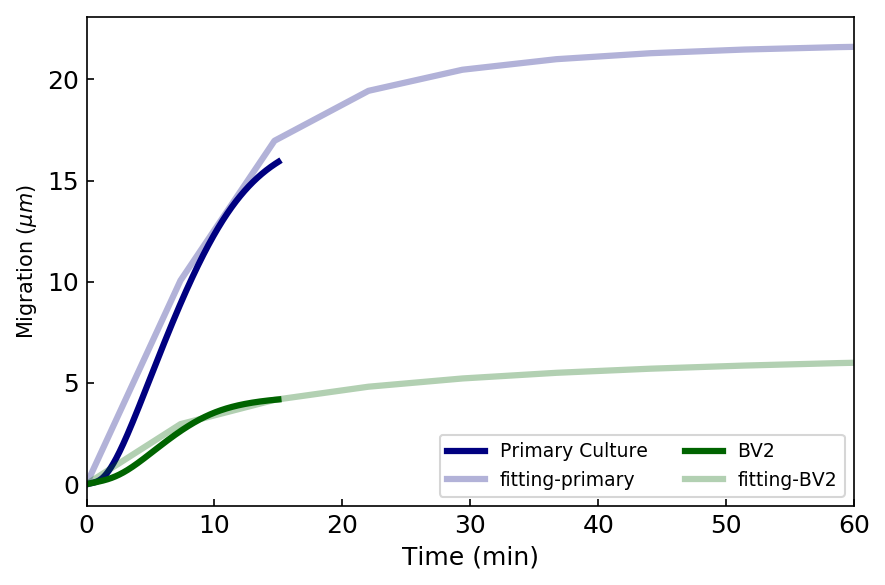

In [63]:
time = np.array([0,5,10,15])
tfit = np.linspace(0,60*6)
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(dura/60,data_storage['acute100uM15minDist'],'b--',lw=3,alpha=1,label='Acute')
#plt.plot(tfit,func(tfit,75,16,2),'r--',lw=3,alpha=0.5,label='fitting-acute')
plt.plot(dura/60,data_storage['prime100uM15minDist'],'navy',lw=3,alpha=1,label='Primary Culture')
plt.plot(tfit,func(tfit,22,8,2),'navy',lw=3,alpha=0.3,label='fitting-primary')
plt.plot(dura/60,data_storage['bv100uM15minDist'],'darkgreen',lw=3,alpha=1,label='BV2')
plt.plot(tfit,func(tfit,7,10,1),'darkgreen',lw=3,alpha=0.3,label='fitting-BV2')
plt.ylabel('Migration ($\mu m$)',fontsize=10)
plt.xlabel('Time (min)',fontsize=12)
plt.xlim([0,60])
plt.legend(loc=0,ncol=2,fontsize=9)
plt.tight_layout()
plt.savefig('migTimeextrapolation.png')

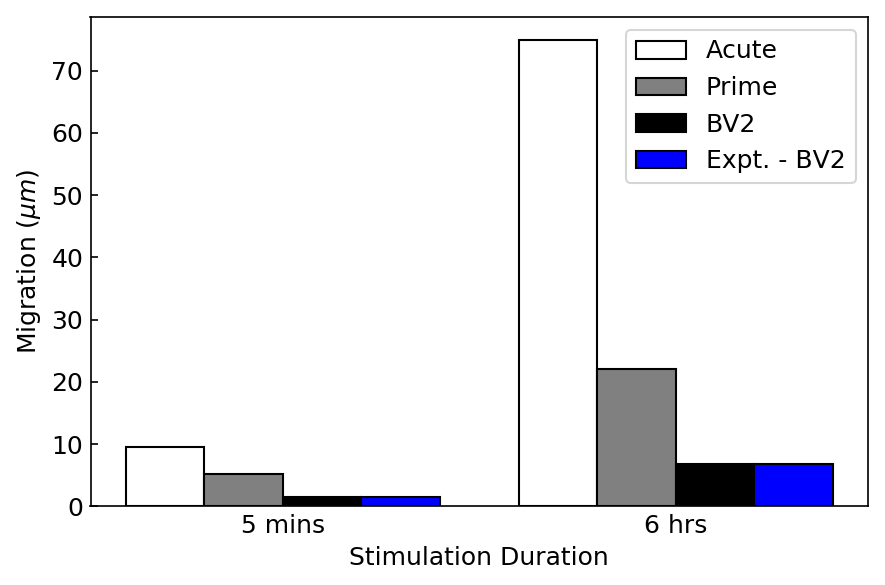

In [197]:
objects = ('5 mins', '6 hrs')
acute = [acute100[1],func(tfit,75,16,2)[-1]]
prime = [prime100[1],func(tfit,22,8,2)[-1]]
bv = [bv100[1],func(tfit,7,10,1)[-1]]
expt = bv
y_pos = np.arange(len(objects))


bar_width = 0.2
plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-bar_width*1.5, acute, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Acute')
plt.bar(y_pos-bar_width*0.5, prime, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='Prime')
plt.bar(y_pos+bar_width*0.5, bv, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='BV2')
plt.bar(y_pos+bar_width*1.5, expt, bar_width, align='center', color='blue', alpha=1, edgecolor='black', label='Expt. - BV2')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration ($\mu m$)',fontsize=12)
plt.xlabel('Stimulation Duration',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('migLongTime.png')

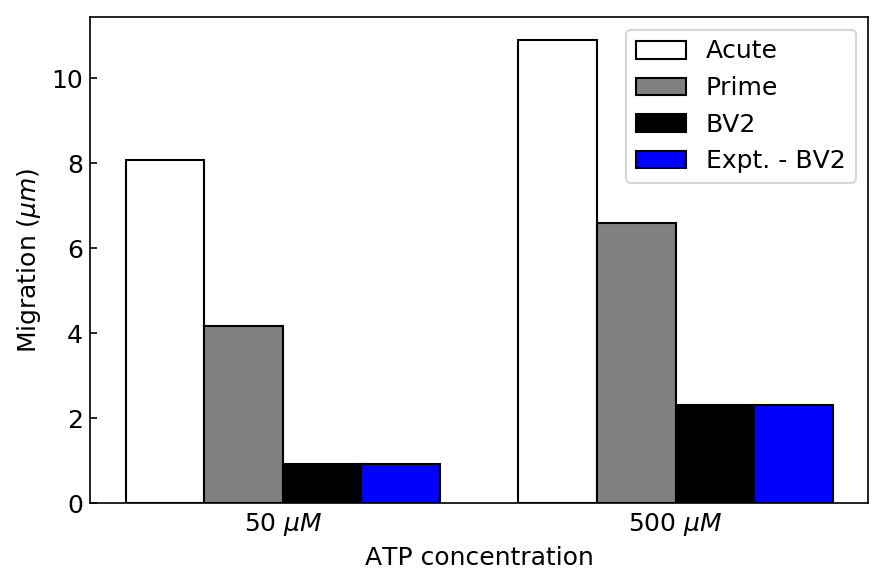

In [199]:
objects = ('50 $\mu M$', '500 $\mu M$')
acute = [acute50[1],acute500[1]]
prime = [prime50[1],prime500[1]]
bv = [bv50[1],bv500[1]]
expt = bv

y_pos = np.arange(len(objects))


bar_width = 0.2
plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-bar_width*1.5, acute, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Acute')
plt.bar(y_pos-bar_width*0.5, prime, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='Prime')
plt.bar(y_pos+bar_width*0.5, bv, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='BV2')
plt.bar(y_pos+bar_width*1.5, expt, bar_width, align='center', color='blue', alpha=1, edgecolor='black', label='Expt. - BV2')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration ($\mu m$)',fontsize=12)
plt.xlabel('ATP concentration',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('migATPlowvshigh.png')

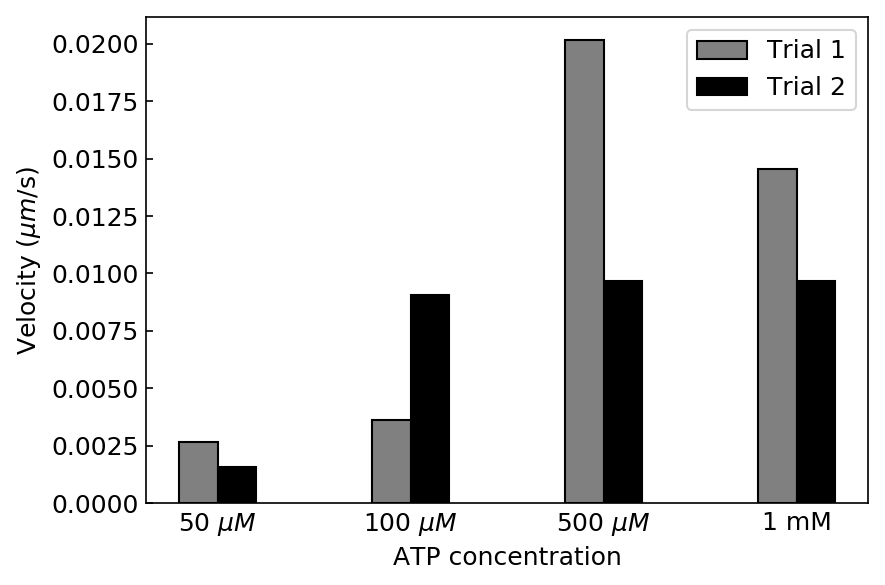

In [41]:
objects = ('50 $\mu M$', '100 $\mu M$','500 $\mu M$','1 mM')
vel1 = [0.00269,0.00364,0.02015,0.01453]
vel2 = [0.00160,0.00905,0.00966,0.00967]
y_pos = np.arange(len(objects))
bar_width = 0.2
plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-bar_width*0.5, vel1, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='Trial 1')
plt.bar(y_pos+bar_width*0.5, vel2, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='Trial 2')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Velocity ($\mu m$/s)',fontsize=12)
plt.xlabel('ATP concentration',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()

#### 1 min stimulation duration 

In [4]:
p4 = {'rest':1/2.95, 'primary': 1, 'bv2':0.187}
p7 = {'rest':2.65,   'primary': 1, 'bv2':0.65}
py = {'rest':1/11.1, 'primary': 1, 'bv2':1}
p12= {'rest':100,   'primary': 1, 'bv2':0.03}
ATP = [0, 10, 50, 100, 1000]

collectedData = {}

# Primary Cultured
for atp in ATP:
    for expr in ['rest','primary','bv2']:
        data   = SR.gotranMicroglia(sim_time      = 300,
                                    ATP           = atp,
                                    rhop2yc       = py[expr],
                                    rhop2y12      = p12[expr],
                                    rhop2x4       = p4[expr],
                                    rhop2x7       = p7[expr],
                                    output_name   = 'test1',
                                    ode_file_name = odefilename,
                                    stim_duration = 300, # in second
                                    data_name2    = 'NFATNn',
                                    data_name3    = 'VelMig',
                                    data_name4    = 'TNFae',
                                    data_name5    = 'Distance',
                                    data_name6    = 'SigCaM',
                                    data_name7    = 'pAkt',
                                    data_name8    = 'Ca4_CaM',
                                    data_name9    = 'SigpA',
                                    data_name10   = 'VelMig',
                                    removePickle  = 1,
                                    PulSwitch     = 1,
                                    timePrint     = 1)
        collectedData[str(atp)+expr] = data

 -------------- 8.31374192237854 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.434145212173462 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.521749496459961 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.3788459300994873 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.4026074409484863 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5336430072784424 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5527753829956055 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.7178542613983154 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.62136173248291 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5748045444488525 seconds --------------
 ------------ End of Simulatio

In [5]:
dura = collectedData['10rest'][0]

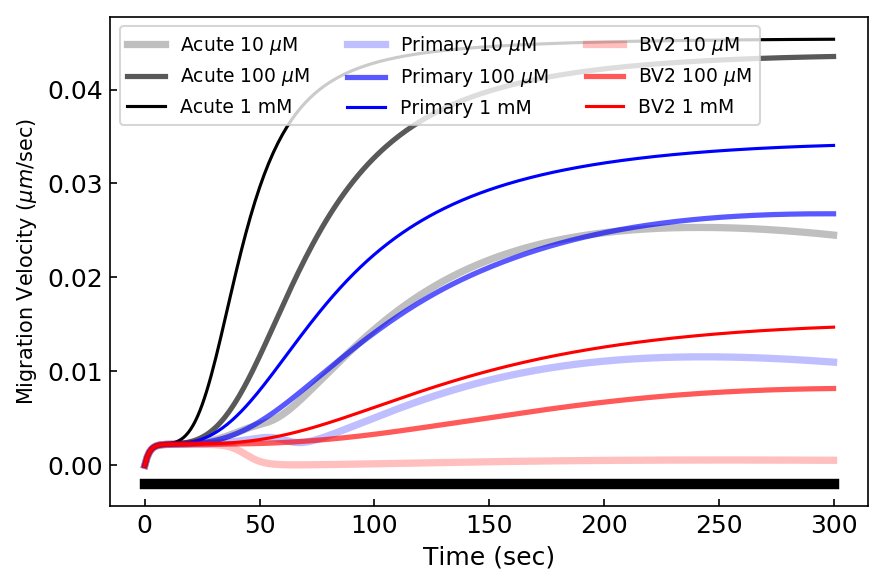

In [6]:
init = min(collectedData['10rest'][8])
final = max(collectedData['1000bv2'][8]) -init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,collectedData['10rest'][3],'k',lw=3.5,alpha=0.25,label='Acute 10 $\mu$M')
plt.plot(dura,collectedData['100rest'][3],'k',lw=2.5,alpha=0.65,label='Acute 100 $\mu$M')
plt.plot(dura,collectedData['1000rest'][3],'k',lw=1.5,alpha=1,label='Acute 1 mM')
plt.plot(dura,collectedData['10primary'][3],'b',lw=3.5,alpha=0.25,label='Primary 10 $\mu$M')
plt.plot(dura,collectedData['100primary'][3],'b',lw=2.5,alpha=0.65,label='Primary 100 $\mu$M')
plt.plot(dura,collectedData['1000primary'][3],'b',lw=1.5,alpha=1,label='Primary 1 mM')
plt.plot(dura,collectedData['10bv2'][3],'r',lw=3.5,alpha=0.25,label='BV2 10 $\mu$M')
plt.plot(dura,collectedData['100bv2'][3],'r',lw=2.5,alpha=0.65,label='BV2 100 $\mu$M')
plt.plot(dura,collectedData['1000bv2'][3],'r',lw=1.5,alpha=1,label='BV2 1 mM')
plt.plot([0,300],[-0.002,-0.002],'k',lw=5)
plt.ylabel('Migration Velocity ($\mu m$/sec)',fontsize=10)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,ncol=3,fontsize=9)
plt.tight_layout()

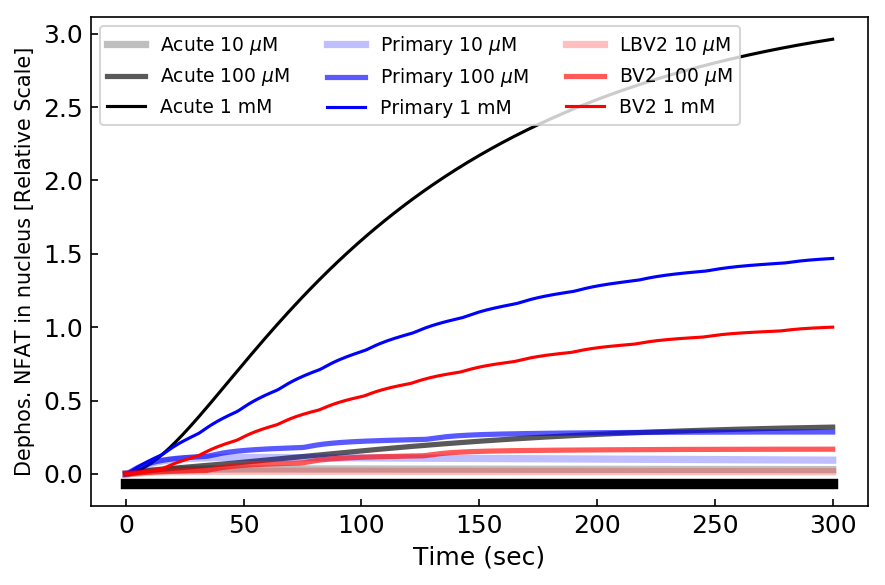

In [7]:
init = min(collectedData['10rest'][2])
final = max(collectedData['1000bv2'][2]) -init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,(collectedData['10rest'][2]-init)/final,'k',lw=3.5,alpha=0.25,label='Acute 10 $\mu$M')
plt.plot(dura,(collectedData['100rest'][2]-init)/final,'k',lw=2.5,alpha=0.65,label='Acute 100 $\mu$M')
plt.plot(dura,(collectedData['1000rest'][2]-init)/final,'k',lw=1.5,alpha=1,label='Acute 1 mM')
plt.plot(dura,(collectedData['10primary'][2]-init)/final,'b',lw=3.5,alpha=0.25,label='Primary 10 $\mu$M')
plt.plot(dura,(collectedData['100primary'][2]-init)/final,'b',lw=2.5,alpha=0.65,label='Primary 100 $\mu$M')
plt.plot(dura,(collectedData['1000primary'][2]-init)/final,'b',lw=1.5,alpha=1,label='Primary 1 mM')
plt.plot(dura,(collectedData['10bv2'][2]-init)/final,'r',lw=3.5,alpha=0.25,label='LBV2 10 $\mu$M')
plt.plot(dura,(collectedData['100bv2'][2]-init)/final,'r',lw=2.5,alpha=0.65,label='BV2 100 $\mu$M')
plt.plot(dura,(collectedData['1000bv2'][2]-init)/final,'r',lw=1.5,alpha=1,label='BV2 1 mM')
plt.plot([0,300],[-0.07,-0.07],'k',lw=5)
plt.ylabel('Dephos. NFAT in nucleus [Relative Scale]',fontsize=10)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,ncol=3,fontsize=9)
plt.tight_layout()

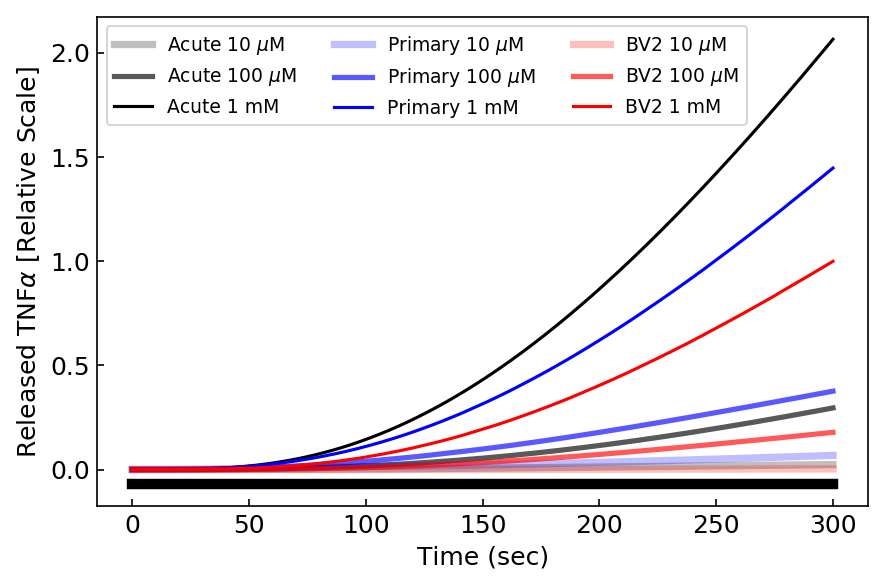

In [8]:
init=collectedData['10rest'][4][0]
final = collectedData['1000bv2'][4][-1]-init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,(collectedData['10rest'][4]-init)/final ,'k',lw=3.5,alpha=0.25,label='Acute 10 $\mu$M')
plt.plot(dura,(collectedData['100rest'][4]-init)/final,'k',lw=2.5,alpha=0.65,label='Acute 100 $\mu$M')
plt.plot(dura,(collectedData['1000rest'][4]-init)/final,'k',lw=1.5,alpha=1,label='Acute 1 mM')
plt.plot(dura,(collectedData['10primary'][4]-init)/final,'b',lw=3.5,alpha=0.25,label='Primary 10 $\mu$M')
plt.plot(dura,(collectedData['100primary'][4]-init)/final,'b',lw=2.5,alpha=0.65,label='Primary 100 $\mu$M')
plt.plot(dura,(collectedData['1000primary'][4]-init)/final,'b',lw=1.5,alpha=1,label='Primary 1 mM')
plt.plot(dura,(collectedData['10bv2'][4]-init)/final,'r',lw=3.5,alpha=0.25,label='BV2 10 $\mu$M')
plt.plot(dura,(collectedData['100bv2'][4]-init)/final,'r',lw=2.5,alpha=0.65,label='BV2 100 $\mu$M')
plt.plot(dura,(collectedData['1000bv2'][4]-init)/final,'r',lw=1.5,alpha=1,label='BV2 1 mM')
plt.plot([0,300],[-0.07,-0.07],'k',lw=5)
plt.ylabel(r'Released TNF$\alpha$ [Relative Scale]',fontsize=12)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,ncol=3,fontsize=9)
plt.tight_layout()

0.27272757024766336


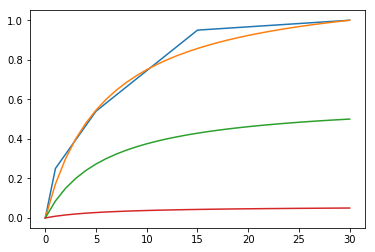

In [32]:
t = [0,1,5,15,30]
value = [0, 0.25,0.54,0.95,1]
def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)
time = np.arange(31)
plt.plot(t,value)
plt.plot(time,func(time,1.2,6,1))
plt.plot(time,func(time,1.2*0.5,6,1))
plt.plot(time,func(time,1.2/20,6,1))

print(func(5,1.2*0.5,6,1))

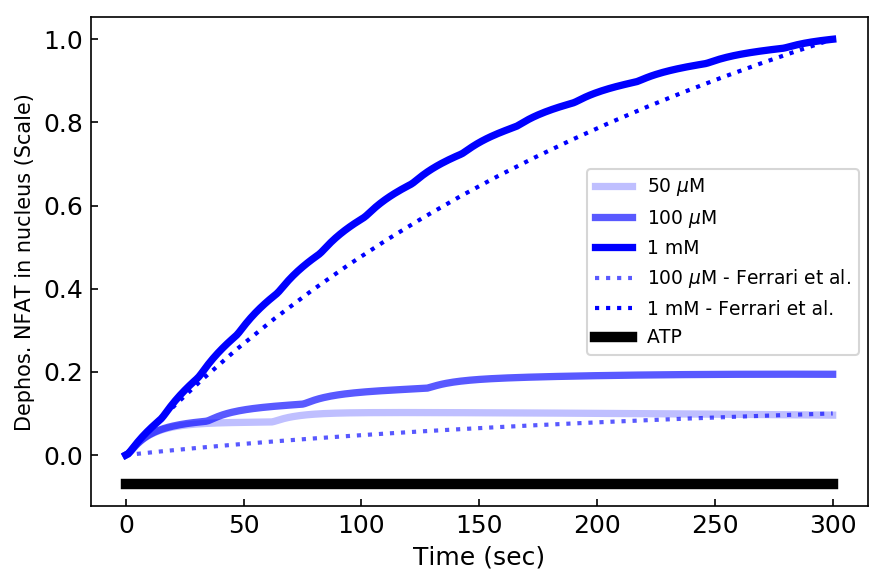

In [37]:
time = scipy.linspace(0,5,20)

def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)

maxexp = func(5,1.2*0.5,6,1)

init = min(collectedData['50primary'][2])
final = max(collectedData['1000primary'][2]) -init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,(collectedData['50primary'][2]-init)/final,'b',lw=3.5,alpha=0.25,label='50 $\mu$M')
plt.plot(dura,(collectedData['100primary'][2]-init)/final,'b',lw=3.5,alpha=0.65,label='100 $\mu$M')
plt.plot(dura,(collectedData['1000primary'][2]-init)/final,'b',lw=3.5,alpha=1,label='1 mM')
plt.plot(time*60,func(time,1.2/20,6,1)/maxexp,'b:',lw=2,alpha=0.65,label='100 $\mu$M - Ferrari et al.')
plt.plot(time*60,func(time,1.2/2,6,1)/maxexp,'b:',lw=2,alpha=1,label='1 mM - Ferrari et al.')
plt.plot([0,300],[-0.07,-0.07],'k',lw=5,label='ATP')
plt.ylabel('Dephos. NFAT in nucleus (Scale)',fontsize=10)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()
plt.savefig('NFATtime.png')